In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [2]:
train = pd.read_csv("data/train.csv")
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


## 데이터 EDA

### 메뉴 단어 별로 분류

In [32]:
train["조식메뉴리스트"]=0
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴리스트
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,0


In [33]:
for i in range(len(train)):
    menu_morning = train["조식메뉴"][i].split()
    menu = []
    for j in menu_morning:
        if j == " ":
            pass
        elif "(" not in j:
            menu.append(j)
    train["조식메뉴리스트"][i]=menu
    
train.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_15512\4027118264.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["조식메뉴리스트"][i]=menu


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴리스트
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,..."
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래..."
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리..."
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,..."
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ..."


In [34]:
train["중식메뉴리스트"]=0
for i in range(len(train)):
    menu_lunch = train["중식메뉴"][i].split()
    menu = []
    for j in menu_lunch:
        if j == " ":
            pass
        elif "(" not in j:
            menu.append(j)
    train["중식메뉴리스트"][i]=menu
    
train.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_15512\3600778004.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["중식메뉴리스트"][i]=menu


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴리스트,중식메뉴리스트
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]"
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추..."
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...","[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]"
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...","[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]"
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...","[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]"


In [35]:
train["석식메뉴리스트"]=0
for i in range(len(train)):
    menu_dinner = train["석식메뉴"][i].split()
    menu = []
    for j in menu_dinner:
        if j == " ":
            pass
        elif "(" not in j:
            menu.append(j)
    train["석식메뉴리스트"][i]=menu
    
train.head()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_15512\3942502279.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["석식메뉴리스트"][i]=menu


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴리스트,중식메뉴리스트,석식메뉴리스트
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...","[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]"
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...","[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]"
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...","[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]"


In [36]:
train["근무자수"] = train["본사정원수"]-train["본사휴가자수"]-train["현본사소속재택근무자수"]-train["본사출장자수"]
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,조식메뉴리스트,중식메뉴리스트,석식메뉴리스트,근무자수
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]",2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]",2378.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...","[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]",2365.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...","[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]",2277.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...","[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]",2142.0


### 근무자수를 구하고 얼마나 사람들이 먹었는지 비율 구하기
- 코로나로 근무자수가 적으면 비율이 적을 것이기 때문에

In [56]:
train = pd.read_csv("data/train.csv")

In [3]:
train["근무자수"] = train["본사정원수"]-train["본사휴가자수"]-train["현본사소속재택근무자수"]-train["본사출장자수"]
train["중식사비율"] = train["중식계"]/train["근무자수"]
train["석식사비율"] = train["석식계"]/train["근무자수"]
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062


### 특식 여부 확인

In [4]:
special_lunch = train[train["중식메뉴"].str.contains("쌀밥/").values==False]
special_lunch.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,근무자수,중식사비율,석식사비율
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,2814.712871,133.495050,251.623762,32.529703,29.415842,851.009901,351.529703,2400.178218,0.355248,0.147628
std,169.415080,122.051422,32.901436,132.384791,88.152318,156.677347,172.367367,166.577841,0.064639,0.073545
min,2601.000000,36.000000,135.000000,0.000000,0.000000,387.000000,0.000000,1780.000000,0.178423,0.000000
25%,2655.000000,64.000000,232.250000,0.000000,0.000000,765.500000,320.000000,2312.500000,0.315726,0.122480
50%,2769.000000,80.000000,254.000000,0.000000,0.000000,860.000000,408.000000,2385.500000,0.362409,0.166952
75%,2956.000000,156.500000,276.750000,1.000000,0.000000,948.250000,467.500000,2489.750000,0.395913,0.197209
max,3305.000000,777.000000,326.000000,1044.000000,479.000000,1319.000000,751.000000,2908.000000,0.529081,0.301243


In [5]:
normal_lunch = pd.concat([train, special_lunch]).drop_duplicates(keep=False)
normal_lunch.describe()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,근무자수,중식사비율,석식사비율
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,2806.426720,162.831505,239.031904,322.771685,46.343968,898.254237,483.975075,2358.219342,0.380730,0.205093
std,171.684682,147.816302,45.092619,234.960031,113.648021,217.812153,119.885409,177.756920,0.088073,0.049066
min,2601.000000,23.000000,41.000000,0.000000,0.000000,296.000000,0.000000,1372.000000,0.143649,0.000000
25%,2645.000000,73.000000,214.000000,63.000000,0.000000,753.500000,430.000000,2273.500000,0.318064,0.181482
50%,2758.000000,109.000000,242.000000,351.000000,0.000000,883.000000,498.000000,2351.000000,0.377351,0.210299
75%,2962.000000,190.000000,271.000000,485.000000,0.000000,1057.500000,556.000000,2451.500000,0.442168,0.234146
max,3305.000000,1224.000000,378.000000,1035.000000,533.000000,1459.000000,905.000000,2921.000000,0.597203,0.380270


In [6]:
display(normal_lunch.head())
display(special_lunch.head())

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,2075.0,0.503614,0.265060


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283
10,2016-02-18,목,2601,77,254,367,0.0,모닝롤/인절미토스트 우유/두유/주스 계란후라이 계란후라이 (쌀:국내산) 선지...,"낙지비빔밥 (낙지:중국산,쌀:국내산) 유부장국 고구마치즈구이 해초무침 요구르트...",쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 명태조림 (명태:러시아산) 감자채볶음 쌈만...,910.0,489.0,2270.0,0.400881,0.215419
14,2016-02-24,수,2601,54,232,14,0.0,모닝롤/꿀호떡 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 무채국 애호박...,비빔밥 (쌀:국내산) 팽이장국 소세지피망볶음 맛탕 귤 요구르트 포기김치 (...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 매운돼지갈비찜 멸치호두볶음 숙주나물 포...,1022.0,514.0,2315.0,0.441469,0.222030
28,2016-03-16,수,2624,50,213,0,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 시래기국 ...,곤드레밥 (쌀:국내산) 콩나물김치국 미니채소떡갈비 (쇠고기:호주산.돈육:국내산) ...,쌀밥/잡곡밥 (쌀:국내산) 뼈해장국 (돼지고기:국내산) 해물청경채볶음 버섯메밀전 ...,998.0,531.0,2361.0,0.422702,0.224905
33,2016-03-23,수,2624,42,236,0,0.0,모닝롤/카스텔라 우유/주스 계란후라이 새송이버섯죽/쌀밥 (쌀:국내산) 근대국 ...,콩나물밥*달래장 (쌀:국내산) 맑은국 치킨텐더*요거트D (닭고기:국내산) 땅콩조...,쌀밥/잡곡밥 (쌀:국내산) 알탕 동그랑땡전 마파두부 (돼지고기:국내산) 시금치나...,963.0,544.0,2346.0,0.410486,0.231884


In [7]:
normal_lunch["스페셜메뉴_점심"]=0
special_lunch["스페셜메뉴_점심"]=1

display(normal_lunch.head())
display(special_lunch.head())

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1662498372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_lunch["스페셜메뉴_점심"]=1


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,2075.0,0.503614,0.265060,0


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1
10,2016-02-18,목,2601,77,254,367,0.0,모닝롤/인절미토스트 우유/두유/주스 계란후라이 계란후라이 (쌀:국내산) 선지...,"낙지비빔밥 (낙지:중국산,쌀:국내산) 유부장국 고구마치즈구이 해초무침 요구르트...",쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 명태조림 (명태:러시아산) 감자채볶음 쌈만...,910.0,489.0,2270.0,0.400881,0.215419,1
14,2016-02-24,수,2601,54,232,14,0.0,모닝롤/꿀호떡 우유/주스 계란후라이 김치죽/쌀밥 (쌀:국내산) 무채국 애호박...,비빔밥 (쌀:국내산) 팽이장국 소세지피망볶음 맛탕 귤 요구르트 포기김치 (...,쌀밥/잡곡밥 (쌀:국내산) 열무된장국 매운돼지갈비찜 멸치호두볶음 숙주나물 포...,1022.0,514.0,2315.0,0.441469,0.222030,1
28,2016-03-16,수,2624,50,213,0,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 홍게살죽/쌀밥 (쌀:국내산) 시래기국 ...,곤드레밥 (쌀:국내산) 콩나물김치국 미니채소떡갈비 (쇠고기:호주산.돈육:국내산) ...,쌀밥/잡곡밥 (쌀:국내산) 뼈해장국 (돼지고기:국내산) 해물청경채볶음 버섯메밀전 ...,998.0,531.0,2361.0,0.422702,0.224905,1
33,2016-03-23,수,2624,42,236,0,0.0,모닝롤/카스텔라 우유/주스 계란후라이 새송이버섯죽/쌀밥 (쌀:국내산) 근대국 ...,콩나물밥*달래장 (쌀:국내산) 맑은국 치킨텐더*요거트D (닭고기:국내산) 땅콩조...,쌀밥/잡곡밥 (쌀:국내산) 알탕 동그랑땡전 마파두부 (돼지고기:국내산) 시금치나...,963.0,544.0,2346.0,0.410486,0.231884,1


In [8]:
train_total=pd.concat([normal_lunch, special_lunch])

train_total = train_total.sort_index()

In [9]:
train_total.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0


In [10]:
special_dinner = train_total[train_total["석식메뉴"].str.contains("쌀밥/").values==False]
special_dinner

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,2075.0,0.503614,0.265060,0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0,2273.0,0.402992,0.258689,0
15,2016-02-25,목,2601,56,261,335,0.0,모닝롤/크로와상 우유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 봄동된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 북어계란국 닭갈비 새싹두부구이 곰피초장 요구르트 ...,김밥 (쌀:국내산) 잔치국수 교자만두 (오븐에 찜) 멕시칸샐러드 무피클 포기김...,917.0,531.0,2284.0,0.401489,0.232487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2319.0,0.471324,0.181544,0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2309.0,0.360329,0.152880,0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2177.0,0.265962,0.099678,1
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2396.0,0.477880,0.209516,0


In [11]:
special_dinner = special_dinner[special_dinner["석식메뉴"].str.contains("미밥").values==False]

# 중식에는 흑미밥.현미밥 나온 거 없음

In [12]:
special_dinner #455
#train_total #1205

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,2075.0,0.503614,0.265060,0
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0,2273.0,0.402992,0.258689,0
15,2016-02-25,목,2601,56,261,335,0.0,모닝롤/크로와상 우유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 봄동된장국 ...,쌀밥/잡곡밥 (쌀:국내산) 북어계란국 닭갈비 새싹두부구이 곰피초장 요구르트 ...,김밥 (쌀:국내산) 잔치국수 교자만두 (오븐에 찜) 멕시칸샐러드 무피클 포기김...,917.0,531.0,2284.0,0.401489,0.232487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,2020-12-23,수,2990,402,193,5,324.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 흑임자죽/흑미밥 맑은버섯국 연근호두조림 콥샐...,쌀밥/흑미밥/찰현미밥 건새우아욱국 (New)국물쪼리닭 (New)파프리카계란전 마파무...,유부초밥 들깨미역국 페퍼로니치즈피자 골뱅이채소무침&실곤약 콩나물굴소스볶음 포기김치,768.0,354.0,2071.0,0.370835,0.170932,0
1189,2021-01-05,화,2983,99,156,500,390.0,모닝롤/후르츠산도 우유/주스/커피 계란후라이/찐계란 고구마죽/흑미밥 꽃게탕 유채나물...,쌀밥/보리밥/찰현미밥 유부된장국 돈육도라지고추장볶음 과일그라탕 봄동숙*간장양념 콩샐...,(New)팟시금치무쌉 미니쌀국수 춘권*칠리소스 계란후라이 양배추비트피클 무생채,1128.0,484.0,2338.0,0.482464,0.207015,0
1195,2021-01-13,수,2983,80,175,8,393.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 양송이스프/흑미밥 들깨무채국 매운사태...,쌀밥/흑미밥/찰현미밥 시금치된장국 돈육두루치기 타코야끼 상추쌈 겉절이김치 양상추샐러...,알리오올리오/추가밥 가쓰오장국 수제치킨까스 팽이버섯부추무침 산고추지무침 무생채,913.0,360.0,2335.0,0.391006,0.154176,0
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2319.0,0.471324,0.181544,0


In [13]:
normal_dinner = pd.concat([train_total, special_dinner]).drop_duplicates(keep=False)
normal_dinner

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0,2056.0,0.442121,0.290856,0
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0,2310.0,0.548918,0.290909,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,2021-01-18,월,2983,67,163,509,357.0,모닝롤/녹차카스테라 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 파래김*달래...,쌀밥/흑미밥/찰현미밥 어묵국 춘천닭갈비 감자채카레볶음 청경채나물 포기김치/바나나 그...,흑미밥 배추된장국 낙지미나리볶음 메추리알풋고추조림 시금치나물무침 깍두기,1277.0,460.0,2396.0,0.532972,0.191987,0
1199,2021-01-19,화,2983,62,176,508,372.0,모닝롤/땅콩샌드 우유/주스 계란후라이/찐계란 콩죽/흑미밥 근대된장국 토란탕 양상추샐...,쌀밥/기장밥/찰현미밥 맑은콩나물국 삼겹살김치찜 떡잡채 치커리오이무침 포기김치 그린샐...,흑미밥 북어짬뽕국 만가닥버섯불고기 건새우호박채전 삼색귤소스무침 포기김치,1038.0,414.0,2373.0,0.437421,0.174463,0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2309.0,0.360329,0.152880,0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2177.0,0.265962,0.099678,1


In [14]:
normal_dinner["스페셜메뉴_저녁"]=0
special_dinner["스페셜메뉴_저녁"]=1

train_total=pd.concat([normal_dinner, special_dinner])

train_total = train_total.sort_index()

train_total

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2032230733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_dinner["스페셜메뉴_저녁"]=1


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0,1
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0,1
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2319.0,0.471324,0.181544,0,1
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2309.0,0.360329,0.152880,0,0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2177.0,0.265962,0.099678,1,0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2396.0,0.477880,0.209516,0,0


In [87]:
train_total.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0,1
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0,1
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0,0


In [89]:
train_total.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2319.0,0.471324,0.181544,0,1
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2309.0,0.360329,0.152880,0,0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2177.0,0.265962,0.099678,1,0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2396.0,0.477880,0.209516,0,0
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0,2369.0,0.428451,0.202617,0,1


### 일자
- datetime 형식으로 바꾸기
- 년도 분류(코로나로 근무자 수가 많이 차이나므로)

In [15]:
train_total["일자"] = pd.to_datetime(train_total["일자"])
train_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
 12  근무자수            1205 non-null   float64       
 13  중식사비율           1205 non-null   float64       
 14  석식사비율           1205 non-null   float64       
 15  스페셜메

In [16]:
train_total["월"]=train_total["일자"].dt.month
train_total.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0,0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0,1,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1,0,2
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0,1,2
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0,0,2


In [17]:
train_total.sort_values(by="중식사비율", ascending=False).head(400)["요일"].value_counts()

월    218
화     79
수     60
목     33
금     10
Name: 요일, dtype: int64

In [18]:
train_total["년도"] = train_total["일자"].dt.year
train_total.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0,0,2,2016
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0,1,2,2016
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1,0,2,2016
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0,1,2,2016
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0,0,2,2016


In [111]:
target = train_total.drop(["일자","조식메뉴","중식메뉴","석식메뉴"], axis=1)
target.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도
0,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,0.432736,0.137859,0,0,2,2016
1,화,2601,50,173,319,0.0,867.0,560.0,2378.0,0.364592,0.235492,0,1,2,2016
2,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,0.430021,0.242283,1,0,2,2016
3,목,2601,104,220,355,0.0,978.0,525.0,2277.0,0.429513,0.230567,0,1,2,2016
4,금,2601,278,181,34,0.0,925.0,330.0,2142.0,0.431839,0.154062,0,0,2,2016


In [104]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(target["요일"])
target["요일"] = le.transform(target["요일"])

target.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도
0,3,2601,50,150,238,0.0,1039.0,331.0,2401.0,0.432736,0.137859,0,0,2,2016
1,4,2601,50,173,319,0.0,867.0,560.0,2378.0,0.364592,0.235492,0,1,2,2016
2,2,2601,56,180,111,0.0,1017.0,573.0,2365.0,0.430021,0.242283,1,0,2,2016
3,1,2601,104,220,355,0.0,978.0,525.0,2277.0,0.429513,0.230567,0,1,2,2016
4,0,2601,278,181,34,0.0,925.0,330.0,2142.0,0.431839,0.154062,0,0,2,2016


In [112]:
day = []
for i in range(len(target)):
    if target["요일"][i]=="월":
        day.append(4)
    elif target["요일"][i]=="화":
        day.append(3)
    elif target["요일"][i]=="수":
        day.append(2)
    elif target["요일"][i]=="목":
        day.append(1)
    else:
        day.append(0)
        
day

[4,
 3,
 2,
 1,
 0,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 0,
 4,
 3,
 2,
 1,
 3,
 2,
 1,
 0,


In [114]:
target["요일"]=day
target.head()

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도
0,4,2601,50,150,238,0.0,1039.0,331.0,2401.0,0.432736,0.137859,0,0,2,2016
1,3,2601,50,173,319,0.0,867.0,560.0,2378.0,0.364592,0.235492,0,1,2,2016
2,2,2601,56,180,111,0.0,1017.0,573.0,2365.0,0.430021,0.242283,1,0,2,2016
3,1,2601,104,220,355,0.0,978.0,525.0,2277.0,0.429513,0.230567,0,1,2,2016
4,0,2601,278,181,34,0.0,925.0,330.0,2142.0,0.431839,0.154062,0,0,2,2016


In [19]:
covid_start = train_total[(train_total["일자"]>="2020-01-20")&(train_total["일자"]<"2020-03-22")]
covid_distance = train_total[train_total["일자"]>="2020-03-22"]


print(len(covid_start), len(covid_distance))

43 194


In [20]:
before_covid = train_total[train_total["일자"]<"2020-01-20"]

len(before_covid)

968

In [21]:
before_covid["코로나"] = 0
covid_start["코로나"] = 1
covid_distance["코로나"] = 2

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2491332668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before_covid["코로나"] = 0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2491332668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_start["코로나"] = 1
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2491332668.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [22]:
display(before_covid.head())
display(covid_start.head())
display(covid_distance.head())

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0,0,2,2016,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0,1,2,2016,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1,0,2,2016,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0,1,2,2016,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0,0,2,2016,0


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나
968,2020-01-20,월,2821,132,199,488,0.0,모닝롤/핫도그 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 오징어국 명엽채...,쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 닭갈비 (닭:국내산) 고등어구이 (고등어:국...,쌀밥/잡곡밥 (쌀:국내산) 만두국 간장불고기 (돈육:국내산) 옥수수전 물파래무침...,1075.0,439.0,2490.0,0.431727,0.176305,0,0,1,2020,1
969,2020-01-21,화,2821,96,237,491,0.0,와플/모닝에그빵 우유/주스 스크램블에그 표고버섯죽/쌀밥 (쌀:국내산) 동태탕 봄...,쌀밥/잡곡밥 (쌀:국내산) 어묵국 등갈비김치찜 (등갈비:스페인산) 콩나물냉채 땅...,스팸주먹밥 (쌀:국내산) 해물칼국수 감자만두 딸기드레싱샐러드 무피클 포기김치...,868.0,478.0,2488.0,0.348875,0.192122,0,1,1,2020,1
970,2020-01-22,수,2821,130,232,5,0.0,모닝롤/크로와상 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 재첩국 딤섬 ...,"불고기비빔밥 (쌀:국내산,소고기:호주) 미역장국 허니버터치킨 (닭:국내산) 모듬묵...",쌀밥/잡곡밥 (쌀:국내산) 된장찌개 주꾸미삼겹살볶음 (삼겹:독일산) 셀프무쌈말이 ...,782.0,354.0,2459.0,0.318015,0.143961,1,0,1,2020,1
971,2020-01-23,목,2821,481,141,38,0.0,모닝롤/토마토샌드 우유/주스 계란후라이 땅콩죽/쌀밥 (쌀:국내산) 피바지락배추국 ...,쌀밥/잡곡밥 (쌀:국내산) 아욱국 돼지갈비찜 (돼지갈비:국내산) 동태전 (동태:러...,"쌀밥/잡곡밥 (쌀:국내산) 뼈감자탕 (등뼈:국내산) 해물파전 고추,양파/쌈장 부...",685.0,117.0,2199.0,0.311505,0.053206,0,0,1,2020,1
972,2020-01-28,화,2821,284,143,670,0.0,베이글/팬케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 김치두부국 쥐포...,쌀밥/잡곡밥 (쌀:국내산) 황태국 (황태:러시아산) 오리고추장볶음 (오리:국내산) ...,오므라이스 (쌀:국내산) 미소장국 깐풍육 (돈육:국내산) 감자튀김 단무지무침 ...,1042.0,639.0,2394.0,0.435255,0.266917,0,1,1,2020,1


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나
1011,2020-03-23,월,2950,109,178,687,285.0,모닝롤/베이글 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 감자국 꽈리고추...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시래기국 오리양념불고기*쌈무 (오리:국내산)...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭개장 (닭:국내산) 삼치튀김*데리야끼 한식...",1110.0,651.0,2378.0,0.466779,0.273759,0,0,3,2020,2
1012,2020-03-24,화,2950,131,137,639,303.0,모닝롤/햄치즈샌드 우유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 쑥국 수제어묵볶...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국 (소고기:호주산) 해물누룽지탕 (...",오므라이스 (쌀:국내산) 가쯔오장국 돈육고구마강정 (돈육:국내산) 과일플레인샐러드...,1083.0,754.0,2379.0,0.455233,0.316940,0,1,3,2020,2
1013,2020-03-25,수,2950,122,146,1,303.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 피홍합탕 감...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 유부주머니국 목살스테이크 (목살:국내산) 파...",찹쌀밥 장각닭죽 생야채*쌈짱 오렌지 하루야채주스 포기김치,1022.0,526.0,2379.0,0.429592,0.221101,0,1,3,2020,2
1014,2020-03-26,목,2950,133,133,584,288.0,모닝롤/바나나샌드 우유/주스 계란후라이 새송이죽/쌀밥 (쌀:국내산) 버섯매운탕 (...,"쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 배추된장국 제육볶음 (돈육:국내산) 계란찜 ...","멸치주먹밥 (쌀,현미흑미:국내산) 우동 해물까스*와사비소스 꽃맛살샐러드 무피클...",955.0,645.0,2396.0,0.398581,0.269199,0,1,3,2020,2
1015,2020-03-27,금,2950,254,156,0,260.0,모닝롤/카스텔라 우유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 북어계란국 느타리...,"봄나물비빔밥 (쌀:국내산) 맑은국 치킨너겟 (닭:국내,수입산) 시저샐러드 마늘쫑...","쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시금치국 언양식불고기 (돈육:수입산) 꽁치감...",839.0,377.0,2280.0,0.367982,0.165351,1,0,3,2020,2


In [24]:
cafeteria = pd.concat([before_covid, covid_start, covid_distance])

cafeteria.to_csv("data/구내식당전체.csv", index=False)

### 조식 메뉴 분류하기

- 종류별로(빵, 밥, 죽, 등..)

In [41]:
cafeteria = pd.read_csv("data/구내식당전체.csv")
cafeteria

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,근무자수,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,0.432736,0.137859,0,0,2,2016,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,0.364592,0.235492,0,1,2,2016,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2365.0,0.430021,0.242283,1,0,2,2016,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,2277.0,0.429513,0.230567,0,1,2,2016,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,2142.0,0.431839,0.154062,0,0,2,2016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0,2319.0,0.471324,0.181544,0,1,1,2021,2
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0,2309.0,0.360329,0.152880,0,0,1,2021,2
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0,2177.0,0.265962,0.099678,1,0,1,2021,2
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0,2396.0,0.477880,0.209516,0,0,1,2021,2


In [46]:
morning = cafeteria["조식메뉴"][0].split(" ")
morning

['모닝롤/찐빵',
 '',
 '우유/두유/주스',
 '계란후라이',
 '',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '',
 '쥐어채무침',
 '',
 '포기김치',
 '(배추,고추가루:국내산)',
 '']

In [49]:
morning = ' '.join(morning).split()
morning

['모닝롤/찐빵',
 '우유/두유/주스',
 '계란후라이',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '쥐어채무침',
 '포기김치',
 '(배추,고추가루:국내산)']

In [52]:
menu = ' '.join(cafeteria["조식메뉴"][0].split(" ")).split()


['모닝롤/찐빵',
 '우유/두유/주스',
 '계란후라이',
 '호두죽/쌀밥',
 '(쌀:국내산)',
 '된장찌개',
 '쥐어채무침',
 '포기김치',
 '(배추,고추가루:국내산)']

In [71]:
cafeteria["조식메뉴_list"] = 0
cafeteria["중식메뉴_list"]=0
cafeteria["석식메뉴_list"]=0

In [160]:
for i in range(len(cafeteria)):
    menu_morning = ' '.join(cafeteria["조식메뉴"][i].split(" ")).split()
    menu_lunch = ' '.join(cafeteria["중식메뉴"][i].split(" ")).split()
    menu_dinner = ' '.join(cafeteria["석식메뉴"][i].split(" ")).split()
    food_morning = []
    food_lunch=[]
    food_dinner=[]
    menu = [menu_morning, menu_lunch, menu_dinner]
    for time in menu:
        for j in time:
            if "(" not in j or "(New)" in j:
                if time == menu_morning:
                    food_morning.append(j)
                elif time == menu_lunch:
                    food_lunch.append(j)
                else:
                    food_dinner.append(j)
            else:
                pass
    cafeteria["조식메뉴_list"][i] = food_morning
    cafeteria["중식메뉴_list"][i] = food_lunch
    cafeteria["석식메뉴_list"][i] = food_dinner

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1164042083.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafeteria["조식메뉴_list"][i] = food_morning
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1164042083.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafeteria["중식메뉴_list"][i] = food_lunch
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1164042083.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cafeteria["석식메뉴_list

In [79]:
food_morning

['모닝롤/야채샌드',
 '우유/주스',
 '계란후라이/찐계란',
 '참치죽/흑미밥',
 '홍합탕',
 '애호박새우젓볶음',
 '양상추샐러드',
 '포기김치']

In [161]:
cafeteria

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나,조식메뉴_list,중식메뉴_list,석식메뉴_list
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0.432736,0.137859,0,0,2,2016,0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,0.364592,0.235492,0,1,2,2016,0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,0.430021,0.242283,1,0,2,2016,0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...","[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]"
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,0.429513,0.230567,0,1,2,2016,0,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...","[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]"
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,0.431839,0.154062,0,0,2,2016,0,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...","[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,...,0.471324,0.181544,0,1,1,2021,2,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...","[쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...","[김치볶음밥, 미니쫄우동*맛살튀김, 브로콜리깨소스무침, 계란후라이, 고들빼기무침, ..."
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,...,0.360329,0.152880,0,0,1,2021,2,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...","[쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...","[흑미밥, 쇠고기무국, 삼치양념구이, 비엔나채소볶음, 숙주나물당근무침, 포기김치]"
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,...,0.265962,0.099678,1,0,1,2021,2,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...","[전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...","[흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]"
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,...,0.477880,0.209516,0,0,1,2021,2,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...","[쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...","[흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]"


In [162]:
morning = cafeteria[["조식메뉴_list"]]
morning

,조식메뉴_list
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,..."
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래..."
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리..."
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,..."
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ..."
...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀..."
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해..."
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살..."
1203,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자..."


In [97]:
print(morning["조식메뉴_list"][0])
print(morning["조식메뉴_list"][1000])
print(morning["조식메뉴_list"][10])
print(morning["조식메뉴_list"][200])
len(morning["조식메뉴_list"][200])

['모닝롤/찐빵', '우유/두유/주스', '계란후라이', '호두죽/쌀밥', '된장찌개', '쥐어채무침', '포기김치']
['모닝롤/꿀호떡', '우유/주스', '계란후라이', '김치죽/쌀밥', '어묵국', '시래기조림', '포기김치']
['모닝롤/인절미토스트', '우유/두유/주스', '계란후라이', '계란후라이', '선지해장국', '톳두부무침', '포기김치']
['모닝롤/바나나샌드', '우유/주스', '삶은계란', '단호박죽/쌀밥', '아욱국', '숙주미나리나물', '포기김치']


7

In [98]:
check = []
check_index = []
for i in range(len(morning)):
    check.append(len(morning["조식메뉴_list"][i]))
    if len(morning["조식메뉴_list"][i]) >7:
        check_index.append(i)
    
pd.DataFrame(check).value_counts()
morning.iloc[check_index]

,조식메뉴_list,빵
383,"[모닝롤/와플, 옥수수스프/사과, 우유/주스, 키위드레싱샐러드, 버섯죽/쌀밥, 북어...",모닝롤/와플
584,"[모닝롤/메론롤케익, 우유/주스, 계란후라이, 누룽지탕/쌀밥, <120명, 새우살죽...",모닝롤/메론롤케익
617,"[모닝롤/시금치핫케익, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 들깨미역국, 건새우...",모닝롤/시금치핫케익
619,"[모닝롤/카스텔라, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 대구찌개, 깻순나물, ...",모닝롤/카스텔라
809,"[모닝롤/찐빵, 없이), 우유/주스, 스크램블에그, 호박죽/쌀밥, 차돌박이찌개, 청...",모닝롤/찐빵
...,...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",모닝롤/페퍼로니피자
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",모닝롤/생크림단팥빵
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",모닝롤/BLT샌드위치
1203,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...",모닝롤/호박고구마오븐구이


In [107]:
morning.iloc[check_index]["조식메뉴_list"][check_index[0]]

['모닝롤/와플',
 '옥수수스프/사과',
 '우유/주스',
 '키위드레싱샐러드',
 '버섯죽/쌀밥',
 '북어해장국',
 '시금치프리타타',
 '포기김치']

In [163]:
morning["빵"]=0
morning["음료"]=0
morning["계란"]=0
morning["죽/밥"]=0
morning["국/찌개"]=0
morning["반찬"]=0
morning["김치"]=0

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1699039091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning["빵"]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1699039091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning["음료"]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1699039091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

In [164]:
columns = list(morning.columns[1:])
columns

['빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '김치']

In [165]:
for i in range(len(morning)):
    if len(morning["조식메뉴_list"][i]) <=7:
        for column in columns:
            morning[column][i] = morning["조식메뉴_list"][i][columns.index(column)]
        
morning

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2590125550.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning[column][i] = morning["조식메뉴_list"][i][columns.index(column)]


,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,김치
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,포기김치
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,포기김치
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,포기김치
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,포기김치
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,포기김치
...,...,...,...,...,...,...,...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",0,0,0,0,0,0,0
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",0,0,0,0,0,0,0
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",0,0,0,0,0,0,0
1203,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...",0,0,0,0,0,0,0


In [143]:
morning["김치"].unique()

# 죽/밥에 계란후라이 있음
# 연두부*참깨드레싱소스? 반찬

array(['포기김치', '열무김치', '깍두기', 0, '알타리김치', '배추겉절이'], dtype=object)

In [116]:
check_index

[383,
 584,
 617,
 619,
 809,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046,
 1067,
 1068,
 1069,
 1070,
 1071,
 1072,
 1073,
 1074,
 1075,
 1076,
 1077,
 1078,
 1079,
 1080,
 1081,
 1082,
 1083,
 1084,
 1085,
 1086,
 1087,
 1088,
 1089,
 1090,
 1091,
 1092,
 1093,
 1094,
 1095,
 1096,
 1097,
 1098,
 1099,
 1100,
 1101,
 1102,
 1103,
 1104,
 1105,
 1106,
 1107,
 1108,
 1109,
 1110,
 1111,
 1112,
 1113,
 1114,
 1115,
 1116,
 1117,
 1118,
 1119,
 1120,
 1121,
 1122,
 1123,
 1124,
 1125,
 1126,
 1127,
 1128,
 1129,
 1130,
 1131,
 1132,
 1133,
 1134,
 1135,
 1136,
 1137,
 1138,
 1139,
 1140,
 1141,
 1142,
 1143,
 1144,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1156,
 1157,
 1158,
 1159,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,
 1184,
 1185,
 1186,
 1187,
 1188,
 1189,
 1190,
 1191,
 1192,
 119

In [120]:
1204-1067+1

138

In [118]:
len(check_index)

155

In [126]:
morning["조식메뉴_list"][1080]

['모닝롤/핫케익', '우유/주스', '계란후라이', '누룽지탕/흑미밥', '냉이된장국', '버섯비엔나조림', '양상추샐러드', '포기김치']

In [166]:
morning["샐러드"]=0
morning = morning[['조식메뉴_list', '빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드','김치']]
morning

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\3915830561.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning["샐러드"]=0


,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치
...,...,...,...,...,...,...,...,...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",0,0,0,0,0,0,0,0
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",0,0,0,0,0,0,0,0
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",0,0,0,0,0,0,0,0
1203,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...",0,0,0,0,0,0,0,0


In [167]:
columns = list(morning.columns[1:])
columns

['빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드', '김치']

In [168]:
for i in range(1067,1205):
    for column in columns:
        morning[column][i] = morning["조식메뉴_list"][i][columns.index(column)]
        
morning

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2214229015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning[column][i] = morning["조식메뉴_list"][i][columns.index(column)]


,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치
...,...,...,...,...,...,...,...,...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",모닝롤/페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",모닝롤/생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",모닝롤/BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치
1203,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...",모닝롤/호박고구마오븐구이,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,감자양파국,분홍소세지구이*케찹,양상추샐러드,포기김치


In [172]:
index = [383,584, 617, 619, 809, 1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046]
morning.iloc[index]["조식메뉴_list"][index[0]]

['모닝롤/와플',
 '옥수수스프/사과',
 '우유/주스',
 '키위드레싱샐러드',
 '버섯죽/쌀밥',
 '북어해장국',
 '시금치프리타타',
 '포기김치']

In [173]:
morning.iloc[index]["조식메뉴_list"][index[1]]

['모닝롤/메론롤케익',
 '우유/주스',
 '계란후라이',
 '누룽지탕/쌀밥',
 '<120명',
 '새우살죽>',
 '시금치국',
 '애호박나물',
 '포기김치']

In [174]:
morning.iloc[index]["조식메뉴_list"][index[2]]

['모닝롤/시금치핫케익',
 '우유/주스',
 '계란후라이',
 '누룽지탕/쌀밥',
 '들깨미역국',
 '건새우마늘쫑볶음',
 '아오리사과',
 '포기김치']

In [177]:
morning.iloc[index]["조식메뉴_list"][index[5]]

['모닝롤/',
 '남친샌드위치',
 '우유/주스',
 '계란후라이/삶은계란',
 '누룽지탕/쌀밥',
 '사과베이비샐러드',
 '참치김치찌개',
 '쑥갓두부무침',
 '포기김치']

In [179]:
check = morning.iloc[index]["조식메뉴_list"].reset_index()
check.to_excel("data/아침메뉴.xlsx", index=False)
# 규칙이 다른 것이 많아서 엑셀로 정리

In [180]:
morning_excel = pd.read_excel("data/아침메뉴.xlsx")
morning_excel

,index,빵,음료,계란,죽/밥,샐러드,국/찌개,반찬,김치
0,383,'모닝롤/와플','우유/주스','시금치프리타타','버섯죽/쌀밥','키위드레싱샐러드','북어해장국','옥수수스프/사과','포기김치'
1,584,'모닝롤/메론롤케익','우유/주스','계란후라이','누룽지탕/쌀밥<120명 새우살죽>',0,'시금치국','애호박나물','포기김치'
2,617,'모닝롤/시금치핫케익','우유/주스','계란후라이','누룽지탕/쌀밥','아오리사과','들깨미역국','건새우마늘쫑볶음','포기김치'
3,619,'모닝롤/카스텔라','우유/주스','계란후라이','누룽지탕/쌀밥','수박','대구찌개','깻순나물','포기김치'
4,809,'모닝롤/찐빵','우유/주스','스크램블에그','호박죽/쌀밥',0,'차돌박이찌개','청포묵무침','포기김치'
5,1035,'모닝롤/남친샌드위치','우유/주스','계란후라이/삶은계란','누룽지탕/쌀밥','사과베이비샐러드','참치김치찌개','쑥갓두부무침','포기김치'
6,1036,'모닝롤/샌드위치/컵케익','우유/주스','계란후라이','흑임자죽/쌀밥','샐러드*땅콩소스','건새우아욱국','매운감자조림','포기김치'
7,1037,'모닝롤/크로아상샌드위치','우유/주스','계란후라이','누룽지탕/쌀밥','시금치샐러드','콩가루배춧국','콩나물간장조림','포기김치'
8,1038,'모닝롤/애플파이','우유/주스','계란후라이','누룽지탕/쌀밥','바나나베이비샐러드','소고기무우국','방울양배추베이컨볶음','포기김치'
9,1039,'모닝롤/생크림와플','우유/주스','계란후라이','녹두죽/쌀밥','비타민샐러드','호박새우젓국','브로콜리감자볶음','포기김치'


In [182]:
morning_excel = morning_excel.set_index("index")
morning_excel

,빵,음료,계란,죽/밥,샐러드,국/찌개,반찬,김치
index,,,,,,,,
383,'모닝롤/와플','우유/주스','시금치프리타타','버섯죽/쌀밥','키위드레싱샐러드','북어해장국','옥수수스프/사과','포기김치'
584,'모닝롤/메론롤케익','우유/주스','계란후라이','누룽지탕/쌀밥<120명 새우살죽>',0,'시금치국','애호박나물','포기김치'
617,'모닝롤/시금치핫케익','우유/주스','계란후라이','누룽지탕/쌀밥','아오리사과','들깨미역국','건새우마늘쫑볶음','포기김치'
619,'모닝롤/카스텔라','우유/주스','계란후라이','누룽지탕/쌀밥','수박','대구찌개','깻순나물','포기김치'
809,'모닝롤/찐빵','우유/주스','스크램블에그','호박죽/쌀밥',0,'차돌박이찌개','청포묵무침','포기김치'
1035,'모닝롤/남친샌드위치','우유/주스','계란후라이/삶은계란','누룽지탕/쌀밥','사과베이비샐러드','참치김치찌개','쑥갓두부무침','포기김치'
1036,'모닝롤/샌드위치/컵케익','우유/주스','계란후라이','흑임자죽/쌀밥','샐러드*땅콩소스','건새우아욱국','매운감자조림','포기김치'
1037,'모닝롤/크로아상샌드위치','우유/주스','계란후라이','누룽지탕/쌀밥','시금치샐러드','콩가루배춧국','콩나물간장조림','포기김치'
1038,'모닝롤/애플파이','우유/주스','계란후라이','누룽지탕/쌀밥','바나나베이비샐러드','소고기무우국','방울양배추베이컨볶음','포기김치'


In [183]:
morning.columns

Index(['조식메뉴_list', '빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드', '김치'], dtype='object')

In [185]:
morning_excel = morning_excel[['빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드', '김치']]
morning_excel

,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
index,,,,,,,,
383,'모닝롤/와플','우유/주스','시금치프리타타','버섯죽/쌀밥','북어해장국','옥수수스프/사과','키위드레싱샐러드','포기김치'
584,'모닝롤/메론롤케익','우유/주스','계란후라이','누룽지탕/쌀밥<120명 새우살죽>','시금치국','애호박나물',0,'포기김치'
617,'모닝롤/시금치핫케익','우유/주스','계란후라이','누룽지탕/쌀밥','들깨미역국','건새우마늘쫑볶음','아오리사과','포기김치'
619,'모닝롤/카스텔라','우유/주스','계란후라이','누룽지탕/쌀밥','대구찌개','깻순나물','수박','포기김치'
809,'모닝롤/찐빵','우유/주스','스크램블에그','호박죽/쌀밥','차돌박이찌개','청포묵무침',0,'포기김치'
1035,'모닝롤/남친샌드위치','우유/주스','계란후라이/삶은계란','누룽지탕/쌀밥','참치김치찌개','쑥갓두부무침','사과베이비샐러드','포기김치'
1036,'모닝롤/샌드위치/컵케익','우유/주스','계란후라이','흑임자죽/쌀밥','건새우아욱국','매운감자조림','샐러드*땅콩소스','포기김치'
1037,'모닝롤/크로아상샌드위치','우유/주스','계란후라이','누룽지탕/쌀밥','콩가루배춧국','콩나물간장조림','시금치샐러드','포기김치'
1038,'모닝롤/애플파이','우유/주스','계란후라이','누룽지탕/쌀밥','소고기무우국','방울양배추베이컨볶음','바나나베이비샐러드','포기김치'


In [190]:
morning_excel["조식메뉴_list"] = morning.iloc[morning_excel.index]["조식메뉴_list"]
morning_excel = morning_excel[['조식메뉴_list','빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드', '김치']]
morning_excel

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\164909801.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_excel["조식메뉴_list"] = morning.iloc[morning_excel.index]["조식메뉴_list"]


,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
index,,,,,,,,,
383,"[모닝롤/와플, 옥수수스프/사과, 우유/주스, 키위드레싱샐러드, 버섯죽/쌀밥, 북어...",'모닝롤/와플','우유/주스','시금치프리타타','버섯죽/쌀밥','북어해장국','옥수수스프/사과','키위드레싱샐러드','포기김치'
584,"[모닝롤/메론롤케익, 우유/주스, 계란후라이, 누룽지탕/쌀밥, <120명, 새우살죽...",'모닝롤/메론롤케익','우유/주스','계란후라이','누룽지탕/쌀밥<120명 새우살죽>','시금치국','애호박나물',0,'포기김치'
617,"[모닝롤/시금치핫케익, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 들깨미역국, 건새우...",'모닝롤/시금치핫케익','우유/주스','계란후라이','누룽지탕/쌀밥','들깨미역국','건새우마늘쫑볶음','아오리사과','포기김치'
619,"[모닝롤/카스텔라, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 대구찌개, 깻순나물, ...",'모닝롤/카스텔라','우유/주스','계란후라이','누룽지탕/쌀밥','대구찌개','깻순나물','수박','포기김치'
809,"[모닝롤/찐빵, 없이), 우유/주스, 스크램블에그, 호박죽/쌀밥, 차돌박이찌개, 청...",'모닝롤/찐빵','우유/주스','스크램블에그','호박죽/쌀밥','차돌박이찌개','청포묵무침',0,'포기김치'
1035,"[모닝롤/, 남친샌드위치, 우유/주스, 계란후라이/삶은계란, 누룽지탕/쌀밥, 사과베...",'모닝롤/남친샌드위치','우유/주스','계란후라이/삶은계란','누룽지탕/쌀밥','참치김치찌개','쑥갓두부무침','사과베이비샐러드','포기김치'
1036,"[모닝롤/샌드위치, 컵케익, 우유/주스, 계란후라이, 흑임자죽/쌀밥, 샐러드*땅콩소...",'모닝롤/샌드위치/컵케익','우유/주스','계란후라이','흑임자죽/쌀밥','건새우아욱국','매운감자조림','샐러드*땅콩소스','포기김치'
1037,"[모닝롤/, 크로아상샌드위치, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 시금치샐러드...",'모닝롤/크로아상샌드위치','우유/주스','계란후라이','누룽지탕/쌀밥','콩가루배춧국','콩나물간장조림','시금치샐러드','포기김치'
1038,"[모닝롤/애플파이, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 바나나베이비샐러드, 소...",'모닝롤/애플파이','우유/주스','계란후라이','누룽지탕/쌀밥','소고기무우국','방울양배추베이컨볶음','바나나베이비샐러드','포기김치'


In [191]:
pd.concat([morning,morning_excel])

,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치
...,...,...,...,...,...,...,...,...,...
1042,"[모닝롤/고구마파이, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 양상추샐러드*오렌지D...",'모닝롤/고구마파이','우유/주스','계란후라이','누룽지탕/쌀밥','조랭이떡국','죽순버섯볶음','양상추샐러드*오렌지D','포기김치'
1043,"[모닝롤/토마토샌드, 우유/주스, 계란후라이, 단호박죽/쌀밥, 베이비샐러드*석류D,...",'모닝롤/토마토샌드','우유/주스','계란후라이','단호박죽/쌀밥','시금치된장국','들기름무채볶음','베이비샐러드*석류D','포기김치'
1044,"[모닝롤/롤케익, 우유/주스, 계란후라이, 새우야채죽/쌀밥, 비타민샐러드*요거트D,...",'모닝롤/롤케익','우유/주스','계란후라이','새우야채죽/쌀밥','건새우무채국','두부계란전*양념장','비타민샐러드*요거트D','포기김치'
1045,"[모닝롤/프렌치토스트, 우유/주스, 계란후라이/구운계란, 누룽지탕/쌀밥, 양상추샐러...",'모닝롤/프렌치토스트','우유/주스','계란후라이/구운계란','누룽지탕/쌀밥','맑은조개탕','시금치두부무침','양상추샐러드*오리엔탈D','포기김치'


In [195]:
morning.iloc[morning_excel.index]

,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
383,"[모닝롤/와플, 옥수수스프/사과, 우유/주스, 키위드레싱샐러드, 버섯죽/쌀밥, 북어...",0,0,0,0,0,0,0,0
584,"[모닝롤/메론롤케익, 우유/주스, 계란후라이, 누룽지탕/쌀밥, <120명, 새우살죽...",0,0,0,0,0,0,0,0
617,"[모닝롤/시금치핫케익, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 들깨미역국, 건새우...",0,0,0,0,0,0,0,0
619,"[모닝롤/카스텔라, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 대구찌개, 깻순나물, ...",0,0,0,0,0,0,0,0
809,"[모닝롤/찐빵, 없이), 우유/주스, 스크램블에그, 호박죽/쌀밥, 차돌박이찌개, 청...",0,0,0,0,0,0,0,0
1035,"[모닝롤/, 남친샌드위치, 우유/주스, 계란후라이/삶은계란, 누룽지탕/쌀밥, 사과베...",0,0,0,0,0,0,0,0
1036,"[모닝롤/샌드위치, 컵케익, 우유/주스, 계란후라이, 흑임자죽/쌀밥, 샐러드*땅콩소...",0,0,0,0,0,0,0,0
1037,"[모닝롤/, 크로아상샌드위치, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 시금치샐러드...",0,0,0,0,0,0,0,0
1038,"[모닝롤/애플파이, 우유/주스, 계란후라이, 누룽지탕/쌀밥, 바나나베이비샐러드, 소...",0,0,0,0,0,0,0,0
1039,"[모닝롤/생크림와플, 우유/주스, 계란후라이, 녹두죽/쌀밥, 비타민샐러드, 호박새우...",0,0,0,0,0,0,0,0


In [207]:
morning_subset = pd.concat([morning, morning_excel]).reset_index().drop_duplicates("index", keep=False)

In [214]:
morning_menu = pd.concat([morning_subset.set_index("index"), morning_excel]).sort_index()
morning_menu

,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
index,,,,,,,,,
0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치
1,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치
2,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치
3,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치
4,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치
...,...,...,...,...,...,...,...,...,...
1200,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",모닝롤/페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치
1201,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",모닝롤/생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기
1202,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",모닝롤/BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치


In [215]:
cafeteria

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나,조식메뉴_list,중식메뉴_list,석식메뉴_list
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0.432736,0.137859,0,0,2,2016,0,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...","[쌀밥/잡곡밥, 오징어찌개, 쇠불고기, 계란찜, 청포묵무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 육개장, 자반고등어구이, 두부조림, 건파래무침, 포기김치]"
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,0.364592,0.235492,0,1,2,2016,0,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...","[쌀밥/잡곡밥, 김치찌개, 가자미튀김, 모둠소세지구이, 마늘쫑무침, 요구르트, 배추...","[콩나물밥*양념장, 어묵국, 유산슬, 아삭고추무침, 바나나, 포기김치]"
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,0.430021,0.242283,1,0,2,2016,0,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...","[카레덮밥, 팽이장국, 치킨핑거, 쫄면야채무침, 견과류조림, 요구르트, 포기김치]","[쌀밥/잡곡밥, 청국장찌개, 황태양념구이, 고기전, 새송이버섯볶음, 포기김치]"
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,0.429513,0.230567,0,1,2,2016,0,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...","[쌀밥/잡곡밥, 쇠고기무국, 주꾸미볶음, 부추전, 시금치나물, 요구르트, 포기김치]","[미니김밥*겨자장, 우동, 멕시칸샐러드, 군고구마, 무피클, 포기김치]"
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,0.431839,0.154062,0,0,2,2016,0,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...","[쌀밥/잡곡밥, 떡국, 돈육씨앗강정, 우엉잡채, 청경채무침, 요구르트, 포기김치]","[쌀밥/잡곡밥, 차돌박이찌개, 닭갈비, 감자소세지볶음, 콩나물무침, 포기김치]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,...,0.471324,0.181544,0,1,1,2021,2,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...","[쌀밥/흑미밥/찰현미밥, 아욱국, 수제함박스테이크, 견과류마카로니범벅, 생깻잎지, ...","[김치볶음밥, 미니쫄우동*맛살튀김, 브로콜리깨소스무침, 계란후라이, 고들빼기무침, ..."
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,...,0.360329,0.152880,0,0,1,2021,2,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...","[쌀밥/수수밥/찰현미밥, 냉이된장국, 동파육, 봄동전, 청경채/버섯숙회*초장, 무생...","[흑미밥, 쇠고기무국, 삼치양념구이, 비엔나채소볶음, 숙주나물당근무침, 포기김치]"
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,...,0.265962,0.099678,1,0,1,2021,2,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...","[전주비빔밥*약고추장, 계란파국, 요거닭, 올방개묵무침, 파프리카해초무침, 포기김치...","[흑미밥, 수제비국, 수제맛쵸킹탕수육, 유부채소겨자냉채, 참나물무침, 갓김치/겉절이김치]"
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,...,0.477880,0.209516,0,0,1,2021,2,"[모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...","[쌀밥/흑미밥/찰현미밥, 전주식콩나물해장국, 돈육간장불고기, 깐풍연근, 연두부*달래...","[흑미밥, 열무된장국, 장어강정*데리야끼소스, 깻잎쌈*생강채, 오이선, 포기김치]"


In [216]:
morning_menu["일자"] = cafeteria["일자"]

In [219]:
morning_menu = morning_menu[["일자","조식메뉴_list","빵","음료","계란","죽/밥","국/찌개","반찬","샐러드","김치"]]

In [220]:
morning_menu

,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치
index,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",모닝롤/찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",모닝롤/단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",모닝롤/베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",모닝롤/토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",모닝롤/와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치
...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",모닝롤/페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",모닝롤/생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",모닝롤/BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치


In [225]:
morningroll = list(morning_menu[morning_menu["빵"].str.contains("모닝롤")].index)

In [230]:
morning_menu["모닝롤"]=0
for i in morningroll:
    morning_menu["모닝롤"][i]=1
    morning_menu["빵"][i] = morning_menu["빵"][i][4:]
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1485958093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["모닝롤"]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1485958093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["모닝롤"][i]=1
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1485958093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤
index,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1


In [231]:
morning_menu["빵"].value_counts()

프렌치토스트        51
마늘빵           46
크로와상          45
에그샌드          43
찐빵            43
              ..
/샌드위치/컵케익'     1
/남친샌드위치'       1
스틱치즈케익         1
브리또            1
호박고구마오븐구이      1
Name: 빵, Length: 177, dtype: int64

In [308]:
sandwich = list(morning_menu[morning_menu["빵"].str.contains("샌드위치")].index)
sandwich

[891,
 1007,
 1035,
 1036,
 1037,
 1071,
 1074,
 1086,
 1098,
 1101,
 1105,
 1107,
 1110,
 1112,
 1115,
 1117,
 1120,
 1122,
 1125,
 1126,
 1131,
 1133,
 1135,
 1138,
 1140,
 1142,
 1143,
 1145,
 1147,
 1150,
 1152,
 1156,
 1158,
 1160,
 1162,
 1163,
 1165,
 1168,
 1170,
 1172,
 1173,
 1176,
 1178,
 1183,
 1202]

In [237]:
morning_menu["샌드위치"]=morning_menu["빵"]
for i in sandwich:
    morning_menu["샌드위치"][i]="샌드위치"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\242072804.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"]=morning_menu["빵"]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\242072804.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="샌드위치"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,단호박샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,토마토샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,페퍼로니피자
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [239]:
morning_menu["샌드위치"].value_counts()[:20]

프렌치토스트    51
마늘빵       46
샌드위치      45
크로와상      45
에그샌드      43
찐빵        43
참치샌드      42
야채샌드      41
씨크립샌드     40
와플        40
단팥빵       40
베이글       39
치즈프레즐     34
고구마파이     33
바나나샌드     33
토마토샌드     32
꿀호떡       29
햄치즈샌드     27
옥수수샌드     26
사과파이      26
Name: 샌드위치, dtype: int64

In [305]:
sand = list(morning_menu[morning_menu["빵"].str.contains("샌드")].index)
sand

[1,
 3,
 6,
 9,
 11,
 13,
 16,
 19,
 22,
 24,
 27,
 29,
 32,
 34,
 37,
 40,
 42,
 44,
 47,
 48,
 51,
 53,
 56,
 59,
 61,
 64,
 66,
 69,
 71,
 75,
 79,
 81,
 84,
 86,
 88,
 90,
 93,
 95,
 98,
 101,
 103,
 105,
 108,
 110,
 113,
 115,
 120,
 123,
 125,
 128,
 130,
 133,
 135,
 137,
 139,
 142,
 147,
 149,
 152,
 154,
 156,
 159,
 161,
 164,
 166,
 168,
 173,
 175,
 178,
 179,
 183,
 185,
 188,
 193,
 195,
 198,
 200,
 203,
 205,
 209,
 210,
 213,
 215,
 218,
 220,
 223,
 225,
 230,
 235,
 238,
 240,
 244,
 247,
 249,
 251,
 253,
 256,
 258,
 261,
 263,
 266,
 267,
 270,
 275,
 277,
 280,
 285,
 290,
 292,
 295,
 297,
 300,
 302,
 305,
 309,
 310,
 313,
 316,
 321,
 323,
 326,
 328,
 332,
 335,
 337,
 340,
 342,
 345,
 347,
 350,
 352,
 357,
 360,
 362,
 365,
 367,
 370,
 372,
 375,
 377,
 381,
 384,
 386,
 389,
 391,
 394,
 396,
 399,
 401,
 404,
 406,
 411,
 414,
 418,
 420,
 423,
 425,
 428,
 430,
 433,
 438,
 440,
 443,
 445,
 448,
 450,
 453,
 455,
 458,
 463,
 465,
 468,
 472,
 474,

In [306]:
for i in sand:
    morning_menu["샌드위치"][i]="샌드"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\404136545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="샌드"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드


In [309]:
for i in sandwich:
    morning_menu["샌드위치"][i]="샌드위치"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\959143109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="샌드위치"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [243]:
morning_menu["샌드위치"].value_counts()[:20]

샌드        386
프렌치토스트     51
마늘빵        46
샌드위치       45
크로와상       45
찐빵         43
단팥빵        40
와플         40
베이글        39
치즈프레즐      34
고구마파이      33
꿀호떡        29
사과파이       26
브라우니       24
카스텔라       21
식빵피자       21
애플파이       19
롤케익        18
팬케익        16
핫도그        14
Name: 샌드위치, dtype: int64

In [310]:
cake = list(morning_menu[morning_menu["샌드위치"].str.contains("케익")].index)
cake

[12,
 23,
 41,
 58,
 63,
 91,
 94,
 127,
 146,
 163,
 169,
 182,
 191,
 192,
 208,
 217,
 232,
 239,
 242,
 264,
 269,
 279,
 286,
 294,
 303,
 329,
 330,
 344,
 353,
 369,
 380,
 402,
 405,
 413,
 427,
 431,
 442,
 462,
 466,
 478,
 485,
 489,
 495,
 510,
 514,
 541,
 549,
 560,
 568,
 584,
 592,
 617,
 626,
 638,
 643,
 652,
 660,
 662,
 672,
 677,
 690,
 700,
 713,
 717,
 733,
 735,
 769,
 771,
 776,
 788,
 792,
 793,
 799,
 826,
 831,
 835,
 867,
 887,
 909,
 912,
 919,
 920,
 930,
 935,
 953,
 958,
 962,
 978,
 981,
 991,
 1020,
 1021,
 1030,
 1034,
 1044,
 1046,
 1080,
 1144,
 1149,
 1167,
 1174]

In [311]:
for i in cake:
    morning_menu["샌드위치"][i]="케익"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2085805167.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="케익"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [312]:
pie = list(morning_menu[morning_menu["샌드위치"].str.contains("파이")].index)
pie

[20,
 72,
 99,
 114,
 143,
 151,
 155,
 180,
 189,
 196,
 224,
 229,
 248,
 252,
 283,
 288,
 289,
 308,
 324,
 338,
 341,
 363,
 382,
 387,
 400,
 407,
 419,
 436,
 456,
 461,
 487,
 502,
 508,
 526,
 531,
 536,
 553,
 564,
 577,
 586,
 606,
 625,
 635,
 650,
 659,
 694,
 720,
 732,
 737,
 747,
 753,
 773,
 786,
 801,
 802,
 828,
 838,
 848,
 855,
 869,
 882,
 885,
 904,
 924,
 937,
 942,
 960,
 980,
 983,
 993,
 1003,
 1013,
 1018,
 1038,
 1042,
 1054,
 1072,
 1088,
 1100,
 1108,
 1114,
 1129,
 1177]

In [313]:
for i in pie:
    morning_menu["샌드위치"][i]="파이"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\438037705.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="파이"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [314]:
toast = list(morning_menu[morning_menu["샌드위치"].str.contains("토스트")].index)
toast

[10,
 17,
 36,
 55,
 68,
 74,
 87,
 97,
 112,
 122,
 141,
 144,
 158,
 167,
 181,
 197,
 212,
 228,
 237,
 255,
 265,
 274,
 284,
 287,
 304,
 315,
 318,
 325,
 349,
 364,
 388,
 408,
 422,
 441,
 454,
 500,
 522,
 530,
 537,
 547,
 565,
 587,
 612,
 665,
 685,
 705,
 728,
 739,
 774,
 784,
 804,
 816,
 836,
 851,
 875,
 883,
 940,
 954,
 986,
 1027,
 1045,
 1082,
 1090,
 1094,
 1095,
 1137,
 1148,
 1181,
 1192]

In [315]:
for i in toast:
    morning_menu["샌드위치"][i]="토스트"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1066561768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="토스트"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [316]:
ho = list(morning_menu[morning_menu["샌드위치"].str.contains("호떡")].index)
ho

[14,
 50,
 132,
 234,
 254,
 336,
 359,
 398,
 421,
 432,
 457,
 484,
 546,
 571,
 582,
 614,
 640,
 654,
 674,
 697,
 723,
 740,
 763,
 779,
 811,
 843,
 874,
 880,
 896,
 905,
 950,
 967,
 985,
 1000,
 1023,
 1052,
 1069,
 1186]

In [317]:
for i in ho:
    morning_menu["샌드위치"][i]="호떡"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\827609977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="호떡"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [318]:
jjin = list(morning_menu[morning_menu["샌드위치"].str.contains("찐빵")].index)
jjin

[0,
 5,
 25,
 62,
 111,
 138,
 177,
 194,
 222,
 236,
 260,
 281,
 301,
 333,
 354,
 373,
 393,
 416,
 449,
 467,
 475,
 494,
 507,
 517,
 542,
 574,
 609,
 636,
 651,
 670,
 692,
 718,
 734,
 745,
 759,
 789,
 809,
 815,
 845,
 853,
 864,
 879,
 893,
 900,
 922,
 925,
 944,
 945,
 957,
 974,
 996,
 1005,
 1029,
 1047,
 1057,
 1130,
 1141,
 1159,
 1188]

In [319]:
for i in jjin:
    morning_menu["샌드위치"][i]="찐빵"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2493930561.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="찐빵"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [320]:
pizza = list(morning_menu[morning_menu["샌드위치"].str.contains("피자")].index)
pizza

[77,
 118,
 170,
 190,
 233,
 272,
 307,
 355,
 409,
 435,
 460,
 476,
 506,
 598,
 632,
 678,
 691,
 714,
 746,
 770,
 808,
 849,
 866,
 908,
 938,
 961,
 977,
 992,
 1058,
 1073,
 1092,
 1111,
 1132,
 1155,
 1157,
 1169,
 1200]

In [321]:
for i in pizza:
    morning_menu["샌드위치"][i]="피자류"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2183074607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="피자류"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [322]:
pretzel = list(morning_menu[morning_menu["샌드위치"].str.contains("프레즐")].index)
pretzel

[7,
 28,
 43,
 67,
 83,
 106,
 124,
 160,
 176,
 201,
 216,
 241,
 246,
 278,
 293,
 312,
 331,
 358,
 378,
 412,
 446,
 469,
 557,
 579,
 616,
 630,
 684,
 712,
 742,
 783,
 807,
 860,
 895,
 927,
 965,
 1001,
 1040,
 1118,
 1182]

In [323]:
for i in pretzel:
    morning_menu["샌드위치"][i]="프레즐"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\3266685569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="프레즐"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [325]:
hobbang = list(morning_menu[morning_menu["빵"].str.contains("호빵")].index)
hobbang

[507, 670, 815, 925, 945, 974, 1005]

In [271]:
for i in list(morning_menu[morning_menu["빵"].str.contains("찐빵")].index):
    hobbang.append(i)

In [326]:
for i in hobbang:
    morning_menu["샌드위치"][i]="찐빵"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1001613007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="찐빵"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [327]:
cas = list(morning_menu[morning_menu["샌드위치"].str.contains("카스")].index)
cas

[33,
 54,
 78,
 102,
 121,
 140,
 157,
 204,
 214,
 314,
 385,
 524,
 561,
 594,
 619,
 689,
 708,
 850,
 892,
 929,
 949,
 963,
 995,
 1015,
 1104,
 1124,
 1154,
 1198]

In [328]:
for i in cas:
    morning_menu["샌드위치"][i]="카스테라"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\3093531342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="카스테라"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [329]:
cookie = list(morning_menu[morning_menu["샌드위치"].str.contains("쿠키")].index)
cookie

[764, 823, 861, 1025, 1061, 1064]

In [330]:
hotdog = list(morning_menu[morning_menu["샌드위치"].str.contains("핫도그")].index)
hotdog

[38, 85, 268, 479, 556, 597, 680, 722, 754, 840, 872, 894, 915, 968, 1091]

In [331]:
for i in hotdog:
    morning_menu["샌드위치"][i]="핫도그"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\160951412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="핫도그"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [333]:
bagel = list(morning_menu[morning_menu["샌드위치"].str.contains("베이글")].index)
bagel

[2,
 52,
 76,
 96,
 107,
 129,
 148,
 174,
 206,
 211,
 231,
 259,
 298,
 311,
 327,
 361,
 374,
 424,
 434,
 451,
 480,
 503,
 518,
 532,
 562,
 578,
 604,
 628,
 699,
 749,
 766,
 797,
 814,
 830,
 972,
 1011,
 1026,
 1051,
 1075,
 1096,
 1109,
 1127,
 1146,
 1166,
 1196]

In [334]:
for i in bagel:
    morning_menu["샌드위치"][i]="베이글"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\4098767927.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i]="베이글"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [335]:
for i in list(morning_menu[morning_menu["샌드위치"]=="고르곤졸라"].index):
    morning_menu["샌드위치"][i] = "피자류"
morning_menu

,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [337]:
waffle = list(morning_menu[morning_menu["샌드위치"].str.contains("와플")].index)
waffle

[4,
 35,
 57,
 89,
 131,
 136,
 153,
 199,
 226,
 245,
 282,
 306,
 322,
 351,
 376,
 383,
 415,
 447,
 459,
 471,
 492,
 505,
 529,
 551,
 591,
 602,
 631,
 669,
 702,
 736,
 768,
 806,
 825,
 863,
 877,
 902,
 917,
 969,
 1006,
 1016,
 1039,
 1056,
 1066,
 1134]

In [338]:
for i in waffle:
    morning_menu["샌드위치"][i] = "와플"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\4087489891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "와플"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [343]:
burger = list(morning_menu[(morning_menu["샌드위치"].str.contains("맥모닝"))|(morning_menu["샌드위치"].str.contains("버거"))].index)
burger

[1083, 1097, 1106, 1116, 1161]

In [344]:
for i in burger:
    morning_menu["샌드위치"][i] = "버거"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1902324064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "버거"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [349]:
sand_add = list(morning_menu[(morning_menu["샌드위치"]=="후르츠산도")|(morning_menu["샌드위치"]=="참치새드")].index)
sand_add

[903, 1189]

In [350]:
for i in sand_add:
    morning_menu["샌드위치"][i] = "샌드"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\284527434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "샌드"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [358]:
morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="군대리아"].index.values[0]]="버거"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\4107036613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="군대리아"].index.values[0]]="버거"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [361]:
morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="홍루이젠"].index.values[0]]="샌드위치"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\4235168055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="홍루이젠"].index.values[0]]="샌드위치"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [363]:
morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="마늘바게트"].index.values[0]]="마늘빵"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1721431526.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="마늘바게트"].index.values[0]]="마늘빵"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [370]:
for i in list(morning_menu[morning_menu["샌드위치"].str.contains("케이크")].index):
    morning_menu["샌드위치"][i] = "케익"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\1174058376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "케익"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [372]:
for i in list(morning_menu[morning_menu["샌드위치"].str.contains("편")].index):
    morning_menu["샌드위치"][i] = "떡"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\4135645716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "떡"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [374]:
for i in list(morning_menu[morning_menu["샌드위치"].str.contains("머핀")].index):
    morning_menu["샌드위치"][i] = "머핀"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\4196234557.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "머핀"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [376]:
for i in list(morning_menu[morning_menu["샌드위치"].str.contains("브리또")].index):
    morning_menu["샌드위치"][i] = "브리또"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\708740305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "브리또"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [380]:
morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="/연유후레쉬'"].index.values[0]]= "모닝롤"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\3045023311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="/연유후레쉬'"].index.values[0]]= "모닝롤"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,생크림단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [382]:
morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="생크림단팥빵"].index.values[0]]= "단팥빵"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\3986016819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="생크림단팥빵"].index.values[0]]= "단팥빵"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [384]:
morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="크로크무슈"].index.values[0]]= "샌드위치"
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\172404242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][morning_menu[morning_menu["샌드위치"]=="크로크무슈"].index.values[0]]= "샌드위치"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [386]:
for i in list(morning_menu[morning_menu["샌드위치"].str.contains("페스츄리")].index):
    morning_menu["샌드위치"][i] = "페스츄리"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\160317964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "페스츄리"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [425]:
morning_menu["샌드위치"].value_counts()<6

샌드       False
케익       False
파이       False
토스트      False
찐빵       False
마늘빵      False
샌드위치     False
베이글      False
크로와상     False
와플       False
단팥빵      False
프레즐      False
호떡       False
피자류      False
카스테라     False
브라우니     False
기타       False
핫도그      False
사과잼쿠키    False
허니브레드    False
버거       False
소보루빵      True
브리또       True
페스츄리      True
떡         True
Name: 샌드위치, dtype: bool

In [414]:
etc=list(morning_menu[morning_menu["샌드위치"].isin(list(morning_menu["샌드위치"].value_counts().index[-18:]))].index)
etc

[648,
 715,
 791,
 1041,
 1070,
 1081,
 1084,
 1089,
 1093,
 1102,
 1123,
 1136,
 1139,
 1153,
 1171,
 1175,
 1179,
 1184,
 1191,
 1203]

In [415]:
for i in etc:
    morning_menu["샌드위치"][i] = "기타"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2389364753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "기타"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [429]:
etc=list(morning_menu[morning_menu["샌드위치"].isin(list(morning_menu["샌드위치"].value_counts().index[-4:]))].index)
etc

[730, 751, 756, 976, 1033, 1087, 1099, 1113, 1119, 1121, 1151, 1164, 1193]

In [430]:
for i in etc:
    morning_menu["샌드위치"][i] = "기타"
    
morning_menu

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2389364753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_menu["샌드위치"][i] = "기타"


,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [431]:
morning_menu["샌드위치"].value_counts()

샌드       388
케익       105
파이        83
토스트       69
찐빵        59
샌드위치      47
마늘빵       47
베이글       45
크로와상      45
와플        44
단팥빵       41
프레즐       39
호떡        38
피자류       37
기타        33
카스테라      28
브라우니      24
핫도그       15
사과잼쿠키      6
허니브레드      6
버거         6
Name: 샌드위치, dtype: int64

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

([<matplotlib.patches.Wedge at 0x226c40903a0>,
 [Text(0.795799883916529, 1.2714961835406502, '샌드'),
  Text(-0.9959218947471844, 1.1216682127809356, '케익'),
  Text(-1.4066939542168668, 0.5207802983693944, '파이'),
  Text(-1.4986951336086087, -0.06255314938413845, '토스트'),
  Text(-1.3955267376172134, -0.5500046587034123, '찐빵'),
  Text(-1.1130050324725673, -0.849246605934189, '샌드위치'),
  Text(-0.8737006815845281, -1.0939136707248571, '마늘빵'),
  Text(-0.5888153485503949, -1.2701560869875312, '베이글'),
  Text(-0.277376013693353, -1.3722472616214563, '크로와상'),
  Text(0.04561692419232242, -1.3992566227205188, '와플'),
  Text(0.35205346574998897, -1.3550123088936947, '단팥빵'),
  Text(0.6249947089091502, -1.2527496213671616, '프레즐'),
  Text(0.8622458115907089, -1.1029651673531127, '호떡'),
  Text(1.0601111830001515, -0.9144201877025785, '피자류'),
  Text(1.208462228268436, -0.7068373524711937, '기타'),
  Text(1.305150731279891, -0.5065388125697441, '카스테라'),
  Text(1.3616368283656246, -0.3254921621766066, '브라우니'),
 

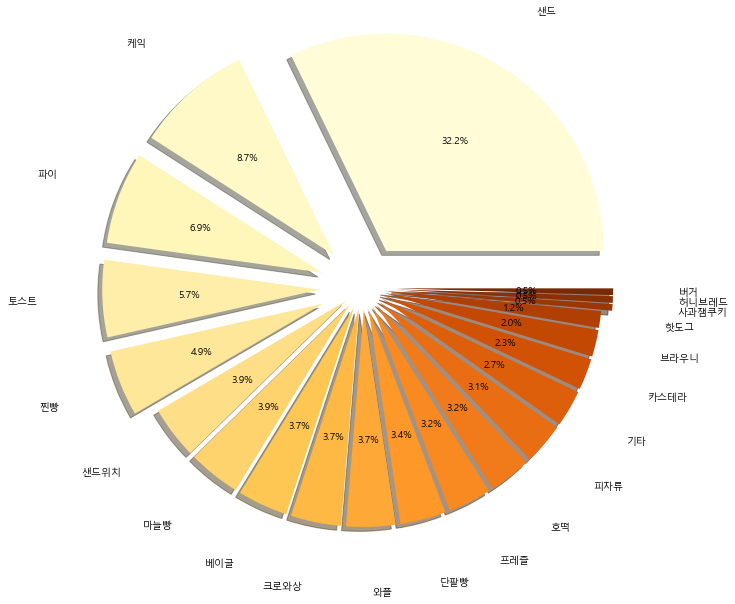

In [462]:
labels = morning_menu["샌드위치"].value_counts().index
colors = sns.color_palette('YlOrBr',len(labels))
explode = [0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.15,0.15,0.15]

plt.figure(figsize=(10,10))
plt.pie(morning_menu["샌드위치"].value_counts(), labels = labels, labeldistance=1.3, colors=colors, explode=explode, shadow=True, autopct='%.1f%%')

In [463]:
morning_menu

,일자,조식메뉴_list,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,모닝롤,샌드위치
index,,,,,,,,,,,,
0,2016-02-01,"[모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, 된장찌개, 쥐어채무침,...",찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,1,찐빵
1,2016-02-02,"[모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, 호박젓국찌개, 시래...",단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,1,샌드
2,2016-02-03,"[모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, 콩나물국, 느타리...",베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,1,베이글
3,2016-02-04,"[모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, 근대국, 멸치볶음,...",토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,1,샌드
4,2016-02-05,"[모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, 재첩국, 방풍나물, ...",와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,1,와플
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"[모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...",페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,1,피자류
1201,2021-01-21,"[모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...",생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,1,단팥빵
1202,2021-01-22,"[모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...",BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,1,샌드위치


In [465]:
cafeteria.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '근무자수', '중식사비율',
       '석식사비율', '스페셜메뉴_점심', '스페셜메뉴_저녁', '월', '년도', '코로나', '조식메뉴_list',
       '중식메뉴_list', '석식메뉴_list'],
      dtype='object')

In [469]:
cafeteria_morning = cafeteria[["조식메뉴","본사정원수","본사휴가자수","본사출장자수","현본사소속재택근무자수","근무자수"]]
cafeteria_morning

,조식메뉴,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수
0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,2601,50,150,0.0,2401.0
1,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,2601,50,173,0.0,2378.0
2,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,2601,56,180,0.0,2365.0
3,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",2601,104,220,0.0,2277.0
4,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,2601,278,181,0.0,2142.0
...,...,...,...,...,...,...
1200,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,2983,75,198,391.0,2319.0
1201,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,2983,92,231,351.0,2309.0
1202,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,2983,255,248,303.0,2177.0
1203,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,2983,107,153,327.0,2396.0


In [475]:
morning_final = pd.concat([morning_menu,cafeteria_morning], axis=1)
morning_final = morning_final[['일자','조식메뉴', '모닝롤','빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드', '김치',
       '샌드위치', '본사정원수', '본사휴가자수', '본사출장자수', '현본사소속재택근무자수',
       '근무자수']]

In [477]:
morning_final.columns=['일자', '조식메뉴', '모닝롤', '빵', '음료', '계란', '죽/밥', '국/찌개', '반찬', '샐러드', '김치',
       '빵종류', '본사정원수', '본사휴가자수', '본사출장자수', '현본사소속재택근무자수', '근무자수']

In [478]:
morning_final

,일자,조식메뉴,모닝롤,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,빵종류,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수
0,2016-02-01,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,1,찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,찐빵,2601,50,150,0.0,2401.0
1,2016-02-02,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,1,단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,샌드,2601,50,173,0.0,2378.0
2,2016-02-03,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,1,베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,베이글,2601,56,180,0.0,2365.0
3,2016-02-04,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",1,토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,샌드,2601,104,220,0.0,2277.0
4,2016-02-05,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,1,와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,와플,2601,278,181,0.0,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,1,페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,피자류,2983,75,198,391.0,2319.0
1201,2021-01-21,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,1,생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,단팥빵,2983,92,231,351.0,2309.0
1202,2021-01-22,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,1,BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,샌드위치,2983,255,248,303.0,2177.0
1203,2021-01-25,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,1,호박고구마오븐구이,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,감자양파국,분홍소세지구이*케찹,양상추샐러드,포기김치,기타,2983,107,153,327.0,2396.0


In [487]:
morning_final["죽"]=0
morning_final["밥"]=0
for i in range(len(morning_final)):
    morning_final["죽"][i]= morning_final["죽/밥"].str.split("/")[i][0]
    morning_final["밥"][i]= morning_final["죽/밥"].str.split("/")[i][-1]
    
morning_final

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\727044659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["죽"][i]= morning_final["죽/밥"].str.split("/")[i][0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\727044659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["밥"][i]= morning_final["죽/밥"].str.split("/")[i][-1]


,일자,조식메뉴,모닝롤,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,빵종류,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수,죽,밥
0,2016-02-01,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,1,찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,된장찌개,쥐어채무침,0,포기김치,찐빵,2601,50,150,0.0,2401.0,호두죽,쌀밥
1,2016-02-02,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,1,단호박샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,호박젓국찌개,시래기조림,0,포기김치,샌드,2601,50,173,0.0,2378.0,팥죽,쌀밥
2,2016-02-03,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,1,베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,콩나물국,느타리호박볶음,0,포기김치,베이글,2601,56,180,0.0,2365.0,표고버섯죽,쌀밥
3,2016-02-04,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",1,토마토샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,근대국,멸치볶음,0,포기김치,샌드,2601,104,220,0.0,2277.0,닭죽,쌀밥
4,2016-02-05,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,1,와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,재첩국,방풍나물,0,포기김치,와플,2601,278,181,0.0,2142.0,쇠고기죽,쌀밥
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,1,페퍼로니피자,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,피자류,2983,75,198,391.0,2319.0,크루통크림스프,흑미밥
1201,2021-01-21,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,1,생크림단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,단팥빵,2983,92,231,351.0,2309.0,누룽지탕,흑미밥
1202,2021-01-22,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,1,BLT샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,샌드위치,2983,255,248,303.0,2177.0,흑임자죽,흑미밥
1203,2021-01-25,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,1,호박고구마오븐구이,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,감자양파국,분홍소세지구이*케찹,양상추샐러드,포기김치,기타,2983,107,153,327.0,2396.0,누룽지탕,흑미밥


In [489]:
morning_final[morning_final["죽"]==morning_final["밥"]]

,일자,조식메뉴,모닝롤,빵,음료,계란,죽/밥,국/찌개,반찬,샐러드,김치,빵종류,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수,죽,밥
10,2016-02-18,모닝롤/인절미토스트 우유/두유/주스 계란후라이 계란후라이 (쌀:국내산) 선지...,1,인절미토스트,우유/두유/주스,계란후라이,계란후라이,선지해장국,톳두부무침,0,포기김치,토스트,2601,77,254,0.0,2270.0,계란후라이,계란후라이


In [495]:
morning_final["죽/밥"][10]=0
morning_final["죽"][10]=0
morning_final["밥"][10]=0

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2984287176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["죽/밥"][10]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2984287176.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["죽"][10]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2984287176.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["밥"][10]=0


In [500]:
morning_final = morning_final[["일자","조식메뉴","모닝롤","빵","빵종류","음료","계란","죽/밥","죽","밥","국/찌개","반찬","샐러드","김치","본사정원수","본사휴가자수","본사출장자수","현본사소속재택근무자수","근무자수"]]

In [559]:
morning_final.to_csv("data/morning_final.csv", index=False)
cafeteria.to_csv("data/menu_split.csv", index=False)
morning.to_csv("data/아침메뉴.csv", index=False)

In [548]:
index = []
for i in range(len(morning_final)):
    if morning_final["죽"][i] != 0:
        if len(morning_final["죽"].str.split("'")[i])>1:
            index.append(i)
        else:
            pass
index

[383,
 584,
 617,
 619,
 809,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046]

In [554]:
for i in list(morning_final.iloc[index]["죽"].index):
    morning_final["죽"][i] = morning_final["죽"][i][2:]



C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\255694634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["죽"][i] = morning_final["죽"][i][2:]


Int64Index([ 383,  584,  617,  619,  809, 1035, 1036, 1037, 1038, 1039, 1040,
            1041, 1042, 1043, 1044, 1045, 1046],
           dtype='int64')

In [562]:
morning_final.iloc[index]["밥"][383][:-1]

'쌀밥'

In [558]:
morning_final["죽"].value_counts()[:30]

누룽지탕      426
야채죽        53
흑임자죽       50
녹두죽        48
잣죽         46
팥죽         41
해물죽        37
홍게살죽       34
닭죽         33
쇠고기죽       32
땅콩죽        29
김치죽        29
고구마죽       26
양송이죽       25
단호박죽       25
견과류죽       25
새우살죽       24
호박죽        21
표고버섯죽      21
크림누룽지탕     16
밤죽         15
브로컬리죽      12
참치죽        11
참치야채죽      10
소고기죽       10
새송이죽        8
채소죽         7
소라살죽        7
늙은호박죽       6
호두죽         6
Name: 죽, dtype: int64

In [560]:
index = []
for i in range(len(morning_final)):
    if morning_final["밥"][i] != 0:
        if len(morning_final["밥"].str.split("'")[i])>1:
            index.append(i)
        else:
            pass
index

[383,
 584,
 617,
 619,
 809,
 1035,
 1036,
 1037,
 1038,
 1039,
 1040,
 1041,
 1042,
 1043,
 1044,
 1045,
 1046]

In [585]:
for i in list(morning_final.iloc[index]["밥"].index):
    morning_final["밥"][i] = morning_final["밥"][i][:-1]
morning_final.iloc[index]["밥"]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\858395432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["밥"][i] = morning_final["밥"][i][:-1]


383                쌀밥
584     쌀밥<120명 새우살죽>
617                쌀밥
619                쌀밥
809                쌀밥
1035               쌀밥
1036               쌀밥
1037               쌀밥
1038               쌀밥
1039               쌀밥
1040               쌀밥
1041               쌀밥
1042               쌀밥
1043               쌀밥
1044               쌀밥
1045               쌀밥
1046               쌀밥
Name: 밥, dtype: object

In [565]:
for i in list(morning_final.iloc[index]["죽"].index):
    morning_final["죽"][i] = morning_final["죽"][i]+"죽"
morning_final.iloc[index]["죽"]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\2803162517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final["죽"][i] = morning_final["죽"][i]+"죽"


383       버섯죽
584      누룽지죽
617      누룽지죽
619      누룽지죽
809       호박죽
1035     누룽지죽
1036     흑임자죽
1037     누룽지죽
1038     누룽지죽
1039      녹두죽
1040     누룽지죽
1041     새알팥죽
1042     누룽지죽
1043     단호박죽
1044    새우야채죽
1045     누룽지죽
1046     소고기죽
Name: 죽, dtype: object

In [567]:
morning_final.iloc[index]

,일자,조식메뉴,모닝롤,빵,빵종류,음료,계란,죽/밥,죽,밥,국/찌개,반찬,샐러드,김치,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수
383,2017-08-21,모닝롤/와플 옥수수스프/사과 우유/주스 키위드레싱샐러드 버섯죽/쌀밥 (쌀:국내산) ...,1,/와플',와플,'우유/주스','시금치프리타타','버섯죽/쌀밥',버섯죽,쌀밥,'북어해장국','옥수수스프/사과','키위드레싱샐러드','포기김치',2645,74,169,0.0,2402.0
584,2018-06-20,모닝롤/메론롤케익 우유/주스 계란후라이 누룽지탕/쌀밥 <120명 새우살죽> 시금치...,1,/메론롤케익',케익,'우유/주스','계란후라이','누룽지탕/쌀밥<120명 새우살죽>',누룽지죽,쌀밥<120명 새우살죽>,'시금치국','애호박나물',0,'포기김치',2728,73,257,0.0,2398.0
617,2018-08-06,모닝롤/시금치핫케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 들깨미역국 ...,1,/시금치핫케익',케익,'우유/주스','계란후라이','누룽지탕/쌀밥',누룽지죽,쌀밥,'들깨미역국','건새우마늘쫑볶음','아오리사과','포기김치',2996,504,158,0.0,2334.0
619,2018-08-08,모닝롤/카스텔라 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 대구찌개 깻순...,1,/카스텔라',카스테라,'우유/주스','계란후라이','누룽지탕/쌀밥',누룽지죽,쌀밥,'대구찌개','깻순나물','수박','포기김치',2996,470,235,0.0,2291.0
809,2019-05-29,모닝롤/찐빵 (샐러드닭가슴살 없이) 우유/주스 스크램블에그 호박죽/쌀밥 (쌀:국내산...,1,/찐빵',찐빵,'우유/주스','스크램블에그','호박죽/쌀밥',호박죽,쌀밥,'차돌박이찌개','청포묵무침',0,'포기김치',2825,50,237,0.0,2538.0
1035,2020-04-27,모닝롤/ 남친샌드위치 우유/주스 계란후라이/삶은계란 누룽지탕/쌀밥 사과베이비샐러드 ...,1,/남친샌드위치',샌드위치,'우유/주스','계란후라이/삶은계란','누룽지탕/쌀밥',누룽지죽,쌀밥,'참치김치찌개','쑥갓두부무침','사과베이비샐러드','포기김치',2962,125,192,418.0,2227.0
1036,2020-04-28,모닝롤/샌드위치 컵케익 우유/주스 계란후라이 흑임자죽/쌀밥 샐러드*땅콩소스 건새우아...,1,/샌드위치/컵케익',샌드위치,'우유/주스','계란후라이','흑임자죽/쌀밥',흑임자죽,쌀밥,'건새우아욱국','매운감자조림','샐러드*땅콩소스','포기김치',2962,118,223,410.0,2211.0
1037,2020-04-29,모닝롤/ 크로아상샌드위치 우유/주스 계란후라이 누룽지탕/쌀밥 시금치샐러드 콩가루배춧...,1,/크로아상샌드위치',샌드위치,'우유/주스','계란후라이','누룽지탕/쌀밥',누룽지죽,쌀밥,'콩가루배춧국','콩나물간장조림','시금치샐러드','포기김치',2962,221,250,396.0,2095.0
1038,2020-05-04,모닝롤/애플파이 우유/주스 계란후라이 누룽지탕/쌀밥 바나나베이비샐러드 소고기무우국...,1,/애플파이',파이,'우유/주스','계란후라이','누룽지탕/쌀밥',누룽지죽,쌀밥,'소고기무우국','방울양배추베이컨볶음','바나나베이비샐러드','포기김치',2962,1113,117,189.0,1543.0
1039,2020-05-06,모닝롤/생크림와플 우유/주스 계란후라이 녹두죽/쌀밥 비타민샐러드 호박새우젓국 브...,1,/생크림와플',와플,'우유/주스','계란후라이','녹두죽/쌀밥',녹두죽,쌀밥,'호박새우젓국','브로콜리감자볶음','비타민샐러드','포기김치',2962,104,177,291.0,2390.0


In [586]:
columns = ['빵', '음료', '계란', '죽/밥', '국/찌개','반찬', '샐러드', '김치']

for i in index:
    for column in columns:
        if morning_final[column][i]!=0:
            if column == "빵":
                morning_final[column][i] = morning_final[column][i][1:-1]
            else:
                morning_final[column][i] = morning_final[column][i][2:-1]
        
        
morning_final.iloc[index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\896263253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final[column][i] = morning_final[column][i][1:-1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_2208\896263253.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_final[column][i] = morning_final[column][i][2:-1]


,일자,조식메뉴,모닝롤,빵,빵종류,음료,계란,죽/밥,죽,밥,국/찌개,반찬,샐러드,김치,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수
383,2017-08-21,모닝롤/와플 옥수수스프/사과 우유/주스 키위드레싱샐러드 버섯죽/쌀밥 (쌀:국내산) ...,1,와플,와플,우유/주스,시금치프리타타,버섯죽/쌀밥,버섯죽,쌀밥,북어해장국,옥수수스프/사과,키위드레싱샐러드,포기김치,2645,74,169,0.0,2402.0
584,2018-06-20,모닝롤/메론롤케익 우유/주스 계란후라이 누룽지탕/쌀밥 <120명 새우살죽> 시금치...,1,메론롤케익,케익,우유/주스,계란후라이,누룽지탕/쌀밥<120명 새우살죽>,누룽지탕,쌀밥<120명 새우살죽>,시금치국,애호박나물,,포기김치,2728,73,257,0.0,2398.0
617,2018-08-06,모닝롤/시금치핫케익 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 들깨미역국 ...,1,시금치핫케익,케익,우유/주스,계란후라이,누룽지탕/쌀밥,누룽지탕,쌀밥,들깨미역국,건새우마늘쫑볶음,아오리사과,포기김치,2996,504,158,0.0,2334.0
619,2018-08-08,모닝롤/카스텔라 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 대구찌개 깻순...,1,카스텔라,카스테라,우유/주스,계란후라이,누룽지탕/쌀밥,누룽지탕,쌀밥,대구찌개,깻순나물,수박,포기김치,2996,470,235,0.0,2291.0
809,2019-05-29,모닝롤/찐빵 (샐러드닭가슴살 없이) 우유/주스 스크램블에그 호박죽/쌀밥 (쌀:국내산...,1,찐빵,찐빵,우유/주스,스크램블에그,호박죽/쌀밥,호박죽,쌀밥,차돌박이찌개,청포묵무침,,포기김치,2825,50,237,0.0,2538.0
1035,2020-04-27,모닝롤/ 남친샌드위치 우유/주스 계란후라이/삶은계란 누룽지탕/쌀밥 사과베이비샐러드 ...,1,남친샌드위치,샌드위치,우유/주스,계란후라이/삶은계란,누룽지탕/쌀밥,누룽지탕,쌀밥,참치김치찌개,쑥갓두부무침,사과베이비샐러드,포기김치,2962,125,192,418.0,2227.0
1036,2020-04-28,모닝롤/샌드위치 컵케익 우유/주스 계란후라이 흑임자죽/쌀밥 샐러드*땅콩소스 건새우아...,1,샌드위치/컵케익,샌드위치,우유/주스,계란후라이,흑임자죽/쌀밥,흑임자죽,쌀밥,건새우아욱국,매운감자조림,샐러드*땅콩소스,포기김치,2962,118,223,410.0,2211.0
1037,2020-04-29,모닝롤/ 크로아상샌드위치 우유/주스 계란후라이 누룽지탕/쌀밥 시금치샐러드 콩가루배춧...,1,크로아상샌드위치,샌드위치,우유/주스,계란후라이,누룽지탕/쌀밥,누룽지탕,쌀밥,콩가루배춧국,콩나물간장조림,시금치샐러드,포기김치,2962,221,250,396.0,2095.0
1038,2020-05-04,모닝롤/애플파이 우유/주스 계란후라이 누룽지탕/쌀밥 바나나베이비샐러드 소고기무우국...,1,애플파이,파이,우유/주스,계란후라이,누룽지탕/쌀밥,누룽지탕,쌀밥,소고기무우국,방울양배추베이컨볶음,바나나베이비샐러드,포기김치,2962,1113,117,189.0,1543.0
1039,2020-05-06,모닝롤/생크림와플 우유/주스 계란후라이 녹두죽/쌀밥 비타민샐러드 호박새우젓국 브...,1,생크림와플,와플,우유/주스,계란후라이,녹두죽/쌀밥,녹두죽,쌀밥,호박새우젓국,브로콜리감자볶음,비타민샐러드,포기김치,2962,104,177,291.0,2390.0


In [588]:
morning_final.to_csv("data/morning_final.csv", index=False)

In [3]:
morning_final = pd.read_csv("data/morning_final.csv")
morning_final

,일자,조식메뉴,모닝롤,빵,빵종류,음료,계란,죽/밥,죽,밥,국/찌개,반찬,샐러드,김치,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수
0,2016-02-01,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,1,찐빵,찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,호두죽,쌀밥,된장찌개,쥐어채무침,0,포기김치,2601,50,150,0.0,2401.0
1,2016-02-02,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,1,단호박샌드,샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,팥죽,쌀밥,호박젓국찌개,시래기조림,0,포기김치,2601,50,173,0.0,2378.0
2,2016-02-03,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,1,베이글,베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,표고버섯죽,쌀밥,콩나물국,느타리호박볶음,0,포기김치,2601,56,180,0.0,2365.0
3,2016-02-04,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",1,토마토샌드,샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,닭죽,쌀밥,근대국,멸치볶음,0,포기김치,2601,104,220,0.0,2277.0
4,2016-02-05,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,1,와플,와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,쇠고기죽,쌀밥,재첩국,방풍나물,0,포기김치,2601,278,181,0.0,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,1,페퍼로니피자,피자류,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,크루통크림스프,흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,2983,75,198,391.0,2319.0
1201,2021-01-21,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,1,생크림단팥빵,단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,누룽지탕,흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,2983,92,231,351.0,2309.0
1202,2021-01-22,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,1,BLT샌드위치,샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,흑임자죽,흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,2983,255,248,303.0,2177.0
1203,2021-01-25,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,1,호박고구마오븐구이,기타,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,누룽지탕,흑미밥,감자양파국,분홍소세지구이*케찹,양상추샐러드,포기김치,2983,107,153,327.0,2396.0


### 점심메뉴 분류하기

- 밥, 국, 반찬 개수별로

In [5]:
menu = pd.read_csv('data/menu_split.csv')
menu

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나,조식메뉴_list,중식메뉴_list,석식메뉴_list
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0.432736,0.137859,0,0,2,2016,0,"['모닝롤/찐빵', '우유/두유/주스', '계란후라이', '호두죽/쌀밥', '된장찌...","['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...","['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', ..."
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,0.364592,0.235492,0,1,2,2016,0,"['모닝롤/단호박샌드', '우유/두유/주스', '계란후라이', '팥죽/쌀밥', '호...","['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...","['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포..."
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,0.430021,0.242283,1,0,2,2016,0,"['모닝롤/베이글', '우유/두유/주스', '계란후라이', '표고버섯죽/쌀밥', '...","['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...","['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음'..."
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,0.429513,0.230567,0,1,2,2016,0,"['모닝롤/토마토샌드', '우유/두유/주스', '계란후라이', '닭죽/쌀밥', '근...","['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...","['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포..."
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,0.431839,0.154062,0,0,2,2016,0,"['모닝롤/와플', '우유/두유/주스', '계란후라이', '쇠고기죽/쌀밥', '재첩...","['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...","['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,...,0.471324,0.181544,0,1,1,2021,2,"['모닝롤/페퍼로니피자', '우유/주스', '계란후라이/찐계란', '크루통크림스프/...","['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...","['김치볶음밥', '미니쫄우동*맛살튀김', '브로콜리깨소스무침', '계란후라이', ..."
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,...,0.360329,0.152880,0,0,1,2021,2,"['모닝롤/생크림단팥빵', '우유/주스', '계란후라이/찐계란', '누룽지탕/흑미밥...","['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...","['흑미밥', '쇠고기무국', '삼치양념구이', '비엔나채소볶음', '숙주나물당근무..."
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,...,0.265962,0.099678,1,0,1,2021,2,"['모닝롤/BLT샌드위치', '우유/주스', '계란후라이/찐계란', '흑임자죽/흑미...","['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...","['흑미밥', '수제비국', '수제맛쵸킹탕수육', '유부채소겨자냉채', '참나물무침..."
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,...,0.477880,0.209516,0,0,1,2021,2,"['모닝롤/호박고구마오븐구이', '우유/주스', '계란후라이/찐계란', '누룽지탕/...","['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...","['흑미밥', '열무된장국', '장어강정*데리야끼소스', '깻잎쌈*생강채', '오이..."


In [19]:
lunch = menu[["일자","중식메뉴_list"]]
lunch

,일자,중식메뉴_list
0,2016-02-01,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요..."
1,2016-02-02,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'..."
2,2016-02-03,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요..."
3,2016-02-04,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '..."
4,2016-02-05,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요..."
...,...,...
1200,2021-01-20,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'..."
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯..."
1202,2021-01-22,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해..."
1203,2021-01-25,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'..."


In [25]:
len(lunch["중식메뉴_list"][2].split("', '"))

7

In [26]:
menu_cnt = []
for i in range(len(lunch)):
    menu_cnt.append(len(lunch["중식메뉴_list"][i].split("', '")))

menu_cnt

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,


In [28]:
menu_num = pd.DataFrame({"메뉴개수":menu_cnt})
menu_num["메뉴개수"].value_counts()

6    1012
7     180
8       9
5       4
Name: 메뉴개수, dtype: int64

In [56]:
lunch.iloc[menu_num[menu_num["메뉴개수"]==6].index]["중식메뉴_list"][23]

"['쌀밥/잡곡밥', '북어국', '돈육장조림', '홍어무침', '시금치나물', '포기김치']"

In [58]:
lunch.iloc[menu_num[menu_num["메뉴개수"]==7].index]["중식메뉴_list"][4]

"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']"

In [44]:
lunch.iloc[menu_num[menu_num["메뉴개수"]==8].index]["중식메뉴_list"][1031]

"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러드', '양배추,케일*우렁쌈장', '식혜', '깍두기']"

In [144]:
menu8 = list(lunch.iloc[menu_num[menu_num["메뉴개수"]==8].index]["중식메뉴_list"].index)

In [48]:
lunch.iloc[menu_num[menu_num["메뉴개수"]==8].index]["중식메뉴_list"][1027]

"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새우튀김', '참나물땅콩가루무침', '청포도', '열무김치']"

In [145]:
menu5 = list(lunch.iloc[menu_num[menu_num["메뉴개수"]==5].index]["중식메뉴_list"].index)

In [183]:
lunch["밥"]=0
lunch["국"]=0
lunch["반찬1"]=0
lunch["반찬2"]=0
lunch["반찬3"]=0
lunch["반찬4"]=0
lunch["후식"]=0
lunch["김치"]=0

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3414706613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3414706613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["국"]=0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3414706613.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [184]:
lunch

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",0,0,0,0,0,0,0,0
1,2016-02-02,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",0,0,0,0,0,0,0,0
2,2016-02-03,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",0,0,0,0,0,0,0,0
3,2016-02-04,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",0,0,0,0,0,0,0,0
4,2016-02-05,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",0,0,0,0,0,0,0,0
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",0,0,0,0,0,0,0,0
1202,2021-01-22,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",0,0,0,0,0,0,0,0
1203,2021-01-25,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",0,0,0,0,0,0,0,0


In [52]:
lunch["중식메뉴_list"][0].split("', '")[0]

"['쌀밥/잡곡밥"

In [185]:
for i in range(len(lunch)):
    if i in(list(menu_num[menu_num["메뉴개수"]==6].index)):
        lunch["밥"][i] = lunch["중식메뉴_list"][i].split("', '")[0]
        lunch["국"][i] = lunch["중식메뉴_list"][i].split("', '")[1]
        lunch["반찬1"][i] = lunch["중식메뉴_list"][i].split("', '")[2]
        lunch["반찬2"][i] = lunch["중식메뉴_list"][i].split("', '")[3]
        lunch["반찬3"][i] = lunch["중식메뉴_list"][i].split("', '")[4]
        lunch["김치"][i]=lunch["중식메뉴_list"][i].split("', '")[5]
    elif i in(list(menu_num[menu_num["메뉴개수"]==7].index)):
        lunch["밥"][i] = lunch["중식메뉴_list"][i].split("', '")[0]
        lunch["국"][i] = lunch["중식메뉴_list"][i].split("', '")[1]
        lunch["반찬1"][i] = lunch["중식메뉴_list"][i].split("', '")[2]
        lunch["반찬2"][i] = lunch["중식메뉴_list"][i].split("', '")[3]
        lunch["반찬3"][i] = lunch["중식메뉴_list"][i].split("', '")[4]
        lunch["후식"][i]=lunch["중식메뉴_list"][i].split("', '")[5]
        lunch["김치"][i]=lunch["중식메뉴_list"][i].split("', '")[6]
    else:
        pass

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2538075608.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][i] = lunch["중식메뉴_list"][i].split("', '")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2538075608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["국"][i] = lunch["중식메뉴_list"][i].split("', '")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2538075608.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [186]:
lunch["밥"] = lunch["밥"].str[2:]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1660018564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"] = lunch["밥"].str[2:]


In [187]:
lunch["김치"] = lunch["김치"].str[:-2]
lunch

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\445309994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"] = lunch["김치"].str[:-2]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치
1,2016-02-02,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이
2,2016-02-03,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치
3,2016-02-04,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치
4,2016-02-05,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치
...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,0,단호박물김치,양상추샐러드*오리엔탈D
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,0,무생채,양상추샐러드*파인D
1202,2021-01-22,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,0,포기김치,양상추샐러드*자몽D
1203,2021-01-25,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,0,봄동겉절이/양념김,양상추샐러드*오렌지D


In [188]:
split_index = pd.DataFrame(lunch["후식"].str.contains("/"))[pd.DataFrame(lunch["후식"].str.contains("/"))["후식"]==True].index
lunch.iloc[split_index]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
12,2016-02-22,"['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', ...",쌀밥/오곡밥,쇠고기느타리국,갈치구이,호박꼬지&고사리&무나물,파래김*양념장,0,부럼/요구르트,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,파스타샐러드,0,/오렌지주스,배추겉절이/과일
1087,2020-07-29,"['쌀밥/흑미밥/찰현미밥', '우거지국', '삼겹살수육', '모둠쌈*쌈장', '풋고...",쌀밥/흑미밥/찰현미밥,우거지국,삼겹살수육,모둠쌈*쌈장,풋고추/마늘*새우젓,0,부추무침/보쌈김치/수박화채,그린샐러드*참깨D
1092,2020-08-05,"['쌀밥/흑미밥/찰현미밥', '맑은콩나물국', '장어강정', '꽈리고추메추리알조림'...",쌀밥/흑미밥/찰현미밥,맑은콩나물국,장어강정,꽈리고추메추리알조림,오이양파무침,0,배추겉절이/탱크보이,눈꽃치즈샐러드*오리엔탈D
1093,2020-08-06,"['쌀밥/검정콩밥/찰현미밥', '건새우아욱국', '쭈삼불고기', '분홍소시지전/새송...",쌀밥/검정콩밥/찰현미밥,건새우아욱국,쭈삼불고기,분홍소시지전/새송이전,파프리카해초무침,0,포기김치/찐옥수수,콜리샐러드*발사믹D
1096,2020-08-11,"['쌀밥/렌틸콩밥/찰현미밥', '떡국', '매운쇠고기버섯볶음', '양배추/케일숙쌈*...",쌀밥/렌틸콩밥/찰현미밥,떡국,매운쇠고기버섯볶음,양배추/케일숙쌈*양념간장,더덕무침,0,포기김치/수떡수떡화채,푸실리파스타샐러드
1102,2020-08-20,"['쌀밥/흑미밥/찰현미밥', '순남시래기국', '오리불고기', '갈릭버섯탕수', '...",쌀밥/흑미밥/찰현미밥,순남시래기국,오리불고기,갈릭버섯탕수,검은깨올방개묵무침,0,포기김치/츄러스,마카로니콘샐러드
1103,2020-08-21,"['쌀밥/흑미밥/찰현미밥', '어묵국', '오향장육', '모둠쌈*씨앗쌈장', '고추...",쌀밥/흑미밥/찰현미밥,어묵국,오향장육,모둠쌈*씨앗쌈장,고추지무침,0,김치볶음/요구르트,크루통샐러드*참깨D
1109,2020-08-31,"['쌀밥/흑미밥/찰현미밥', '황태콩나물해장국', '(New)궁보계정', '시금치프...",쌀밥/흑미밥/찰현미밥,황태콩나물해장국,(New)궁보계정,시금치프리타타,가지고추장무침,0,포기김치/요구르트,양상추샐러드*석류D
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,0,포기김치/우무콩국,황도샐러드*황도D


In [189]:
one=[]
two=[]
for i in split_index:
    one.append(lunch.iloc[split_index]["후식"].str.split("/")[i][0])
    two.append(lunch.iloc[split_index]["후식"].str.split("/")[i][1])

#1087, 1129

In [190]:
dessert = pd.DataFrame({"후식1":one, "후식2":two})
dessert

,후식1,후식2
0,부럼,요구르트
1,,오렌지주스
2,부추무침,보쌈김치
3,배추겉절이,탱크보이
4,포기김치,찐옥수수
5,포기김치,수떡수떡화채
6,포기김치,츄러스
7,김치볶음,요구르트
8,포기김치,요구르트
9,포기김치,우무콩국


In [191]:
for i in split_index:
    lunch["반찬4"][i] = lunch.iloc[i]["김치"]
    
lunch.iloc[split_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\32688724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch.iloc[i]["김치"]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
12,2016-02-22,"['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', ...",쌀밥/오곡밥,쇠고기느타리국,갈치구이,호박꼬지&고사리&무나물,파래김*양념장,포기김치,부럼/요구르트,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,파스타샐러드,배추겉절이/과일,/오렌지주스,배추겉절이/과일
1087,2020-07-29,"['쌀밥/흑미밥/찰현미밥', '우거지국', '삼겹살수육', '모둠쌈*쌈장', '풋고...",쌀밥/흑미밥/찰현미밥,우거지국,삼겹살수육,모둠쌈*쌈장,풋고추/마늘*새우젓,그린샐러드*참깨D,부추무침/보쌈김치/수박화채,그린샐러드*참깨D
1092,2020-08-05,"['쌀밥/흑미밥/찰현미밥', '맑은콩나물국', '장어강정', '꽈리고추메추리알조림'...",쌀밥/흑미밥/찰현미밥,맑은콩나물국,장어강정,꽈리고추메추리알조림,오이양파무침,눈꽃치즈샐러드*오리엔탈D,배추겉절이/탱크보이,눈꽃치즈샐러드*오리엔탈D
1093,2020-08-06,"['쌀밥/검정콩밥/찰현미밥', '건새우아욱국', '쭈삼불고기', '분홍소시지전/새송...",쌀밥/검정콩밥/찰현미밥,건새우아욱국,쭈삼불고기,분홍소시지전/새송이전,파프리카해초무침,콜리샐러드*발사믹D,포기김치/찐옥수수,콜리샐러드*발사믹D
1096,2020-08-11,"['쌀밥/렌틸콩밥/찰현미밥', '떡국', '매운쇠고기버섯볶음', '양배추/케일숙쌈*...",쌀밥/렌틸콩밥/찰현미밥,떡국,매운쇠고기버섯볶음,양배추/케일숙쌈*양념간장,더덕무침,푸실리파스타샐러드,포기김치/수떡수떡화채,푸실리파스타샐러드
1102,2020-08-20,"['쌀밥/흑미밥/찰현미밥', '순남시래기국', '오리불고기', '갈릭버섯탕수', '...",쌀밥/흑미밥/찰현미밥,순남시래기국,오리불고기,갈릭버섯탕수,검은깨올방개묵무침,마카로니콘샐러드,포기김치/츄러스,마카로니콘샐러드
1103,2020-08-21,"['쌀밥/흑미밥/찰현미밥', '어묵국', '오향장육', '모둠쌈*씨앗쌈장', '고추...",쌀밥/흑미밥/찰현미밥,어묵국,오향장육,모둠쌈*씨앗쌈장,고추지무침,크루통샐러드*참깨D,김치볶음/요구르트,크루통샐러드*참깨D
1109,2020-08-31,"['쌀밥/흑미밥/찰현미밥', '황태콩나물해장국', '(New)궁보계정', '시금치프...",쌀밥/흑미밥/찰현미밥,황태콩나물해장국,(New)궁보계정,시금치프리타타,가지고추장무침,양상추샐러드*석류D,포기김치/요구르트,양상추샐러드*석류D
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,황도샐러드*황도D,포기김치/우무콩국,황도샐러드*황도D


In [192]:
for i in list(split_index):
    lunch["김치"][i] = dessert["후식1"][list(split_index).index(i)]
    lunch["후식"][i] = dessert["후식2"][list(split_index).index(i)]
lunch.iloc[split_index]


#12, 885

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2290180090.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = dessert["후식1"][list(split_index).index(i)]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2290180090.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = dessert["후식2"][list(split_index).index(i)]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
12,2016-02-22,"['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', ...",쌀밥/오곡밥,쇠고기느타리국,갈치구이,호박꼬지&고사리&무나물,파래김*양념장,포기김치,요구르트,부럼
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,파스타샐러드,배추겉절이/과일,오렌지주스,
1087,2020-07-29,"['쌀밥/흑미밥/찰현미밥', '우거지국', '삼겹살수육', '모둠쌈*쌈장', '풋고...",쌀밥/흑미밥/찰현미밥,우거지국,삼겹살수육,모둠쌈*쌈장,풋고추/마늘*새우젓,그린샐러드*참깨D,보쌈김치,부추무침
1092,2020-08-05,"['쌀밥/흑미밥/찰현미밥', '맑은콩나물국', '장어강정', '꽈리고추메추리알조림'...",쌀밥/흑미밥/찰현미밥,맑은콩나물국,장어강정,꽈리고추메추리알조림,오이양파무침,눈꽃치즈샐러드*오리엔탈D,탱크보이,배추겉절이
1093,2020-08-06,"['쌀밥/검정콩밥/찰현미밥', '건새우아욱국', '쭈삼불고기', '분홍소시지전/새송...",쌀밥/검정콩밥/찰현미밥,건새우아욱국,쭈삼불고기,분홍소시지전/새송이전,파프리카해초무침,콜리샐러드*발사믹D,찐옥수수,포기김치
1096,2020-08-11,"['쌀밥/렌틸콩밥/찰현미밥', '떡국', '매운쇠고기버섯볶음', '양배추/케일숙쌈*...",쌀밥/렌틸콩밥/찰현미밥,떡국,매운쇠고기버섯볶음,양배추/케일숙쌈*양념간장,더덕무침,푸실리파스타샐러드,수떡수떡화채,포기김치
1102,2020-08-20,"['쌀밥/흑미밥/찰현미밥', '순남시래기국', '오리불고기', '갈릭버섯탕수', '...",쌀밥/흑미밥/찰현미밥,순남시래기국,오리불고기,갈릭버섯탕수,검은깨올방개묵무침,마카로니콘샐러드,츄러스,포기김치
1103,2020-08-21,"['쌀밥/흑미밥/찰현미밥', '어묵국', '오향장육', '모둠쌈*씨앗쌈장', '고추...",쌀밥/흑미밥/찰현미밥,어묵국,오향장육,모둠쌈*씨앗쌈장,고추지무침,크루통샐러드*참깨D,요구르트,김치볶음
1109,2020-08-31,"['쌀밥/흑미밥/찰현미밥', '황태콩나물해장국', '(New)궁보계정', '시금치프...",쌀밥/흑미밥/찰현미밥,황태콩나물해장국,(New)궁보계정,시금치프리타타,가지고추장무침,양상추샐러드*석류D,요구르트,포기김치
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,황도샐러드*황도D,우무콩국,포기김치


In [193]:
lunch["후식"][12] = lunch["후식"][12]+"/"+lunch["김치"][12]
lunch["김치"][12] = lunch["반찬4"][12]
lunch["반찬4"][12]=0
lunch["김치"][885] = lunch["반찬4"][885].split("/")[0]
lunch["후식"][885] = lunch["후식"][885]+"/"+lunch["반찬4"][885].split("/")[1]
lunch["반찬4"][885]=0

lunch.iloc[split_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4096728210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][12] = lunch["후식"][12]+"/"+lunch["김치"][12]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4096728210.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][12] = lunch["반찬4"][12]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4096728210.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
12,2016-02-22,"['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', ...",쌀밥/오곡밥,쇠고기느타리국,갈치구이,호박꼬지&고사리&무나물,파래김*양념장,0,요구르트/부럼,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,파스타샐러드,0,오렌지주스과일,배추겉절이
1087,2020-07-29,"['쌀밥/흑미밥/찰현미밥', '우거지국', '삼겹살수육', '모둠쌈*쌈장', '풋고...",쌀밥/흑미밥/찰현미밥,우거지국,삼겹살수육,모둠쌈*쌈장,풋고추/마늘*새우젓,그린샐러드*참깨D,보쌈김치,부추무침
1092,2020-08-05,"['쌀밥/흑미밥/찰현미밥', '맑은콩나물국', '장어강정', '꽈리고추메추리알조림'...",쌀밥/흑미밥/찰현미밥,맑은콩나물국,장어강정,꽈리고추메추리알조림,오이양파무침,눈꽃치즈샐러드*오리엔탈D,탱크보이,배추겉절이
1093,2020-08-06,"['쌀밥/검정콩밥/찰현미밥', '건새우아욱국', '쭈삼불고기', '분홍소시지전/새송...",쌀밥/검정콩밥/찰현미밥,건새우아욱국,쭈삼불고기,분홍소시지전/새송이전,파프리카해초무침,콜리샐러드*발사믹D,찐옥수수,포기김치
1096,2020-08-11,"['쌀밥/렌틸콩밥/찰현미밥', '떡국', '매운쇠고기버섯볶음', '양배추/케일숙쌈*...",쌀밥/렌틸콩밥/찰현미밥,떡국,매운쇠고기버섯볶음,양배추/케일숙쌈*양념간장,더덕무침,푸실리파스타샐러드,수떡수떡화채,포기김치
1102,2020-08-20,"['쌀밥/흑미밥/찰현미밥', '순남시래기국', '오리불고기', '갈릭버섯탕수', '...",쌀밥/흑미밥/찰현미밥,순남시래기국,오리불고기,갈릭버섯탕수,검은깨올방개묵무침,마카로니콘샐러드,츄러스,포기김치
1103,2020-08-21,"['쌀밥/흑미밥/찰현미밥', '어묵국', '오향장육', '모둠쌈*씨앗쌈장', '고추...",쌀밥/흑미밥/찰현미밥,어묵국,오향장육,모둠쌈*씨앗쌈장,고추지무침,크루통샐러드*참깨D,요구르트,김치볶음
1109,2020-08-31,"['쌀밥/흑미밥/찰현미밥', '황태콩나물해장국', '(New)궁보계정', '시금치프...",쌀밥/흑미밥/찰현미밥,황태콩나물해장국,(New)궁보계정,시금치프리타타,가지고추장무침,양상추샐러드*석류D,요구르트,포기김치
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,황도샐러드*황도D,우무콩국,포기김치


In [113]:
lunch["반찬4"][885].split("/")[0]

'배추겉절이'

In [194]:
#lunch["후식"][885] = lunch["후식"][885][:5]+"/"+lunch["후식"][885][5:]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\212454399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][885] = lunch["후식"][885][:5]+"/"+lunch["후식"][885][5:]


In [195]:
lunch.iloc[split_index]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
12,2016-02-22,"['쌀밥/오곡밥', '쇠고기느타리국', '갈치구이', '호박꼬지&고사리&무나물', ...",쌀밥/오곡밥,쇠고기느타리국,갈치구이,호박꼬지&고사리&무나물,파래김*양념장,0,요구르트/부럼,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,파스타샐러드,0,오렌지주스/과일,배추겉절이
1087,2020-07-29,"['쌀밥/흑미밥/찰현미밥', '우거지국', '삼겹살수육', '모둠쌈*쌈장', '풋고...",쌀밥/흑미밥/찰현미밥,우거지국,삼겹살수육,모둠쌈*쌈장,풋고추/마늘*새우젓,그린샐러드*참깨D,보쌈김치,부추무침
1092,2020-08-05,"['쌀밥/흑미밥/찰현미밥', '맑은콩나물국', '장어강정', '꽈리고추메추리알조림'...",쌀밥/흑미밥/찰현미밥,맑은콩나물국,장어강정,꽈리고추메추리알조림,오이양파무침,눈꽃치즈샐러드*오리엔탈D,탱크보이,배추겉절이
1093,2020-08-06,"['쌀밥/검정콩밥/찰현미밥', '건새우아욱국', '쭈삼불고기', '분홍소시지전/새송...",쌀밥/검정콩밥/찰현미밥,건새우아욱국,쭈삼불고기,분홍소시지전/새송이전,파프리카해초무침,콜리샐러드*발사믹D,찐옥수수,포기김치
1096,2020-08-11,"['쌀밥/렌틸콩밥/찰현미밥', '떡국', '매운쇠고기버섯볶음', '양배추/케일숙쌈*...",쌀밥/렌틸콩밥/찰현미밥,떡국,매운쇠고기버섯볶음,양배추/케일숙쌈*양념간장,더덕무침,푸실리파스타샐러드,수떡수떡화채,포기김치
1102,2020-08-20,"['쌀밥/흑미밥/찰현미밥', '순남시래기국', '오리불고기', '갈릭버섯탕수', '...",쌀밥/흑미밥/찰현미밥,순남시래기국,오리불고기,갈릭버섯탕수,검은깨올방개묵무침,마카로니콘샐러드,츄러스,포기김치
1103,2020-08-21,"['쌀밥/흑미밥/찰현미밥', '어묵국', '오향장육', '모둠쌈*씨앗쌈장', '고추...",쌀밥/흑미밥/찰현미밥,어묵국,오향장육,모둠쌈*씨앗쌈장,고추지무침,크루통샐러드*참깨D,요구르트,김치볶음
1109,2020-08-31,"['쌀밥/흑미밥/찰현미밥', '황태콩나물해장국', '(New)궁보계정', '시금치프...",쌀밥/흑미밥/찰현미밥,황태콩나물해장국,(New)궁보계정,시금치프리타타,가지고추장무침,양상추샐러드*석류D,요구르트,포기김치
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,황도샐러드*황도D,우무콩국,포기김치


In [196]:
salad_index = pd.DataFrame(lunch["반찬3"].str.contains("샐러드"))[pd.DataFrame(lunch["반찬3"].str.contains("샐러드"))["반찬3"]==True].index
salad_index

Int64Index([140, 306, 434, 528, 534, 599, 633, 642, 814, 885, 1030, 1069,
            1111],
           dtype='int64')

In [197]:
lunch.iloc[[140, 306, 434, 528, 534, 599, 633, 642, 814, 885, 1030, 1069]]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
140,2016-08-26,"['쌀밥/잡곡밥', '떡국', '마늘치킨', '홍어채무침', '꽃맛살오리엔탈샐러드'...",쌀밥/잡곡밥,떡국,마늘치킨,홍어채무침,꽃맛살오리엔탈샐러드,0,0,포기김치
306,2017-04-26,"['비빔밥', '맑은국', '오징어튀김', '견과류조림', '하와이안샐러드', '깍...",비빔밥,맑은국,오징어튀김,견과류조림,하와이안샐러드,0,0,깍두기
434,2017-11-08,"['콩나물밥', '미역장국', '언양식불고기', '도라지오이무침', '과일샐러드',...",콩나물밥,미역장국,언양식불고기,도라지오이무침,과일샐러드,0,0,배추겉절이
528,2018-03-27,"['쌀밥/잡곡밥', '콩나물국', '등갈비김치찜', '부추전', '흑임자연근샐러드'...",쌀밥/잡곡밥,콩나물국,등갈비김치찜,부추전,흑임자연근샐러드,0,0,알타리김치
534,2018-04-04,"['곤드레밥*강된장', '가쯔오장국', '닭오븐구이', '오징어숙회무침', '시저샐...",곤드레밥*강된장,가쯔오장국,닭오븐구이,오징어숙회무침,시저샐러드,0,0,포기김치
599,2018-07-11,"['나물비빔밥', '미소장국', '오징어튀김', '견과류조림', '과일샐러드', '...",나물비빔밥,미소장국,오징어튀김,견과류조림,과일샐러드,0,0,포기김치
633,2018-08-29,"['콩나물밥', '팽이장국', '치킨핑거', '메추리알조림', '과일샐러드', '배...",콩나물밥,팽이장국,치킨핑거,메추리알조림,과일샐러드,0,0,배추겉절이
642,2018-09-11,"['쌀밥/잡곡밥', '쇠고기미역국', '닭매운찜', '두부스테이크', '흑임자연근샐...",쌀밥/잡곡밥,쇠고기미역국,닭매운찜,두부스테이크,흑임자연근샐러드,0,0,포기김치
814,2019-06-05,"['곤드레밥*양념장', '맑은국', '코다리조림', '계란말이', '과일샐러드', ...",곤드레밥*양념장,맑은국,코다리조림,계란말이,과일샐러드,0,0,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,파스타샐러드,0,오렌지주스/과일,배추겉절이


In [198]:
salad_index = [140, 306, 434, 528, 534, 599, 633, 642, 814, 885, 1030, 1069]
for i in salad_index:
    lunch["반찬4"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i] = 0
    
lunch.iloc[salad_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1846515154.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1846515154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
140,2016-08-26,"['쌀밥/잡곡밥', '떡국', '마늘치킨', '홍어채무침', '꽃맛살오리엔탈샐러드'...",쌀밥/잡곡밥,떡국,마늘치킨,홍어채무침,0,꽃맛살오리엔탈샐러드,0,포기김치
306,2017-04-26,"['비빔밥', '맑은국', '오징어튀김', '견과류조림', '하와이안샐러드', '깍...",비빔밥,맑은국,오징어튀김,견과류조림,0,하와이안샐러드,0,깍두기
434,2017-11-08,"['콩나물밥', '미역장국', '언양식불고기', '도라지오이무침', '과일샐러드',...",콩나물밥,미역장국,언양식불고기,도라지오이무침,0,과일샐러드,0,배추겉절이
528,2018-03-27,"['쌀밥/잡곡밥', '콩나물국', '등갈비김치찜', '부추전', '흑임자연근샐러드'...",쌀밥/잡곡밥,콩나물국,등갈비김치찜,부추전,0,흑임자연근샐러드,0,알타리김치
534,2018-04-04,"['곤드레밥*강된장', '가쯔오장국', '닭오븐구이', '오징어숙회무침', '시저샐...",곤드레밥*강된장,가쯔오장국,닭오븐구이,오징어숙회무침,0,시저샐러드,0,포기김치
599,2018-07-11,"['나물비빔밥', '미소장국', '오징어튀김', '견과류조림', '과일샐러드', '...",나물비빔밥,미소장국,오징어튀김,견과류조림,0,과일샐러드,0,포기김치
633,2018-08-29,"['콩나물밥', '팽이장국', '치킨핑거', '메추리알조림', '과일샐러드', '배...",콩나물밥,팽이장국,치킨핑거,메추리알조림,0,과일샐러드,0,배추겉절이
642,2018-09-11,"['쌀밥/잡곡밥', '쇠고기미역국', '닭매운찜', '두부스테이크', '흑임자연근샐...",쌀밥/잡곡밥,쇠고기미역국,닭매운찜,두부스테이크,0,흑임자연근샐러드,0,포기김치
814,2019-06-05,"['곤드레밥*양념장', '맑은국', '코다리조림', '계란말이', '과일샐러드', ...",곤드레밥*양념장,맑은국,코다리조림,계란말이,0,과일샐러드,0,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,0,파스타샐러드,오렌지주스/과일,배추겉절이


In [200]:
lunch["후식"][1069] = lunch["김치"][1069]
lunch["김치"][1069] = "포기김치"
lunch.iloc[[140, 306, 434, 528, 534, 599, 633, 642, 814, 885, 1030, 1069,1111]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4153974978.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1069] = lunch["김치"][1069]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4153974978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1069] = "포기김치"


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
140,2016-08-26,"['쌀밥/잡곡밥', '떡국', '마늘치킨', '홍어채무침', '꽃맛살오리엔탈샐러드'...",쌀밥/잡곡밥,떡국,마늘치킨,홍어채무침,0,꽃맛살오리엔탈샐러드,0,포기김치
306,2017-04-26,"['비빔밥', '맑은국', '오징어튀김', '견과류조림', '하와이안샐러드', '깍...",비빔밥,맑은국,오징어튀김,견과류조림,0,하와이안샐러드,0,깍두기
434,2017-11-08,"['콩나물밥', '미역장국', '언양식불고기', '도라지오이무침', '과일샐러드',...",콩나물밥,미역장국,언양식불고기,도라지오이무침,0,과일샐러드,0,배추겉절이
528,2018-03-27,"['쌀밥/잡곡밥', '콩나물국', '등갈비김치찜', '부추전', '흑임자연근샐러드'...",쌀밥/잡곡밥,콩나물국,등갈비김치찜,부추전,0,흑임자연근샐러드,0,알타리김치
534,2018-04-04,"['곤드레밥*강된장', '가쯔오장국', '닭오븐구이', '오징어숙회무침', '시저샐...",곤드레밥*강된장,가쯔오장국,닭오븐구이,오징어숙회무침,0,시저샐러드,0,포기김치
599,2018-07-11,"['나물비빔밥', '미소장국', '오징어튀김', '견과류조림', '과일샐러드', '...",나물비빔밥,미소장국,오징어튀김,견과류조림,0,과일샐러드,0,포기김치
633,2018-08-29,"['콩나물밥', '팽이장국', '치킨핑거', '메추리알조림', '과일샐러드', '배...",콩나물밥,팽이장국,치킨핑거,메추리알조림,0,과일샐러드,0,배추겉절이
642,2018-09-11,"['쌀밥/잡곡밥', '쇠고기미역국', '닭매운찜', '두부스테이크', '흑임자연근샐...",쌀밥/잡곡밥,쇠고기미역국,닭매운찜,두부스테이크,0,흑임자연근샐러드,0,포기김치
814,2019-06-05,"['곤드레밥*양념장', '맑은국', '코다리조림', '계란말이', '과일샐러드', ...",곤드레밥*양념장,맑은국,코다리조림,계란말이,0,과일샐러드,0,포기김치
885,2019-09-18,"['쌀밥/잡곡밥', '소고기미역국', '탄두리치킨', '오징어숙회무침', '파스타샐...",쌀밥/잡곡밥,소고기미역국,탄두리치킨,오징어숙회무침,0,파스타샐러드,오렌지주스/과일,배추겉절이


In [201]:
add_index = lunch[lunch["밥"].isna()==True].index

lunch.iloc[add_index]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",NaN,0,0,0,0,0,0,NaN
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",NaN,0,0,0,0,0,0,NaN
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",NaN,0,0,0,0,0,0,NaN
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",NaN,0,0,0,0,0,0,NaN
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",NaN,0,0,0,0,0,0,NaN
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",NaN,0,0,0,0,0,0,NaN
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",NaN,0,0,0,0,0,0,NaN
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",NaN,0,0,0,0,0,0,NaN
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",NaN,0,0,0,0,0,0,NaN
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",NaN,0,0,0,0,0,0,NaN


In [202]:
menu8, menu5

([1027, 1031, 1032, 1033, 1034, 1039, 1041, 1142, 1168], [175, 223, 288, 289])

In [203]:
for i in menu8:
    lunch["밥"][i] = lunch["중식메뉴_list"][i].split("', '")[0]
    lunch["국"][i] = lunch["중식메뉴_list"][i].split("', '")[1]
    lunch["반찬1"][i] = lunch["중식메뉴_list"][i].split("', '")[2]
    lunch["반찬2"][i] = lunch["중식메뉴_list"][i].split("', '")[3]
    lunch["반찬3"][i] = lunch["중식메뉴_list"][i].split("', '")[4]
    lunch["반찬4"][i] = lunch["중식메뉴_list"][i].split("', '")[5]
    lunch["후식"][i] = lunch["중식메뉴_list"][i].split("', '")[6]
    lunch["김치"][i] = lunch["중식메뉴_list"][i].split("', '")[7]
    
for i in menu5:
    lunch["밥"][i] = lunch["중식메뉴_list"][i].split("', '")[0]
    lunch["국"][i] = lunch["중식메뉴_list"][i].split("', '")[1]
    lunch["반찬1"][i] = lunch["중식메뉴_list"][i].split("', '")[2]
    lunch["반찬2"][i] = lunch["중식메뉴_list"][i].split("', '")[3]
    lunch["김치"][i] = lunch["중식메뉴_list"][i].split("', '")[4]
    
    


C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3298586076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][i] = lunch["중식메뉴_list"][i].split("', '")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3298586076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["국"][i] = lunch["중식메뉴_list"][i].split("', '")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3298586076.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [204]:
add_index = [175, 223, 288, 289, 1027, 1031, 1032, 1033, 1034, 1039, 1041, 1142, 1168]
lunch.iloc[add_index]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",['쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치']
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",['쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치']
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",['쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치']
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",['쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치']
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",['쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드,새우튀김,참나물땅콩가루무침,청포도,열무김치']
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",['쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,베리베리샐러드,"양배추,케일*우렁쌈장",식혜,깍두기']
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",['쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,단호박견과류구이,가지나물무침,오미자주스,배추겉절이']
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",['쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,연어훈제샐러드,두릅새송이초무침,자몽에이드,알타리김치']
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",['쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,그린샐러드,문어오이미역초무침,요거트드링킹,포기김치']
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",['쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,"황도샐러드,포도주스",석박지,고추가루:중국산)']


In [205]:
for i in list(add_index):
    lunch["밥"][i] = lunch["밥"][i][2:]

lunch.iloc[add_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3888903716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][i] = lunch["밥"][i][2:]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치']
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치']
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치']
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치']
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드,새우튀김,참나물땅콩가루무침,청포도,열무김치']
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,베리베리샐러드,"양배추,케일*우렁쌈장",식혜,깍두기']
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,단호박견과류구이,가지나물무침,오미자주스,배추겉절이']
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,연어훈제샐러드,두릅새송이초무침,자몽에이드,알타리김치']
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,그린샐러드,문어오이미역초무침,요거트드링킹,포기김치']
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,"황도샐러드,포도주스",석박지,고추가루:중국산)']


In [206]:
for i in list(add_index):
    lunch["김치"][i] = lunch["김치"][i][:-2]
    
lunch.iloc[add_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3288783227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = lunch["김치"][i][:-2]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드,새우튀김,참나물땅콩가루무침,청포도,열무김치
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,베리베리샐러드,"양배추,케일*우렁쌈장",식혜,깍두기
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,단호박견과류구이,가지나물무침,오미자주스,배추겉절이
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,연어훈제샐러드,두릅새송이초무침,자몽에이드,알타리김치
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,그린샐러드,문어오이미역초무침,요거트드링킹,포기김치
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,"황도샐러드,포도주스",석박지,고추가루:중국산)


In [207]:
lunch["밥"][1142] = lunch["밥"][1142]+lunch["국"][1142]
lunch["국"][1142] = lunch["반찬1"][1142]
lunch["반찬1"][1142] = lunch["반찬2"][1142]
lunch["반찬2"][1142] = lunch["반찬3"][1142]
lunch["반찬3"][1142] = lunch["반찬4"][1142]
lunch["반찬4"][1142] = lunch["김치"][1142]
lunch["김치"][1142] = lunch["후식"][1142]
lunch.iloc[add_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3237596207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][1142] = lunch["밥"][1142]+lunch["국"][1142]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3237596207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["국"][1142] = lunch["국"][1142]+lunch["반찬1"][1142]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3237596207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드,새우튀김,참나물땅콩가루무침,청포도,열무김치
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,베리베리샐러드,"양배추,케일*우렁쌈장",식혜,깍두기
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,단호박견과류구이,가지나물무침,오미자주스,배추겉절이
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,연어훈제샐러드,두릅새송이초무침,자몽에이드,알타리김치
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,그린샐러드,문어오이미역초무침,요거트드링킹,포기김치
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,"황도샐러드,포도주스",석박지,고추가루:중국산)


In [209]:
lunch["김치"][1039]=lunch["후식"][1039]
lunch["김치"][1041] = lunch["후식"][1041]
lunch["후식"][1039]=lunch["반찬4"][1039].split(",")[1]
lunch["후식"][1041]=lunch["반찬4"][1041].split(",")[1]
lunch["반찬4"][1039] = lunch["반찬4"][1039].split(",")[0]
lunch["반찬4"][1041] = lunch["반찬4"][1041].split(",")[0]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3193690802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1039]=lunch["후식"][1039]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3193690802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1041] = lunch["후식"][1041]


IndexError: list index out of range

In [212]:
lunch.iloc[add_index]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드,새우튀김,참나물땅콩가루무침,청포도,열무김치
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,베리베리샐러드,"양배추,케일*우렁쌈장",식혜,깍두기
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,단호박견과류구이,가지나물무침,오미자주스,배추겉절이
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,연어훈제샐러드,두릅새송이초무침,자몽에이드,알타리김치
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,그린샐러드,문어오이미역초무침,요거트드링킹,포기김치
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,황도샐러드,포도주스,포도주스


In [213]:
# lunch["밥"][1142] = "쌀밥/곤드레밥/찰현미밥"
# lunch["국"][1142] = "된장찌개"
# lunch["김치"][1039]="석박지"
# lunch["김치"][1041]="깍두기"
lunch["후식"][1142]=0
lunch["반찬3"][1168] = lunch["반찬3"][1168]+lunch["반찬4"][1168]
lunch["반찬4"][1168] = lunch["김치"][1168]
lunch["김치"][1168] = lunch["후식"][1168]
lunch["후식"][1168]=0

lunch.iloc[add_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3062105745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][1142] = "쌀밥/곤드레밥/찰현미밥"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3062105745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["국"][1142] = "된장찌개"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3062105745.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1039]="석박지"
C:\Users\gyeoa\A

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,주꾸미세비체샐러드,새우튀김,참나물땅콩가루무침,청포도,열무김치
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,베리베리샐러드,"양배추,케일*우렁쌈장",식혜,깍두기
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,단호박견과류구이,가지나물무침,오미자주스,배추겉절이
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,연어훈제샐러드,두릅새송이초무침,자몽에이드,알타리김치
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,그린샐러드,문어오이미역초무침,요거트드링킹,포기김치
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,황도샐러드,포도주스,석박지


In [214]:
salad_list = list(lunch["반찬3"][[1031,1032,1033,1034]].values)
salad_list

['베리베리샐러드', '단호박견과류구이', '연어훈제샐러드', '그린샐러드']

In [215]:
lunch["반찬2"][1027] = lunch["반찬4"][1027]
lunch["반찬4"][1027] = "주꾸미세비체샐러드"
lunch["반찬3"][1031] = lunch["반찬4"][1031]
lunch["반찬4"][1031] = salad_list[0]
lunch["반찬3"][1032] = lunch["반찬4"][1032]
lunch["반찬4"][1032] = salad_list[1]
lunch["반찬3"][1033] = lunch["반찬4"][1033]
lunch["반찬4"][1033] = salad_list[2]
lunch["반찬3"][1034] = lunch["반찬4"][1034]
lunch["반찬4"][1034] = salad_list[3]

lunch.iloc[add_index]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\645698647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][1027] = lunch["반찬4"][1027]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\645698647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1027] = "주꾸미세비체샐러드"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\645698647.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][1031] = lunch["반찬

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
175,2016-10-20,"['쌀밥/잡곡밥', '꽁치김치말이', '메밀버섯전', '쑥갓두부무침', '알타리김치']",쌀밥/잡곡밥,꽁치김치말이,메밀버섯전,쑥갓두부무침,0,0,0,알타리김치
223,2016-12-27,"['쌀밥/잡곡밥', '열무된장국', '닭갈비', '우엉잡채', '포기김치']",쌀밥/잡곡밥,열무된장국,닭갈비,우엉잡채,0,0,0,포기김치
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치
289,2017-04-03,"['쌀밥/잡곡밥', '꽃게탕', '오이달래무침', '쌈무/양파절임', '포기김치']",쌀밥/잡곡밥,꽃게탕,오이달래무침,쌈무/양파절임,0,0,0,포기김치
1027,2020-04-14,"['쌀밥/잡곡밥', '홍초콩나물국', 'LA갈비구이', '주꾸미세비체샐러드', '새...",쌀밥/잡곡밥,홍초콩나물국,LA갈비구이,참나물땅콩가루무침,새우튀김,주꾸미세비체샐러드,청포도,열무김치
1031,2020-04-21,"['쌀밥/잡곡밥', '멸치국수', '오향장육', '꼬막미나리초무침', '베리베리샐러...",쌀밥/잡곡밥,멸치국수,오향장육,꼬막미나리초무침,"양배추,케일*우렁쌈장",베리베리샐러드,식혜,깍두기
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,가지나물무침,단호박견과류구이,오미자주스,배추겉절이
1033,2020-04-23,"['쌀밥/잡곡밥', '새우완자탕', '고구마치즈돈까스', '해물볶음우동', '연어훈...",쌀밥/잡곡밥,새우완자탕,고구마치즈돈까스,해물볶음우동,두릅새송이초무침,연어훈제샐러드,자몽에이드,알타리김치
1034,2020-04-24,"['쌀밥/잡곡밥', '대구지리탕', '카레닭볶음', '모듬소세지버섯구이', '그린샐...",쌀밥/잡곡밥,대구지리탕,카레닭볶음,모듬소세지버섯구이,문어오이미역초무침,그린샐러드,요거트드링킹,포기김치
1039,2020-05-06,"['쌀밥/잡곡밥', '왕갈비탕', '해물전', '쫄면야채무침', '꼬시래기무초무침'...",쌀밥/잡곡밥,왕갈비탕,해물전,쫄면야채무침,꼬시래기무초무침,황도샐러드,포도주스,석박지


In [216]:
lunch["밥"].unique()

array(['쌀밥/잡곡밥', '카레덮밥', '낙지비빔밥', '쌀밥/오곡밥', '비빔밥', '곤드레밥', '콩나물밥*달래장',
       '봄새싹비빔밥', '콩나물밥', '나물비빔밥', '단호박영양밥', '산채비빔밥', '낙지볶음밥', '열무비빔밥',
       '참치회덮밥', '연복풍덮밥', '열무보리비빔밥', '불고기덮밥', '산채비빔밥*강된장', '짜장밥', '버섯영양밥',
       '소불고기덮밥', '오곡밥', '곤드레밥*강된장', '봄나물비빔밥', '카레라이스', '짜장덮밥', '<초복특식>',
       '김치제육덮밥', '곤드레밥*간장양념', '단호박카레라이스', '곤드레밥*양념장', '삼계탕', '콩나물밥*양념장',
       '마파두부덮밥', '쌀밥/옛날돈까스', '야채볶음밥*짜장소스', '김치볶음밥', '오므라이스', '김치볶음밥/계란',
       '파인애플볶음밥', '김치필라프', '불고기비빔밥', '김밥볶음밥', '고기듬뿍카레라이스', '건강비빔밥*약고추장',
       '새우날치알볶음밥', '소고기콩나물밥*양념', '닭살카레라이스', '열무보리비빔밥/강된장', '베이컨김치볶음밥',
       '돈육버섯고추장덮밥', '비빔밥*약고추장', '쌀밥/흑미밥/찰현미밥', '쌀밥/치자밥/찰현미밥',
       '쌀밥/병아리콩밥/찰현미밥', '쌀밥/기장밥/찰현미밥', '낙지비빔밥*계란후라이', '쌀밥/수수밥/찰현미밥',
       '쌀밥/검정콩밥/찰현미밥', '쌀밥/렌틸콩밥/찰현미밥', '쌀밥/차조밥/찰현미밥', '쌀밥/보리밥/찰현미밥',
       '쌀밥/찰보리밥/찰현미밥', '계란채소볶음밥', '쌀밥/귀리밥/찰현미밥', '쌀밥/병아리콩/찰현미밥',
       '쌀밥/곤드레밥/찰현미밥', '전주비빔밥', '쌀밥/완두콩밥/찰현미밥', '쌀밥/강낭콩밥/찰현미밥',
       '(New)바지락비빔밥', '쌀밥/팥밥/찰현미밥', '(New)뿌리채소영양밥&달래양념장', '전주비빔밥*약고추장'],
      dtype=object)

In [217]:
special = list(lunch[lunch["밥"]=="<초복특식>"].index)
lunch[lunch["밥"]=="<초복특식>"]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
356,2017-07-12,"['<초복특식>', '삼계탕', '찹쌀밥', '생야채&쌈장', '수박', '깍두기']",<초복특식>,삼계탕,찹쌀밥,생야채&쌈장,수박,0,0,깍두기
840,2019-07-12,"['<초복특식>', '삼계탕', '찹쌀밥', '생야채&쌈장', '수박', '수제석박지']",<초복특식>,삼계탕,찹쌀밥,생야채&쌈장,수박,0,0,수제석박지


In [218]:
for i in special:
    lunch["밥"][i] = lunch["반찬1"][i]
    lunch["반찬1"][i] = lunch["반찬2"][i]
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬2"][i]=0
    lunch["반찬3"][i]=0
    
lunch.iloc[special]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1770378776.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][i] = lunch["반찬1"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1770378776.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][i] = lunch["반찬2"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1770378776.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
356,2017-07-12,"['<초복특식>', '삼계탕', '찹쌀밥', '생야채&쌈장', '수박', '깍두기']",찹쌀밥,삼계탕,생야채&쌈장,0,0,0,수박,깍두기
840,2019-07-12,"['<초복특식>', '삼계탕', '찹쌀밥', '생야채&쌈장', '수박', '수제석박지']",찹쌀밥,삼계탕,생야채&쌈장,0,0,0,수박,수제석박지


In [219]:
lunch["국"].unique()

array(['오징어찌개', '김치찌개', '팽이장국', '쇠고기무국', '떡국', '시래기국', '꽃게탕', '시금치국',
       '냉이된장국', '유부장국', '대구찌개', '쇠고기느타리국', '콩나물국', '북어계란국', '수제비국',
       '얼갈이된장국', '쇠고기미역국', '근대된장국', '부대찌개', '차돌박이찌개', '북어국', '고추장찌개',
       '배추된장국', '어묵국', '쑥국', '콩나물김치국', '사골우거지국', '쇠고기샤브국', '맑은국', '닭개장',
       '옹심이만두국', '쪽파국', '매운콩나물국', '버섯들깨탕', '순두부찌개', '올갱이아욱국', '냉이된장찌개',
       '육개장', '대구매운탕', '미소장국', '미역국', '돈육김치찌개', '무채국', '매운어묵국', '시래기된장국',
       '오징어국', '된장찌개', '감자고추장찌개', '들깨버섯탕', '열무된장국', '북어콩나물국', '한방갈비탕',
       '미역장국', '쇠고기해장국', '강된장찌개', '오이미역냉국', '참치김치찌개', '도토리묵냉국', '버섯들깨찌개',
       '가쯔오장국', '우무묵냉국', '호박잎찌개', '건새우아욱국', '오이냉국', '사골우거지탕', '우묵콩국',
       '청국장찌개', '부대찌개*라면사리', '복숭아미역냉국', '호박잎된장국', '사과오이냉국', '닭곰탕',
       '해물된장찌개', '버섯매운탕', '두부맑은국', '황태맑은국', '토란국', '아욱된장국', '느타리버섯국',
       '우거지해장국', '시금치된장국', '팽이버섯국', '건새우무국', '꽁치김치말이', '계란국', '동태찌개',
       '알탕', '김치콩나물국', '김치국', '조랭이떡미역국', '설렁탕', '콩비지찌개', '순두부탕', '근대국',
       '홍합탕', '아욱국', '차돌박이된장찌개', '얼갈이국', '사골떡국', '황태국', '짬뽕국', '냉이콩나물국',
      

In [220]:
change = list(lunch[lunch["국"].isin(["찹쌀밥", "옥수수스프", "크림스프", "냉모밀국수"])].index)
lunch[lunch["국"].isin(["찹쌀밥", "옥수수스프", "크림스프", "냉모밀국수"])]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
603,2018-07-17,"['삼계탕', '찹쌀밥', '생야채', '참나물생채', '수박', '석박지']",삼계탕,찹쌀밥,생야채,참나물생채,수박,0,0,석박지
914,2019-11-01,"['쌀밥/옛날돈까스', '옥수수스프', '딸기드레싱샐러드', '감자범벅', '수제피...",쌀밥/옛날돈까스,옥수수스프,딸기드레싱샐러드,감자범벅,수제피클/음료,0,0,포기김치
967,2020-01-17,"['김치필라프', '크림스프', '토마토스파게티', '콥샐러드', '수제피클', '...",김치필라프,크림스프,토마토스파게티,콥샐러드,수제피클,0,0,열무김치
1061,2020-06-05,"['베이컨김치볶음밥', '냉모밀국수', '해물부추전', '야채고로케', '수박', ...",베이컨김치볶음밥,냉모밀국수,해물부추전,야채고로케,수박,0,0,깍두기
1067,2020-07-01,"['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순...",쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,0,포기김치,양상추샐러드*딸기요거트


In [221]:
lunch["밥"][603] = lunch["국"][603]
lunch["국"][603] = "삼계탕"
lunch["후식"][603] = lunch["반찬3"][603]
lunch["반찬3"][603]=0
lunch["반찬4"][914] = lunch["반찬1"][914]
lunch["반찬1"][914] = lunch["밥"][914].split("/")[1]
lunch["밥"][914] = lunch["밥"][914].split("/")[0]
lunch["후식"][914] = lunch["반찬3"][914].split("/")[1]
lunch["반찬3"][914] = lunch["반찬3"][914].split("/")[0]
lunch["반찬4"][967] = lunch["반찬2"][967]
lunch["반찬2"][967] = lunch["반찬3"][967]
lunch["반찬3"][967] = 0
lunch["후식"][1061] = lunch["반찬3"][1061]
lunch["반찬3"][1061]=0
lunch["반찬4"][1067]=lunch["김치"][1067]
lunch["김치"][1067]=lunch["후식"][1067]
lunch["후식"][1067]=0

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1695792452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["밥"][603] = lunch["국"][603]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1695792452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["국"][603] = "삼계탕"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1695792452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][603] = lunch["반찬3"][603]
C:\Us

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
603,2018-07-17,"['삼계탕', '찹쌀밥', '생야채', '참나물생채', '수박', '석박지']",찹쌀밥,삼계탕,생야채,참나물생채,0,0,수박,석박지
914,2019-11-01,"['쌀밥/옛날돈까스', '옥수수스프', '딸기드레싱샐러드', '감자범벅', '수제피...",쌀밥,옥수수스프,옛날돈까스,감자범벅,수제피클,딸기드레싱샐러드,음료,포기김치
967,2020-01-17,"['김치필라프', '크림스프', '토마토스파게티', '콥샐러드', '수제피클', '...",김치필라프,크림스프,토마토스파게티,콥샐러드,수제피클,0,0,열무김치
1061,2020-06-05,"['베이컨김치볶음밥', '냉모밀국수', '해물부추전', '야채고로케', '수박', ...",베이컨김치볶음밥,냉모밀국수,해물부추전,야채고로케,0,0,수박,깍두기
1067,2020-07-01,"['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순...",쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,양상추샐러드*딸기요거트,0,포기김치


In [222]:
# lunch["반찬4"][967] = lunch["반찬2"][967]
# lunch["반찬2"][967] = lunch["반찬3"][967]
# lunch["반찬3"][967] = 0

# lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\494648646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][967] = lunch["반찬2"][967]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\494648646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][967] = lunch["반찬3"][967]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\494648646.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][967] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
603,2018-07-17,"['삼계탕', '찹쌀밥', '생야채', '참나물생채', '수박', '석박지']",찹쌀밥,삼계탕,생야채,참나물생채,0,0,수박,석박지
914,2019-11-01,"['쌀밥/옛날돈까스', '옥수수스프', '딸기드레싱샐러드', '감자범벅', '수제피...",쌀밥,옥수수스프,옛날돈까스,감자범벅,수제피클,딸기드레싱샐러드,음료,포기김치
967,2020-01-17,"['김치필라프', '크림스프', '토마토스파게티', '콥샐러드', '수제피클', '...",김치필라프,크림스프,토마토스파게티,수제피클,0,콥샐러드,0,열무김치
1061,2020-06-05,"['베이컨김치볶음밥', '냉모밀국수', '해물부추전', '야채고로케', '수박', ...",베이컨김치볶음밥,냉모밀국수,해물부추전,야채고로케,0,0,수박,깍두기
1067,2020-07-01,"['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순...",쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,양상추샐러드*딸기요거트,0,포기김치


In [223]:
lunch["반찬1"].unique()
# 고등어김치말이, 샐러드파스타

array(['쇠불고기', '가자미튀김', '치킨핑거', '주꾸미볶음', '돈육씨앗강정', '훈제오리구이', '돈육굴소스볶음',
       '닭감자조림', '탕수어', '쇠고기장조림', '고구마치즈구이', '마늘간장치킨', '갈치구이', '돈육간장볶음',
       '소세지피망볶음', '닭갈비', '오징어볶음', '제육볶음', '탕수육', '고등어김치말이', '돈육장조림',
       '닭데리야끼조림', '수제돈가스', '돈육고추장볶음', '소불고기', '미니채소떡갈비', '버섯불고기', '코다리강정',
       '치킨텐더*요거트D', '자반고등어구이', '오징어튀김', '갈치조림', '오징어볶음*소면', '매운돼지갈비찜',
       '순살양념치킨', '쇠고기단호박조림', '돈육강정', '꽁치한마리구이', '매콤떡갈비조림', '쇠고기볶음',
       '등갈비김치찜', '돈간장불고기', '궁중떡찜', '양념파닭', '미트볼조림', '모둠장조림', '돈육칠리강정',
       '찜닭', '닭오븐구이', '쇠고기불고기', '꼬지삼색전', '닭양념조림', '누룽지탕수육', '순살깐풍기',
       '돼지갈비찜', '떡갈비조림', '가자미양념찜', '레몬탕수육', '간장치킨', '돈삼겹보쌈', '매콤낙지볶음',
       '목살데리야끼구이', '고등어구이', '간장돼지갈비찜', '유자청제육볶음', '꽁치김치말이찜', '닭강정',
       '갈릭돈까스', '순살파닭', '사천식탕수육', '매운주꾸미볶음', '돈육떡강정', '목살데리야끼', '고추장불고기',
       '불닭볶음', '동파삼겹수육', '훈제오리냉채', '꽁치오븐구이', '꽃맛살볶음', '매콤돼지갈비찜', '미니함박조림',
       '장어강정', '삼겹살오븐구이', '새우까스&탈탈소스', '고등어조림', '갈릭돈가스', '소고기숙주볶음',
       '고추잡채*꽃빵', '칠리탕수육', '닭볶음', '동태무조림', '마늘치킨', '계란말이', '닭찜',
       '가자미카

In [227]:
lunch["반찬2"].unique()
# 모듬묵샐러드, 풍기샐러드, 콥샐러드, 시저샐러드, 견과류마카로니 범벅

array(['계란찜', '모둠소세지구이', '쫄면야채무침', '부추전', '우엉잡채', '도토리묵무침', '옥수수전',
       '연두부*양념장', '오징어숙회무침', '통도라지구이', '해초무침', '새송이버섯볶음', '호박꼬지&고사리&무나물',
       '버섯잡채', '맛탕', '새싹두부구이', '늙은호박전', '맛살계란말이', '새송이버섯조림', '메추리알조림',
       '모둠묵*양념장', '소세지구이', '홍어무침', '해물파전', '탕평채', '모둠양채쌈*쌈장', '골뱅이무침*소면',
       '두부계란부침', '파래김*양념장', '연근땅콩조림', '계란말이', '두부&김치볶음', '땅콩조림', '오징어초무침',
       '비엔나볶음', '해파리냉채', '새송이버섯전', '알감자버터구이', '동태전', '브로컬리맛살볶음',
       '모둠소시지구이', '두부조림', '무쌈/양파절임', '열무나물', '양배추쌈', '도라지초무침', '콩나물잡채',
       '고기전', '청포묵무침', '연근조림', '김치전', '치즈계란말이', '동그랑땡부침', '고등어카레구이',
       '맛살겨자채', '온두부', '멸치크랜베리볶음', '꽃맛살볶음', '우엉조림', '비엔나감자볶음', '동그랑땡전',
       '명태조림', '잡채', '궁중떡볶이', '두부구이', '홍어채무침', '맛살콩나물냉채', '참치야채전', '쫄면무침',
       '명태엿장조림', '마늘쫑볶음', '골뱅이무침&소면', '실곤약초무침', '닭가슴살냉채', '두부새싹구이',
       '맛살겨자초무침', '돈육잡채', '감자볶음', '감자만두', '삼치구이', '춘권', '해파리겨자채', '감자채볶음',
       '마늘쫑무침', '닭살겨자냉채', '웨지감자오븐구이', '연근/오징어튀김', '오꼬노미계란말이', '오징어브로컬리숙회',
       '매운어묵볶음', '고구마범벅', '비엔나피망볶음', '꽁치와사비구이', '모듬소시지볶음', '과일샐러드',

In [232]:
change = list(pd.DataFrame(lunch["반찬2"].str.contains("샐러드"))[pd.DataFrame(lunch["반찬2"].str.contains("샐러드"))["반찬2"]==True].index)
lunch.iloc[change]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
143,2016-08-31,"['낙지비빔밥', '가쯔오장국', '계란말이', '과일샐러드', '단무지무침', '...",낙지비빔밥,가쯔오장국,계란말이,과일샐러드,단무지무침,0,0,열무김치
176,2016-10-21,"['짜장밥', '계란국', '사천식탕수육', '풍기샐러드', '단무지', '포기김치']",짜장밥,계란국,사천식탕수육,풍기샐러드,단무지,0,0,포기김치
201,2016-11-25,"['카레덮밥', '맑은국', '통감자오븐구이', '샐러드파스타', '연근땅콩조림',...",카레덮밥,맑은국,통감자오븐구이,샐러드파스타,연근땅콩조림,0,0,베추겉절이
204,2016-11-30,"['나물비빔밥', '가쯔오장국', '치킨핑거*요거트D', '감자샐러드', '오복지무...",나물비빔밥,가쯔오장국,치킨핑거*요거트D,감자샐러드,오복지무침,0,0,포기김치
214,2016-12-14,"['소불고기덮밥', '가쯔오장국', '고구마튀김', '멕시칸샐러드', '청경채무침'...",소불고기덮밥,가쯔오장국,고구마튀김,멕시칸샐러드,청경채무침,0,0,포기김치
224,2016-12-28,"['콩나물밥', '가쯔오장국', '미트볼케찹조림', '꽃맛살샐러드', '군고구마',...",콩나물밥,가쯔오장국,미트볼케찹조림,꽃맛살샐러드,군고구마,0,0,배추겉절이
234,2017-01-11,"['비빔밥', '팽이장국', '생선까스', '씨리얼과일샐러드', '오복지무침', '...",비빔밥,팽이장국,생선까스,씨리얼과일샐러드,오복지무침,0,0,포기김치
262,2017-02-22,"['나물비빔밥', '유부장국', '생선까스*탈탈소스', '파스타샐러드', '마늘쫑볶...",나물비빔밥,유부장국,생선까스*탈탈소스,파스타샐러드,마늘쫑볶음,0,0,알타리김치
327,2017-05-31,"['열무보리비빔밥', '가쯔오장국', '탕수만두', '콥샐러드', '오이지무침', ...",열무보리비빔밥,가쯔오장국,탕수만두,콥샐러드,오이지무침,0,0,포기김치
336,2017-06-14,"['곤드레밥*강된장', '가쯔오장국', '치킨핑거', '파스타샐러드', '견과류조림...",곤드레밥*강된장,가쯔오장국,치킨핑거,파스타샐러드,견과류조림,0,0,포기김치


In [233]:
for i in change:
    lunch["반찬4"][i] = lunch["반찬2"][i]
    lunch["반찬2"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i] = 0
    
lunch.iloc[change]  

#224, 400, 429, 449, 619, 687,833, 934, 937, 947

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\30711640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["반찬2"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\30711640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\30711640.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
143,2016-08-31,"['낙지비빔밥', '가쯔오장국', '계란말이', '과일샐러드', '단무지무침', '...",낙지비빔밥,가쯔오장국,계란말이,단무지무침,0,과일샐러드,0,열무김치
176,2016-10-21,"['짜장밥', '계란국', '사천식탕수육', '풍기샐러드', '단무지', '포기김치']",짜장밥,계란국,사천식탕수육,단무지,0,풍기샐러드,0,포기김치
201,2016-11-25,"['카레덮밥', '맑은국', '통감자오븐구이', '샐러드파스타', '연근땅콩조림',...",카레덮밥,맑은국,통감자오븐구이,연근땅콩조림,0,샐러드파스타,0,베추겉절이
204,2016-11-30,"['나물비빔밥', '가쯔오장국', '치킨핑거*요거트D', '감자샐러드', '오복지무...",나물비빔밥,가쯔오장국,치킨핑거*요거트D,오복지무침,0,감자샐러드,0,포기김치
214,2016-12-14,"['소불고기덮밥', '가쯔오장국', '고구마튀김', '멕시칸샐러드', '청경채무침'...",소불고기덮밥,가쯔오장국,고구마튀김,청경채무침,0,멕시칸샐러드,0,포기김치
224,2016-12-28,"['콩나물밥', '가쯔오장국', '미트볼케찹조림', '꽃맛살샐러드', '군고구마',...",콩나물밥,가쯔오장국,미트볼케찹조림,군고구마,0,꽃맛살샐러드,0,배추겉절이
234,2017-01-11,"['비빔밥', '팽이장국', '생선까스', '씨리얼과일샐러드', '오복지무침', '...",비빔밥,팽이장국,생선까스,오복지무침,0,씨리얼과일샐러드,0,포기김치
262,2017-02-22,"['나물비빔밥', '유부장국', '생선까스*탈탈소스', '파스타샐러드', '마늘쫑볶...",나물비빔밥,유부장국,생선까스*탈탈소스,마늘쫑볶음,0,파스타샐러드,0,알타리김치
327,2017-05-31,"['열무보리비빔밥', '가쯔오장국', '탕수만두', '콥샐러드', '오이지무침', ...",열무보리비빔밥,가쯔오장국,탕수만두,오이지무침,0,콥샐러드,0,포기김치
336,2017-06-14,"['곤드레밥*강된장', '가쯔오장국', '치킨핑거', '파스타샐러드', '견과류조림...",곤드레밥*강된장,가쯔오장국,치킨핑거,견과류조림,0,파스타샐러드,0,포기김치


In [236]:
lunch.iloc[[224, 400, 429, 449, 619, 687,833, 934, 937, 947]]

for i in [224, 400, 429, 449, 619, 687,833, 934, 937, 947]:
    lunch["후식"][i] = lunch["반찬2"][i]
    lunch["반찬2"][i] = 0
    
lunch.iloc[[224, 400, 429, 449, 619, 687,833, 934, 937, 947]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4103080938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬2"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4103080938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
224,2016-12-28,"['콩나물밥', '가쯔오장국', '미트볼케찹조림', '꽃맛살샐러드', '군고구마',...",콩나물밥,가쯔오장국,미트볼케찹조림,0,0,꽃맛살샐러드,군고구마,배추겉절이
400,2017-09-13,"['카레라이스', '미소장국', '떡갈비조림', '모듬묵샐러드', '요플레/오복지'...",카레라이스,미소장국,떡갈비조림,0,0,모듬묵샐러드,요플레/오복지,포기김치
429,2017-11-01,"['카레덮밥', '맑은국', '개성감자만두', '파스타샐러드', '군고구마', '포...",카레덮밥,맑은국,개성감자만두,0,0,파스타샐러드,군고구마,포기김치
449,2017-11-29,"['나물비빔밥', '미소장국', '코다리조림', '과일샐러드', '군고구마', '깍...",나물비빔밥,미소장국,코다리조림,0,0,과일샐러드,군고구마,깍두기
619,2018-08-08,"['열무보리비빔밥', '맑은국', '깐풍육', '꽃맛살샐러드', '찐옥수수', '포...",열무보리비빔밥,맑은국,깐풍육,0,0,꽃맛살샐러드,찐옥수수,포기김치
687,2018-11-28,"['나물비빔밥', '가쯔오장국', '오징어튀김', '과일샐러드', '군고구마', '...",나물비빔밥,가쯔오장국,오징어튀김,0,0,과일샐러드,군고구마,포기김치
833,2019-07-03,"['마파두부덮밥', '맑은국', '치킨너겟', '파스타샐러드', '찐옥수수', '포...",마파두부덮밥,맑은국,치킨너겟,0,0,파스타샐러드,찐옥수수,포기김치
934,2019-11-29,"['오므라이스', '미소장국', '모듬튀김', '콘샐러드', '군고구마/과일', '...",오므라이스,미소장국,모듬튀김,0,0,콘샐러드,군고구마/과일,포기김치
937,2019-12-04,"['김치볶음밥/계란', '팽이장국', '해물까스*칠리소스', '콥샐러드', '비트무...",김치볶음밥/계란,팽이장국,해물까스*칠리소스,0,0,콥샐러드,비트무생채/요플레,열무김치
947,2019-12-18,"['콩나물밥', '미소장국', '언양식불고기*양파채', '샐러드파스타', '가래떡츄...",콩나물밥,미소장국,언양식불고기*양파채,0,0,샐러드파스타,가래떡츄러스,포기김치


In [237]:
lunch["반찬2"][400] = lunch["후식"][400].split("/")[1]
lunch["후식"][400] = lunch["후식"][400].split("/")[0]
lunch["반찬2"][937] = lunch["후식"][937].split("/")[0]
lunch["후식"][937] = lunch["후식"][937].split("/")[1]

lunch.iloc[[224, 400, 429, 449, 619, 687,833, 934, 937, 947]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\505033283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][400] = lunch["후식"][400].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\505033283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][400] = lunch["후식"][400].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\505033283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
224,2016-12-28,"['콩나물밥', '가쯔오장국', '미트볼케찹조림', '꽃맛살샐러드', '군고구마',...",콩나물밥,가쯔오장국,미트볼케찹조림,0,0,꽃맛살샐러드,군고구마,배추겉절이
400,2017-09-13,"['카레라이스', '미소장국', '떡갈비조림', '모듬묵샐러드', '요플레/오복지'...",카레라이스,미소장국,떡갈비조림,오복지,0,모듬묵샐러드,요플레,포기김치
429,2017-11-01,"['카레덮밥', '맑은국', '개성감자만두', '파스타샐러드', '군고구마', '포...",카레덮밥,맑은국,개성감자만두,0,0,파스타샐러드,군고구마,포기김치
449,2017-11-29,"['나물비빔밥', '미소장국', '코다리조림', '과일샐러드', '군고구마', '깍...",나물비빔밥,미소장국,코다리조림,0,0,과일샐러드,군고구마,깍두기
619,2018-08-08,"['열무보리비빔밥', '맑은국', '깐풍육', '꽃맛살샐러드', '찐옥수수', '포...",열무보리비빔밥,맑은국,깐풍육,0,0,꽃맛살샐러드,찐옥수수,포기김치
687,2018-11-28,"['나물비빔밥', '가쯔오장국', '오징어튀김', '과일샐러드', '군고구마', '...",나물비빔밥,가쯔오장국,오징어튀김,0,0,과일샐러드,군고구마,포기김치
833,2019-07-03,"['마파두부덮밥', '맑은국', '치킨너겟', '파스타샐러드', '찐옥수수', '포...",마파두부덮밥,맑은국,치킨너겟,0,0,파스타샐러드,찐옥수수,포기김치
934,2019-11-29,"['오므라이스', '미소장국', '모듬튀김', '콘샐러드', '군고구마/과일', '...",오므라이스,미소장국,모듬튀김,0,0,콘샐러드,군고구마/과일,포기김치
937,2019-12-04,"['김치볶음밥/계란', '팽이장국', '해물까스*칠리소스', '콥샐러드', '비트무...",김치볶음밥/계란,팽이장국,해물까스*칠리소스,비트무생채,0,콥샐러드,요플레,열무김치
947,2019-12-18,"['콩나물밥', '미소장국', '언양식불고기*양파채', '샐러드파스타', '가래떡츄...",콩나물밥,미소장국,언양식불고기*양파채,0,0,샐러드파스타,가래떡츄러스,포기김치


In [238]:
lunch["반찬3"].unique()
# 귤, 유기농식혜, 요플레, 요구르트, 오렌지, 매실주스, 음료, 수박, 토마토/락교, 오이도라지무침/수박, 무생채/귤, 짜사이무침/아이스슈, 핫도그/음료, 바나나, 단무지/사과, 천도복숭아, 미니케익/식혜,오이무침/식혜, 요플레/오복지, 아삭고추무침/귤, 찐햇감자, 오복지/과일, 짜사이무침/과일, 송편/식혜, 야채스틱/과일, 단무지/오렌지, 도라지오이무침/식혜, 무생채/요플레, 송편/식혜/과일, 부추무침/살구복숭아주스, 망고,복숭아아이스티
# 고추장누들떡볶이

array(['청포묵무침', '마늘쫑무침', '견과류조림', '시금치나물', '청경채무침', '쌈무/양파절임', '유채나물',
       '콩나물무침', '취나물', '치커리무침', '요구르트', '돌나물무침/치킨무', '파래김*양념장', '꽃상추무침',
       '귤', '곰피초장', '도라지초무침', '치커리생채', '아삭고추무침', '무생채', '열무된장나물', '톳두부무침',
       '풋마늘초무침', '쫄면무침', '콩나물파채무침', '마늘쫑볶음', '무나물', '깻순나물', '쌈무/부추생채',
       '도토리묵무침', '실곤약초무침', '시래기나물', '열무나물', '치커리유자청생채', '오렌지', '봄동나물',
       '모둠쌈*쌈장', '브로컬리두부무침', '해초무침', '부추생채', '청경채생채', '깻잎양념지', '버섯볶음',
       '풋마늘대무침', '유기농식혜', '콩자반/치킨무', '치커리사과무침', '비름나물', '가지나물', '통도라지구이',
       '치커리유자생채', '요플레', '숙주나물', '불미나리무침', '오이무침', '매실주스', '고구마순나물',
       '오이도라지생채', '음료', '머위대나물', '브로컬리초장', '모둠쌈', '어묵볶음', '김구이',
       '오이무침/치킨무', '간장깻잎지', '쌈무/야채스틱', '상추겉절이', '양배추쌈*쌈장', '노각무침', '오이생채',
       '영양부추', '모듬쌈*쌈장', '도라지나물', '수박', '치커리들깨무침', '깻잎지', '토마토/락교',
       '쌈무/참나물생채', '연근조림', '오이도라지무침/수박', '콩자반', '양배추피클', '꽈리고추찜', '시금치무침',
       '상추&마늘', '쑥갓두부무침', '치커리유자청무침', '올방개묵무침', 0, '호박잎쌈*양념', '연두부*양념',
       '참나물땅콩무침', '애호박나물', '참나물생채', '핫도그/음료', '단배추나물', '양배추쌈&쌈장',
    

In [247]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("귤"))[pd.DataFrame(lunch["반찬3"].str.contains("귤"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]


[14, 189, 492, 979]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
14,2016-02-24,"['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', ...",비빔밥,팽이장국,소세지피망볶음,맛탕,귤,0,요구르트,포기김치
189,2016-11-09,"['단호박영양밥', '꽃게탕', '고추잡채*꽃빵', '연근조림', '무생채/귤', ...",단호박영양밥,꽃게탕,고추잡채*꽃빵,연근조림,무생채/귤,0,0,포기김치
492,2018-01-31,"['김치제육덮밥', '미소장국', '양장피잡채', '계란찜', '아삭고추무침/귤',...",김치제육덮밥,미소장국,양장피잡채,계란찜,아삭고추무침/귤,0,0,알타리김치
979,2020-02-06,"['쌀밥/잡곡밥', '어묵탕', '동파삼겹수육', '감자채볶음', '오이무침/귤',...",쌀밥/잡곡밥,어묵탕,동파삼겹수육,감자채볶음,오이무침/귤,0,0,포기김치


In [248]:
lunch["후식"][14] = lunch["반찬3"][14]+"/"+lunch["후식"][14]
lunch["반찬3"][14] = 0

for i in [189, 492, 979]:
    lunch["후식"][i] = lunch["반찬3"][i].split("/")[1]
    lunch["반찬3"][i] = lunch["반찬3"][i].split("/")[0]
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2490101486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][14] = lunch["반찬3"][14]+"/"+lunch["후식"][14]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2490101486.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2490101486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
14,2016-02-24,"['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', ...",비빔밥,팽이장국,소세지피망볶음,맛탕,귤,0,귤/요구르트,포기김치
189,2016-11-09,"['단호박영양밥', '꽃게탕', '고추잡채*꽃빵', '연근조림', '무생채/귤', ...",단호박영양밥,꽃게탕,고추잡채*꽃빵,연근조림,무생채,0,귤,포기김치
492,2018-01-31,"['김치제육덮밥', '미소장국', '양장피잡채', '계란찜', '아삭고추무침/귤',...",김치제육덮밥,미소장국,양장피잡채,계란찜,아삭고추무침,0,귤,알타리김치
979,2020-02-06,"['쌀밥/잡곡밥', '어묵탕', '동파삼겹수육', '감자채볶음', '오이무침/귤',...",쌀밥/잡곡밥,어묵탕,동파삼겹수육,감자채볶음,오이무침,0,귤,포기김치


In [249]:
# lunch["반찬3"][14] = 0
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1630393994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][14] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
14,2016-02-24,"['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', ...",비빔밥,팽이장국,소세지피망볶음,맛탕,0,0,귤/요구르트,포기김치
189,2016-11-09,"['단호박영양밥', '꽃게탕', '고추잡채*꽃빵', '연근조림', '무생채/귤', ...",단호박영양밥,꽃게탕,고추잡채*꽃빵,연근조림,무생채,0,귤,포기김치
492,2018-01-31,"['김치제육덮밥', '미소장국', '양장피잡채', '계란찜', '아삭고추무침/귤',...",김치제육덮밥,미소장국,양장피잡채,계란찜,아삭고추무침,0,귤,알타리김치
979,2020-02-06,"['쌀밥/잡곡밥', '어묵탕', '동파삼겹수육', '감자채볶음', '오이무침/귤',...",쌀밥/잡곡밥,어묵탕,동파삼겹수육,감자채볶음,오이무침,0,귤,포기김치


In [252]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("식혜"))[pd.DataFrame(lunch["반찬3"].str.contains("식혜"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[57, 123, 412, 471, 650, 710, 882, 909]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
57,2016-04-27,"['나물비빔밥', '미소장국', '궁중떡찜', '알감자버터구이', '유기농식혜', ...",나물비빔밥,미소장국,궁중떡찜,알감자버터구이,유기농식혜,0,0,배추겉절이
123,2016-08-02,"['열무보리비빔밥', '팽이장국', '꽃맛살볶음', '웨지감자오븐구이', '유기농식...",열무보리비빔밥,팽이장국,꽃맛살볶음,웨지감자오븐구이,유기농식혜,0,0,알타리김치
412,2017-09-29,"['쌀밥/잡곡밥', '미역국', '쇠불고기/잡채', '오징어숙회무침', '미니케익/...",쌀밥/잡곡밥,미역국,쇠불고기/잡채,오징어숙회무침,미니케익/식혜,0,0,배추겉절이
471,2018-01-02,"['쌀밥/잡곡밥', '사골떡국', '한방소갈비찜', '김치전', '오이무침/식혜',...",쌀밥/잡곡밥,사골떡국,한방소갈비찜,김치전,오이무침/식혜,0,0,포기김치
650,2018-09-21,"['쌀밥/잡곡밥', '아욱된장국', '돼지갈비찜/잡채', '쭈꾸미숙회무침', '송편...",쌀밥/잡곡밥,아욱된장국,돼지갈비찜/잡채,쭈꾸미숙회무침,송편/식혜,0,0,배추겉절이
710,2019-01-02,"['쌀밥/잡곡밥', '떡국', '소갈비찜', '해물파전', '도라지오이무침/식혜',...",쌀밥/잡곡밥,떡국,소갈비찜,해물파전,도라지오이무침/식혜,0,0,포기김치
882,2019-09-11,"['나물비빔밥', '팽이장국', '생선까스*칠리소스', '갈비만두', '송편/식혜/...",나물비빔밥,팽이장국,생선까스*칠리소스,갈비만두,송편/식혜/과일,0,0,포기김치
909,2019-10-25,"['나물비빔밥', '팽이장국', '생선까스*칠리소스', '갈비만두', '식혜', '...",나물비빔밥,팽이장국,생선까스*칠리소스,갈비만두,식혜,0,0,포기김치


In [254]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
57,2016-04-27,"['나물비빔밥', '미소장국', '궁중떡찜', '알감자버터구이', '유기농식혜', ...",나물비빔밥,미소장국,궁중떡찜,알감자버터구이,0,0,유기농식혜,배추겉절이
123,2016-08-02,"['열무보리비빔밥', '팽이장국', '꽃맛살볶음', '웨지감자오븐구이', '유기농식...",열무보리비빔밥,팽이장국,꽃맛살볶음,웨지감자오븐구이,0,0,유기농식혜,알타리김치
412,2017-09-29,"['쌀밥/잡곡밥', '미역국', '쇠불고기/잡채', '오징어숙회무침', '미니케익/...",쌀밥/잡곡밥,미역국,쇠불고기/잡채,오징어숙회무침,0,0,미니케익/식혜,배추겉절이
471,2018-01-02,"['쌀밥/잡곡밥', '사골떡국', '한방소갈비찜', '김치전', '오이무침/식혜',...",쌀밥/잡곡밥,사골떡국,한방소갈비찜,김치전,0,0,오이무침/식혜,포기김치
650,2018-09-21,"['쌀밥/잡곡밥', '아욱된장국', '돼지갈비찜/잡채', '쭈꾸미숙회무침', '송편...",쌀밥/잡곡밥,아욱된장국,돼지갈비찜/잡채,쭈꾸미숙회무침,0,0,송편/식혜,배추겉절이
710,2019-01-02,"['쌀밥/잡곡밥', '떡국', '소갈비찜', '해물파전', '도라지오이무침/식혜',...",쌀밥/잡곡밥,떡국,소갈비찜,해물파전,0,0,도라지오이무침/식혜,포기김치
882,2019-09-11,"['나물비빔밥', '팽이장국', '생선까스*칠리소스', '갈비만두', '송편/식혜/...",나물비빔밥,팽이장국,생선까스*칠리소스,갈비만두,0,0,송편/식혜/과일,포기김치
909,2019-10-25,"['나물비빔밥', '팽이장국', '생선까스*칠리소스', '갈비만두', '식혜', '...",나물비빔밥,팽이장국,생선까스*칠리소스,갈비만두,0,0,식혜,포기김치


In [255]:
for i in [471, 710]:
    lunch["반찬3"][i] = lunch["후식"][i].split("/")[0]
    lunch["후식"][i] = lunch["후식"][i].split("/")[1]
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2750340792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i] = lunch["후식"][i].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2750340792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["후식"][i].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
57,2016-04-27,"['나물비빔밥', '미소장국', '궁중떡찜', '알감자버터구이', '유기농식혜', ...",나물비빔밥,미소장국,궁중떡찜,알감자버터구이,0,0,유기농식혜,배추겉절이
123,2016-08-02,"['열무보리비빔밥', '팽이장국', '꽃맛살볶음', '웨지감자오븐구이', '유기농식...",열무보리비빔밥,팽이장국,꽃맛살볶음,웨지감자오븐구이,0,0,유기농식혜,알타리김치
412,2017-09-29,"['쌀밥/잡곡밥', '미역국', '쇠불고기/잡채', '오징어숙회무침', '미니케익/...",쌀밥/잡곡밥,미역국,쇠불고기/잡채,오징어숙회무침,0,0,미니케익/식혜,배추겉절이
471,2018-01-02,"['쌀밥/잡곡밥', '사골떡국', '한방소갈비찜', '김치전', '오이무침/식혜',...",쌀밥/잡곡밥,사골떡국,한방소갈비찜,김치전,오이무침,0,식혜,포기김치
650,2018-09-21,"['쌀밥/잡곡밥', '아욱된장국', '돼지갈비찜/잡채', '쭈꾸미숙회무침', '송편...",쌀밥/잡곡밥,아욱된장국,돼지갈비찜/잡채,쭈꾸미숙회무침,0,0,송편/식혜,배추겉절이
710,2019-01-02,"['쌀밥/잡곡밥', '떡국', '소갈비찜', '해물파전', '도라지오이무침/식혜',...",쌀밥/잡곡밥,떡국,소갈비찜,해물파전,도라지오이무침,0,식혜,포기김치
882,2019-09-11,"['나물비빔밥', '팽이장국', '생선까스*칠리소스', '갈비만두', '송편/식혜/...",나물비빔밥,팽이장국,생선까스*칠리소스,갈비만두,0,0,송편/식혜/과일,포기김치
909,2019-10-25,"['나물비빔밥', '팽이장국', '생선까스*칠리소스', '갈비만두', '식혜', '...",나물비빔밥,팽이장국,생선까스*칠리소스,갈비만두,0,0,식혜,포기김치


In [257]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("요플레"))[pd.DataFrame(lunch["반찬3"].str.contains("요플레"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[70, 301, 459, 482, 549, 742, 843, 867]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
70,2016-05-18,"['산채비빔밥', '미소장국', '치킨핑거', '연근땅콩조림', '요플레', '포기...",산채비빔밥,미소장국,치킨핑거,연근땅콩조림,요플레,0,0,포기김치
301,2017-04-19,"['곤드레밥', '맑은국', '탕수어', '쫄면무침', '요플레', '포기김치']",곤드레밥,맑은국,탕수어,쫄면무침,요플레,0,0,포기김치
459,2017-12-13,"['카레라이스', '미소장국', '떡갈비조림', '모듬묵*양념장', '요플레/오복지...",카레라이스,미소장국,떡갈비조림,모듬묵*양념장,요플레/오복지,0,0,포기김치
482,2018-01-17,"['나물비빔밥', '가쯔오장국', '치킨핑거', '마늘쫑볶음', '요플레', '포기...",나물비빔밥,가쯔오장국,치킨핑거,마늘쫑볶음,요플레,0,0,포기김치
549,2018-04-25,"['비빔밥', '유부장국', '오징어튀김', '떡밤초', '요플레', '포기김치']",비빔밥,유부장국,오징어튀김,떡밤초,요플레,0,0,포기김치
742,2019-02-20,"['곤드레밥*양념장', '맑은국', '치킨핑거', '김치찐만두', '무생채/요플레'...",곤드레밥*양념장,맑은국,치킨핑거,김치찐만두,무생채/요플레,0,0,포기김치
843,2019-07-17,"['산채비빔밥', '미소장국', '야채튀김', '아삭고추무침', '요플레', '포기...",산채비빔밥,미소장국,야채튀김,아삭고추무침,요플레,0,0,포기김치
867,2019-08-21,"['산채비빔밥', '미소장국', '오징어튀김', '아삭고추무침', '요플레', '포...",산채비빔밥,미소장국,오징어튀김,아삭고추무침,요플레,0,0,포기김치


In [258]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
70,2016-05-18,"['산채비빔밥', '미소장국', '치킨핑거', '연근땅콩조림', '요플레', '포기...",산채비빔밥,미소장국,치킨핑거,연근땅콩조림,0,0,요플레,포기김치
301,2017-04-19,"['곤드레밥', '맑은국', '탕수어', '쫄면무침', '요플레', '포기김치']",곤드레밥,맑은국,탕수어,쫄면무침,0,0,요플레,포기김치
459,2017-12-13,"['카레라이스', '미소장국', '떡갈비조림', '모듬묵*양념장', '요플레/오복지...",카레라이스,미소장국,떡갈비조림,모듬묵*양념장,0,0,요플레/오복지,포기김치
482,2018-01-17,"['나물비빔밥', '가쯔오장국', '치킨핑거', '마늘쫑볶음', '요플레', '포기...",나물비빔밥,가쯔오장국,치킨핑거,마늘쫑볶음,0,0,요플레,포기김치
549,2018-04-25,"['비빔밥', '유부장국', '오징어튀김', '떡밤초', '요플레', '포기김치']",비빔밥,유부장국,오징어튀김,떡밤초,0,0,요플레,포기김치
742,2019-02-20,"['곤드레밥*양념장', '맑은국', '치킨핑거', '김치찐만두', '무생채/요플레'...",곤드레밥*양념장,맑은국,치킨핑거,김치찐만두,0,0,무생채/요플레,포기김치
843,2019-07-17,"['산채비빔밥', '미소장국', '야채튀김', '아삭고추무침', '요플레', '포기...",산채비빔밥,미소장국,야채튀김,아삭고추무침,0,0,요플레,포기김치
867,2019-08-21,"['산채비빔밥', '미소장국', '오징어튀김', '아삭고추무침', '요플레', '포...",산채비빔밥,미소장국,오징어튀김,아삭고추무침,0,0,요플레,포기김치


In [259]:
lunch["반찬3"][459] = lunch["후식"][459].split("/")[1]
lunch["후식"][459] = lunch["후식"][459].split("/")[0]
lunch["반찬3"][742] = lunch["후식"][742].split("/")[0]
lunch["후식"][742] = lunch["후식"][742].split("/")[1]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1011190011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][459] = lunch["후식"][459].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1011190011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][459] = lunch["후식"][459].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1011190011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
70,2016-05-18,"['산채비빔밥', '미소장국', '치킨핑거', '연근땅콩조림', '요플레', '포기...",산채비빔밥,미소장국,치킨핑거,연근땅콩조림,0,0,요플레,포기김치
301,2017-04-19,"['곤드레밥', '맑은국', '탕수어', '쫄면무침', '요플레', '포기김치']",곤드레밥,맑은국,탕수어,쫄면무침,0,0,요플레,포기김치
459,2017-12-13,"['카레라이스', '미소장국', '떡갈비조림', '모듬묵*양념장', '요플레/오복지...",카레라이스,미소장국,떡갈비조림,모듬묵*양념장,오복지,0,요플레,포기김치
482,2018-01-17,"['나물비빔밥', '가쯔오장국', '치킨핑거', '마늘쫑볶음', '요플레', '포기...",나물비빔밥,가쯔오장국,치킨핑거,마늘쫑볶음,0,0,요플레,포기김치
549,2018-04-25,"['비빔밥', '유부장국', '오징어튀김', '떡밤초', '요플레', '포기김치']",비빔밥,유부장국,오징어튀김,떡밤초,0,0,요플레,포기김치
742,2019-02-20,"['곤드레밥*양념장', '맑은국', '치킨핑거', '김치찐만두', '무생채/요플레'...",곤드레밥*양념장,맑은국,치킨핑거,김치찐만두,무생채,0,요플레,포기김치
843,2019-07-17,"['산채비빔밥', '미소장국', '야채튀김', '아삭고추무침', '요플레', '포기...",산채비빔밥,미소장국,야채튀김,아삭고추무침,0,0,요플레,포기김치
867,2019-08-21,"['산채비빔밥', '미소장국', '오징어튀김', '아삭고추무침', '요플레', '포...",산채비빔밥,미소장국,오징어튀김,아삭고추무침,0,0,요플레,포기김치


In [260]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("요구르트"))[pd.DataFrame(lunch["반찬3"].str.contains("요구르트"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[10]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
10,2016-02-18,"['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '...",낙지비빔밥,유부장국,고구마치즈구이,해초무침,요구르트,0,요구르트,포기김치


In [261]:
lunch["반찬3"][10]=0
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1677394517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][10]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
10,2016-02-18,"['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '...",낙지비빔밥,유부장국,고구마치즈구이,해초무침,0,0,요구르트,포기김치


In [262]:
# 귤, 유기농식혜, 요플레, 요구르트, 오렌지, 매실주스, 음료, 수박, 토마토/락교, 오이도라지무침/수박, 무생채/귤, 짜사이무침/아이스슈, 핫도그/음료, 바나나, 단무지/사과, 천도복숭아, 미니케익/식혜,오이무침/식혜, 요플레/오복지, 아삭고추무침/귤, 찐햇감자, 오복지/과일, 짜사이무침/과일, 송편/식혜, 야채스틱/과일, 단무지/오렌지, 도라지오이무침/식혜, 무생채/요플레, 송편/식혜/과일, 부추무침/살구복숭아주스, 망고,복숭아아이스티
# 고추장누들떡볶이
change = list(pd.DataFrame(lunch["반찬3"].str.contains("오렌지"))[pd.DataFrame(lunch["반찬3"].str.contains("오렌지"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[38, 366, 553, 720]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
38,2016-03-30,"['봄새싹비빔밥', '쪽파국', '오징어튀김', '알감자버터구이', '오렌지', '...",봄새싹비빔밥,쪽파국,오징어튀김,알감자버터구이,오렌지,0,0,포기김치
366,2017-07-26,"['나물비빔밥', '미소장국', '파스타샐러드', '소세지오븐구이', '오렌지', ...",나물비빔밥,미소장국,파스타샐러드,소세지오븐구이,오렌지,0,0,포기김치
553,2018-05-02,"['김치제육덮밥', '유부장국', '양장피잡채', '오꼬노미야끼', '오렌지', '...",김치제육덮밥,유부장국,양장피잡채,오꼬노미야끼,오렌지,0,0,알타리김치
720,2019-01-16,"['짜장덮밥', '맑은국', '유산슬', '군만두', '단무지/오렌지', '포기김치']",짜장덮밥,맑은국,유산슬,군만두,단무지/오렌지,0,0,포기김치


In [263]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
38,2016-03-30,"['봄새싹비빔밥', '쪽파국', '오징어튀김', '알감자버터구이', '오렌지', '...",봄새싹비빔밥,쪽파국,오징어튀김,알감자버터구이,0,0,오렌지,포기김치
366,2017-07-26,"['나물비빔밥', '미소장국', '파스타샐러드', '소세지오븐구이', '오렌지', ...",나물비빔밥,미소장국,파스타샐러드,소세지오븐구이,0,0,오렌지,포기김치
553,2018-05-02,"['김치제육덮밥', '유부장국', '양장피잡채', '오꼬노미야끼', '오렌지', '...",김치제육덮밥,유부장국,양장피잡채,오꼬노미야끼,0,0,오렌지,알타리김치
720,2019-01-16,"['짜장덮밥', '맑은국', '유산슬', '군만두', '단무지/오렌지', '포기김치']",짜장덮밥,맑은국,유산슬,군만두,0,0,단무지/오렌지,포기김치


In [264]:
lunch["반찬3"][720] = lunch["후식"][720].split("/")[0]
lunch["후식"][720] = lunch["후식"][720].split("/")[1]
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1534592018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][720] = lunch["후식"][720].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1534592018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][720] = lunch["후식"][720].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
38,2016-03-30,"['봄새싹비빔밥', '쪽파국', '오징어튀김', '알감자버터구이', '오렌지', '...",봄새싹비빔밥,쪽파국,오징어튀김,알감자버터구이,0,0,오렌지,포기김치
366,2017-07-26,"['나물비빔밥', '미소장국', '파스타샐러드', '소세지오븐구이', '오렌지', ...",나물비빔밥,미소장국,파스타샐러드,소세지오븐구이,0,0,오렌지,포기김치
553,2018-05-02,"['김치제육덮밥', '유부장국', '양장피잡채', '오꼬노미야끼', '오렌지', '...",김치제육덮밥,유부장국,양장피잡채,오꼬노미야끼,0,0,오렌지,알타리김치
720,2019-01-16,"['짜장덮밥', '맑은국', '유산슬', '군만두', '단무지/오렌지', '포기김치']",짜장덮밥,맑은국,유산슬,군만두,단무지,0,오렌지,포기김치


In [265]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("매실주스"))[pd.DataFrame(lunch["반찬3"].str.contains("매실주스"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[75]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
75,2016-05-25,"['낙지볶음밥', '미역장국', '탕수어', '우엉조림', '매실주스', '포기김치']",낙지볶음밥,미역장국,탕수어,우엉조림,매실주스,0,0,포기김치


In [266]:
lunch["후식"][75] = lunch["반찬3"][75]
lunch["반찬3"][75] = 0

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\106763222.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][75] = lunch["반찬3"][75]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\106763222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][75] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
75,2016-05-25,"['낙지볶음밥', '미역장국', '탕수어', '우엉조림', '매실주스', '포기김치']",낙지볶음밥,미역장국,탕수어,우엉조림,0,0,매실주스,포기김치


In [267]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("음료"))[pd.DataFrame(lunch["반찬3"].str.contains("음료"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[80, 155, 747, 1021]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
80,2016-06-01,"['열무비빔밥', '강된장찌개', '오징어튀김', '궁중떡볶이', '음료', '포기...",열무비빔밥,강된장찌개,오징어튀김,궁중떡볶이,음료,0,0,포기김치
155,2016-09-21,"['열무비빔밥', '팽이장국', '너비아니구이', '땅콩조림', '핫도그/음료', ...",열무비빔밥,팽이장국,너비아니구이,땅콩조림,핫도그/음료,0,0,깍두기
747,2019-02-27,"['비빔밥', '유부장국', '오징어튀김', '떡밤초', '음료', '포기김치']",비빔밥,유부장국,오징어튀김,떡밤초,음료,0,0,포기김치
1021,2020-04-06,"['쌀밥/잡곡밥', '미역국', '오리불고기', '백김치', '간장깻잎지/음료', ...",쌀밥/잡곡밥,미역국,오리불고기,백김치,간장깻잎지/음료,0,0,포기김치


In [268]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
80,2016-06-01,"['열무비빔밥', '강된장찌개', '오징어튀김', '궁중떡볶이', '음료', '포기...",열무비빔밥,강된장찌개,오징어튀김,궁중떡볶이,0,0,음료,포기김치
155,2016-09-21,"['열무비빔밥', '팽이장국', '너비아니구이', '땅콩조림', '핫도그/음료', ...",열무비빔밥,팽이장국,너비아니구이,땅콩조림,0,0,핫도그/음료,깍두기
747,2019-02-27,"['비빔밥', '유부장국', '오징어튀김', '떡밤초', '음료', '포기김치']",비빔밥,유부장국,오징어튀김,떡밤초,0,0,음료,포기김치
1021,2020-04-06,"['쌀밥/잡곡밥', '미역국', '오리불고기', '백김치', '간장깻잎지/음료', ...",쌀밥/잡곡밥,미역국,오리불고기,백김치,0,0,간장깻잎지/음료,포기김치


In [269]:
lunch["반찬3"][1021] = lunch["후식"][1021].split("/")[0]
lunch["후식"][1021] = lunch["후식"][1021].split("/")[1]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\511547736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][1021] = lunch["후식"][1021].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\511547736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1021] = lunch["후식"][1021].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
80,2016-06-01,"['열무비빔밥', '강된장찌개', '오징어튀김', '궁중떡볶이', '음료', '포기...",열무비빔밥,강된장찌개,오징어튀김,궁중떡볶이,0,0,음료,포기김치
155,2016-09-21,"['열무비빔밥', '팽이장국', '너비아니구이', '땅콩조림', '핫도그/음료', ...",열무비빔밥,팽이장국,너비아니구이,땅콩조림,0,0,핫도그/음료,깍두기
747,2019-02-27,"['비빔밥', '유부장국', '오징어튀김', '떡밤초', '음료', '포기김치']",비빔밥,유부장국,오징어튀김,떡밤초,0,0,음료,포기김치
1021,2020-04-06,"['쌀밥/잡곡밥', '미역국', '오리불고기', '백김치', '간장깻잎지/음료', ...",쌀밥/잡곡밥,미역국,오리불고기,백김치,간장깻잎지,0,음료,포기김치


In [270]:
# 귤, 유기농식혜, 요플레, 요구르트, 오렌지, 매실주스, 음료, 수박, 토마토/락교, 오이도라지무침/수박, 무생채/귤, 짜사이무침/아이스슈, 핫도그/음료, 바나나, 단무지/사과, 천도복숭아, 미니케익/식혜,오이무침/식혜, 요플레/오복지, 아삭고추무침/귤, 찐햇감자, 오복지/과일, 짜사이무침/과일, 송편/식혜, 야채스틱/과일, 단무지/오렌지, 도라지오이무침/식혜, 무생채/요플레, 송편/식혜/과일, 부추무침/살구복숭아주스, 망고,복숭아아이스티
# 고추장누들떡볶이
change = list(pd.DataFrame(lunch["반찬3"].str.contains("수박"))[pd.DataFrame(lunch["반찬3"].str.contains("수박"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[109, 119, 341]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
109,2016-07-13,"['나물비빔밥', '오이냉국', '사천식탕수육', '감자만두', '수박', '포기김치']",나물비빔밥,오이냉국,사천식탕수육,감자만두,수박,0,0,포기김치
119,2016-07-27,"['쌀밥/잡곡밥', '시금치국', '동파삼겹수육', '감자채볶음', '오이도라지무침...",쌀밥/잡곡밥,시금치국,동파삼겹수육,감자채볶음,오이도라지무침/수박,0,0,포기김치
341,2017-06-21,"['카레라이스', '유부주머니국', '언양식불고기', '떡볶이', '수박', '포기...",카레라이스,유부주머니국,언양식불고기,떡볶이,수박,0,0,포기김치


In [271]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
109,2016-07-13,"['나물비빔밥', '오이냉국', '사천식탕수육', '감자만두', '수박', '포기김치']",나물비빔밥,오이냉국,사천식탕수육,감자만두,0,0,수박,포기김치
119,2016-07-27,"['쌀밥/잡곡밥', '시금치국', '동파삼겹수육', '감자채볶음', '오이도라지무침...",쌀밥/잡곡밥,시금치국,동파삼겹수육,감자채볶음,0,0,오이도라지무침/수박,포기김치
341,2017-06-21,"['카레라이스', '유부주머니국', '언양식불고기', '떡볶이', '수박', '포기...",카레라이스,유부주머니국,언양식불고기,떡볶이,0,0,수박,포기김치


In [272]:
lunch["반찬3"][119] = lunch["후식"][119].split("/")[0]
lunch["후식"][119] = lunch["후식"][119].split("/")[1]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3985346981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][119] = lunch["후식"][119].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3985346981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][119] = lunch["후식"][119].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
109,2016-07-13,"['나물비빔밥', '오이냉국', '사천식탕수육', '감자만두', '수박', '포기김치']",나물비빔밥,오이냉국,사천식탕수육,감자만두,0,0,수박,포기김치
119,2016-07-27,"['쌀밥/잡곡밥', '시금치국', '동파삼겹수육', '감자채볶음', '오이도라지무침...",쌀밥/잡곡밥,시금치국,동파삼겹수육,감자채볶음,오이도라지무침,0,수박,포기김치
341,2017-06-21,"['카레라이스', '유부주머니국', '언양식불고기', '떡볶이', '수박', '포기...",카레라이스,유부주머니국,언양식불고기,떡볶이,0,0,수박,포기김치


In [273]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("토마토"))[pd.DataFrame(lunch["반찬3"].str.contains("토마토"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[116, 584, 786, 924, 1141]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
116,2016-07-22,"['참치회덮밥', '미소장국', '고구마치즈구이', '춘권', '토마토/락교', '...",참치회덮밥,미소장국,고구마치즈구이,춘권,토마토/락교,0,0,포기김치
584,2018-06-20,"['열무비빔밥', '팽이장국', '미니채소떡갈비', '땅콩조림', '방울토마토', ...",열무비빔밥,팽이장국,미니채소떡갈비,땅콩조림,방울토마토,0,0,깍두기
786,2019-04-24,"['카레라이스', '미소장국', '언양식불고기', '떡볶이', '방울토마토', '포...",카레라이스,미소장국,언양식불고기,떡볶이,방울토마토,0,0,포기김치
924,2019-11-15,"['김치볶음밥', '나가사끼짬뽕국', '치킨텐더샐러드', '또띠아칩', '피클/방울...",김치볶음밥,나가사끼짬뽕국,치킨텐더샐러드,또띠아칩,피클/방울토마토,0,0,포기김치
1141,2020-10-21,"['쌀밥/흑미밥/찰현미밥', '미역미소시루국', '(New)연어스테이크', '차돌비...",쌀밥/흑미밥/찰현미밥,미역미소시루국,(New)연어스테이크,차돌비빔국수,토마토계란볶음,양상추샐러드*키위D,핫도그,쌈추겉절이


In [274]:
change = [116, 584, 786, 924]
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\124468693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\124468693.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
116,2016-07-22,"['참치회덮밥', '미소장국', '고구마치즈구이', '춘권', '토마토/락교', '...",참치회덮밥,미소장국,고구마치즈구이,춘권,0,0,토마토/락교,포기김치
584,2018-06-20,"['열무비빔밥', '팽이장국', '미니채소떡갈비', '땅콩조림', '방울토마토', ...",열무비빔밥,팽이장국,미니채소떡갈비,땅콩조림,0,0,방울토마토,깍두기
786,2019-04-24,"['카레라이스', '미소장국', '언양식불고기', '떡볶이', '방울토마토', '포...",카레라이스,미소장국,언양식불고기,떡볶이,0,0,방울토마토,포기김치
924,2019-11-15,"['김치볶음밥', '나가사끼짬뽕국', '치킨텐더샐러드', '또띠아칩', '피클/방울...",김치볶음밥,나가사끼짬뽕국,치킨텐더샐러드,또띠아칩,0,0,피클/방울토마토,포기김치


In [275]:
lunch["반찬3"][116] = lunch["후식"][116].split("/")[1]
lunch["후식"][116] = lunch["후식"][116].split("/")[0]
lunch["반찬3"][924] = lunch["후식"][924].split("/")[0]
lunch["후식"][924] = lunch["후식"][924].split("/")[1]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\457021367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][116] = lunch["후식"][116].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\457021367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][116] = lunch["후식"][116].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\457021367.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lu

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
116,2016-07-22,"['참치회덮밥', '미소장국', '고구마치즈구이', '춘권', '토마토/락교', '...",참치회덮밥,미소장국,고구마치즈구이,춘권,락교,0,토마토,포기김치
584,2018-06-20,"['열무비빔밥', '팽이장국', '미니채소떡갈비', '땅콩조림', '방울토마토', ...",열무비빔밥,팽이장국,미니채소떡갈비,땅콩조림,0,0,방울토마토,깍두기
786,2019-04-24,"['카레라이스', '미소장국', '언양식불고기', '떡볶이', '방울토마토', '포...",카레라이스,미소장국,언양식불고기,떡볶이,0,0,방울토마토,포기김치
924,2019-11-15,"['김치볶음밥', '나가사끼짬뽕국', '치킨텐더샐러드', '또띠아칩', '피클/방울...",김치볶음밥,나가사끼짬뽕국,치킨텐더샐러드,또띠아칩,피클,0,방울토마토,포기김치


In [276]:
# 귤, 유기농식혜, 요플레, 요구르트, 오렌지, 매실주스, 음료, 수박, 토마토/락교, 오이도라지무침/수박, 무생채/귤, 짜사이무침/아이스슈, 핫도그/음료, 바나나, 단무지/사과, 천도복숭아, 미니케익/식혜,오이무침/식혜, 요플레/오복지, 아삭고추무침/귤, 찐햇감자, 오복지/과일, 짜사이무침/과일, 송편/식혜, 야채스틱/과일, 단무지/오렌지, 도라지오이무침/식혜, 무생채/요플레, 송편/식혜/과일, 부추무침/살구복숭아주스, 망고,복숭아아이스티
# 고추장누들떡볶이
change = list(pd.DataFrame(lunch["반찬3"].str.contains("아이스슈"))[pd.DataFrame(lunch["반찬3"].str.contains("아이스슈"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[209]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
209,2016-12-07,"['짜장밥', '유부장국', '해물누룽지탕', '개성감자만두', '쨔샤이무침/아이스...",짜장밥,유부장국,해물누룽지탕,개성감자만두,쨔샤이무침/아이스슈,0,0,포기김치


In [277]:
lunch["후식"][209] = lunch["반찬3"][209].split("/")[1]
lunch["반찬3"][209] = lunch["반찬3"][209].split("/")[0]
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4194171533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][209] = lunch["반찬3"][209].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4194171533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][209] = lunch["반찬3"][209].split("/")[0]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
209,2016-12-07,"['짜장밥', '유부장국', '해물누룽지탕', '개성감자만두', '쨔샤이무침/아이스...",짜장밥,유부장국,해물누룽지탕,개성감자만두,쨔샤이무침,0,아이스슈,포기김치


In [282]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("바나나"))[pd.DataFrame(lunch["반찬3"].str.contains("바나나"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[286, 907, 983]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
286,2017-03-29,"['봄나물비빔밥', '팽이장국', '언양식불고기', '땅콩조림', '바나나', '포...",봄나물비빔밥,팽이장국,언양식불고기,땅콩조림,바나나,0,0,포기김치
907,2019-10-23,"['카레라이스', '우동국', '유린기', '메밀전병만두', '단무지/바나나', '...",카레라이스,우동국,유린기,메밀전병만두,단무지/바나나,0,0,포기김치
983,2020-02-12,"['곤드레밥*강된장', '팽이장국', '닭데리야끼조림', '비빔야채만두', '바나나...",곤드레밥*강된장,팽이장국,닭데리야끼조림,비빔야채만두,바나나,0,0,포기김치


In [283]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
286,2017-03-29,"['봄나물비빔밥', '팽이장국', '언양식불고기', '땅콩조림', '바나나', '포...",봄나물비빔밥,팽이장국,언양식불고기,땅콩조림,0,0,바나나,포기김치
907,2019-10-23,"['카레라이스', '우동국', '유린기', '메밀전병만두', '단무지/바나나', '...",카레라이스,우동국,유린기,메밀전병만두,0,0,단무지/바나나,포기김치
983,2020-02-12,"['곤드레밥*강된장', '팽이장국', '닭데리야끼조림', '비빔야채만두', '바나나...",곤드레밥*강된장,팽이장국,닭데리야끼조림,비빔야채만두,0,0,바나나,포기김치


In [284]:
lunch["반찬3"][907] = lunch["후식"][907].split("/")[0]
lunch["후식"][907] = lunch["후식"][907].split("/")[1]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1718414980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][907] = lunch["후식"][907].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1718414980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][907] = lunch["후식"][907].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
286,2017-03-29,"['봄나물비빔밥', '팽이장국', '언양식불고기', '땅콩조림', '바나나', '포...",봄나물비빔밥,팽이장국,언양식불고기,땅콩조림,0,0,바나나,포기김치
907,2019-10-23,"['카레라이스', '우동국', '유린기', '메밀전병만두', '단무지/바나나', '...",카레라이스,우동국,유린기,메밀전병만두,단무지,0,바나나,포기김치
983,2020-02-12,"['곤드레밥*강된장', '팽이장국', '닭데리야끼조림', '비빔야채만두', '바나나...",곤드레밥*강된장,팽이장국,닭데리야끼조림,비빔야채만두,0,0,바나나,포기김치


In [285]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("사과"))[pd.DataFrame(lunch["반찬3"].str.contains("사과"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[59, 86, 100, 244, 269, 325, 335, 351, 371, 389, 430, 475, 489, 504, 527, 540, 609, 615, 621, 653, 723, 778, 825, 849, 897, 915, 941, 968, 1012, 1114]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
59,2016-04-29,"['쌀밥/잡곡밥', '돈육김치찌개', '미트볼조림', '고등어카레구이', '치커리사...",쌀밥/잡곡밥,돈육김치찌개,미트볼조림,고등어카레구이,치커리사과무침,0,0,깍두기
86,2016-06-10,"['쌀밥/잡곡밥', '된장찌개', '오징어볶음', '모둠소시지구이', '치커리사과무...",쌀밥/잡곡밥,된장찌개,오징어볶음,모둠소시지구이,치커리사과무침,0,0,포기김치
100,2016-06-30,"['쌀밥/잡곡밥', '버섯들깨찌개', '닭오븐구이', '김치전', '치커리사과무침'...",쌀밥/잡곡밥,버섯들깨찌개,닭오븐구이,김치전,치커리사과무침,0,0,열무김치
244,2017-01-25,"['카레덮밥', '맑은국', '유린기', '개성감자만두', '오이사과무침', '포기...",카레덮밥,맑은국,유린기,개성감자만두,오이사과무침,0,0,포기김치
269,2017-03-06,"['쌀밥/잡곡밥', '어묵국', '순살닭갈비', '동그랑땡전', '치커리사과무침',...",쌀밥/잡곡밥,어묵국,순살닭갈비,동그랑땡전,치커리사과무침,0,0,포기김치
325,2017-05-29,"['쌀밥/잡곡밥', '황태국', '소불고기', '계란찜', '청경채사과생채', '포...",쌀밥/잡곡밥,황태국,소불고기,계란찜,청경채사과생채,0,0,포기김치
335,2017-06-13,"['쌀밥/잡곡밥', '도토리묵냉국', '쭈꾸미볶음', '늙은호박전', '치커리사과생...",쌀밥/잡곡밥,도토리묵냉국,쭈꾸미볶음,늙은호박전,치커리사과생채,0,0,깍두기
351,2017-07-05,"['짜장덮밥', '계란국', '유산슬', '군만두', '단무지/사과', '열무김치']",짜장덮밥,계란국,유산슬,군만두,단무지/사과,0,0,열무김치
371,2017-08-02,"['쌀밥/잡곡밥', '꽃게탕', '미니채소떡갈비', '두부계란구이', '치커리사과생...",쌀밥/잡곡밥,꽃게탕,미니채소떡갈비,두부계란구이,치커리사과생채,0,0,포기김치
389,2017-08-29,"['쌀밥/잡곡밥', '배추된장국', '닭갈비', '동태전', '치커리사과생채', '...",쌀밥/잡곡밥,배추된장국,닭갈비,동태전,치커리사과생채,0,0,포기김치


In [286]:
lunch["후식"][351] = lunch["반찬3"][351].split("/")[1]
lunch["반찬3"][351] = lunch["반찬3"][351].split("/")[0]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3521996436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][351] = lunch["반찬3"][351].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3521996436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][351] = lunch["반찬3"][351].split("/")[0]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
59,2016-04-29,"['쌀밥/잡곡밥', '돈육김치찌개', '미트볼조림', '고등어카레구이', '치커리사...",쌀밥/잡곡밥,돈육김치찌개,미트볼조림,고등어카레구이,치커리사과무침,0,0,깍두기
86,2016-06-10,"['쌀밥/잡곡밥', '된장찌개', '오징어볶음', '모둠소시지구이', '치커리사과무...",쌀밥/잡곡밥,된장찌개,오징어볶음,모둠소시지구이,치커리사과무침,0,0,포기김치
100,2016-06-30,"['쌀밥/잡곡밥', '버섯들깨찌개', '닭오븐구이', '김치전', '치커리사과무침'...",쌀밥/잡곡밥,버섯들깨찌개,닭오븐구이,김치전,치커리사과무침,0,0,열무김치
244,2017-01-25,"['카레덮밥', '맑은국', '유린기', '개성감자만두', '오이사과무침', '포기...",카레덮밥,맑은국,유린기,개성감자만두,오이사과무침,0,0,포기김치
269,2017-03-06,"['쌀밥/잡곡밥', '어묵국', '순살닭갈비', '동그랑땡전', '치커리사과무침',...",쌀밥/잡곡밥,어묵국,순살닭갈비,동그랑땡전,치커리사과무침,0,0,포기김치
325,2017-05-29,"['쌀밥/잡곡밥', '황태국', '소불고기', '계란찜', '청경채사과생채', '포...",쌀밥/잡곡밥,황태국,소불고기,계란찜,청경채사과생채,0,0,포기김치
335,2017-06-13,"['쌀밥/잡곡밥', '도토리묵냉국', '쭈꾸미볶음', '늙은호박전', '치커리사과생...",쌀밥/잡곡밥,도토리묵냉국,쭈꾸미볶음,늙은호박전,치커리사과생채,0,0,깍두기
351,2017-07-05,"['짜장덮밥', '계란국', '유산슬', '군만두', '단무지/사과', '열무김치']",짜장덮밥,계란국,유산슬,군만두,단무지,0,사과,열무김치
371,2017-08-02,"['쌀밥/잡곡밥', '꽃게탕', '미니채소떡갈비', '두부계란구이', '치커리사과생...",쌀밥/잡곡밥,꽃게탕,미니채소떡갈비,두부계란구이,치커리사과생채,0,0,포기김치
389,2017-08-29,"['쌀밥/잡곡밥', '배추된장국', '닭갈비', '동태전', '치커리사과생채', '...",쌀밥/잡곡밥,배추된장국,닭갈비,동태전,치커리사과생채,0,0,포기김치


In [287]:
# 귤, 유기농식혜, 요플레, 요구르트, 오렌지, 매실주스, 음료, 수박, 토마토/락교, 오이도라지무침/수박, 무생채/귤, 짜사이무침/아이스슈, 핫도그/음료, 바나나, 단무지/사과, 천도복숭아, 미니케익/식혜,오이무침/식혜, 요플레/오복지, 아삭고추무침/귤, 찐햇감자, 오복지/과일, 짜사이무침/과일, 송편/식혜, 야채스틱/과일, 단무지/오렌지, 도라지오이무침/식혜, 무생채/요플레, 송편/식혜/과일, 부추무침/살구복숭아주스, 망고,복숭아아이스티
# 고추장누들떡볶이
change = list(pd.DataFrame(lunch["반찬3"].str.contains("천도복숭아"))[pd.DataFrame(lunch["반찬3"].str.contains("천도복숭아"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[361]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
361,2017-07-19,"['김치제육덮밥', '맑은국', '양장피잡채', '오꼬노미야끼', '천도복숭아', ...",김치제육덮밥,맑은국,양장피잡채,오꼬노미야끼,천도복숭아,0,0,알타리김치


In [291]:
lunch["후식"][361] = "천도복숭아"
lunch["반찬3"][361] = 0

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\475722673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][361] = "천도복숭아"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\475722673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][361] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
361,2017-07-19,"['김치제육덮밥', '맑은국', '양장피잡채', '오꼬노미야끼', '천도복숭아', ...",김치제육덮밥,맑은국,양장피잡채,오꼬노미야끼,0,0,천도복숭아,알타리김치


In [290]:
lunch.to_csv("data/lunch_menu_split.csv", index=False)

In [292]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("찐햇감자"))[pd.DataFrame(lunch["반찬3"].str.contains("찐햇감자"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[604, 853]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
604,2018-07-18,"['콩나물밥', '유부장국', '해물까스*칠리소스', '메추리알조림', '찐햇감자'...",콩나물밥,유부장국,해물까스*칠리소스,메추리알조림,찐햇감자,0,0,배추겉절이
853,2019-07-31,"['곤드레밥*양념장', '맑은국', '해물누룽지탕', '메밀전병만두', '오복지/찐...",곤드레밥*양념장,맑은국,해물누룽지탕,메밀전병만두,오복지/찐햇감자,0,0,포기김치


In [293]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2395829077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
604,2018-07-18,"['콩나물밥', '유부장국', '해물까스*칠리소스', '메추리알조림', '찐햇감자'...",콩나물밥,유부장국,해물까스*칠리소스,메추리알조림,0,0,찐햇감자,배추겉절이
853,2019-07-31,"['곤드레밥*양념장', '맑은국', '해물누룽지탕', '메밀전병만두', '오복지/찐...",곤드레밥*양념장,맑은국,해물누룽지탕,메밀전병만두,0,0,오복지/찐햇감자,포기김치


In [294]:
lunch["반찬3"][853] = lunch["후식"][853].split("/")[0]
lunch["후식"][853] = lunch["후식"][853].split("/")[1]

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2222411113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][853] = lunch["후식"][853].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2222411113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][853] = lunch["후식"][853].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
604,2018-07-18,"['콩나물밥', '유부장국', '해물까스*칠리소스', '메추리알조림', '찐햇감자'...",콩나물밥,유부장국,해물까스*칠리소스,메추리알조림,0,0,찐햇감자,배추겉절이
853,2019-07-31,"['곤드레밥*양념장', '맑은국', '해물누룽지탕', '메밀전병만두', '오복지/찐...",곤드레밥*양념장,맑은국,해물누룽지탕,메밀전병만두,오복지,0,찐햇감자,포기김치


In [295]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("과일"))[pd.DataFrame(lunch["반찬3"].str.contains("과일"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[614, 648, 654, 872, 929]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
614,2018-08-01,"['카레덮밥', '가쯔오장국', '떡갈비조림', '감자만두', '오복지/과일', '...",카레덮밥,가쯔오장국,떡갈비조림,감자만두,오복지/과일,0,0,포기김치
648,2018-09-19,"['카레덮밥', '유부장국', '감자프리타타', '메밀전병만두', '쨔샤이무침/과일...",카레덮밥,유부장국,감자프리타타,메밀전병만두,쨔샤이무침/과일,0,0,포기김치
654,2018-10-12,"['쌀밥/잡곡밥', '설렁탕', '김치전', '오징어젓무침', '야채스틱/과일', ...",쌀밥/잡곡밥,설렁탕,김치전,오징어젓무침,야채스틱/과일,0,0,석박지
872,2019-08-28,"['카레덮밥', '맑은국', '치킨핑거', '쫄면야채무침', '오복지/과일', '포...",카레덮밥,맑은국,치킨핑거,쫄면야채무침,오복지/과일,0,0,포기김치
929,2019-11-22,"['카레덮밥', '맑은국', '생선까스', '쫄면야채무침', '아몬드멸치볶음/과일'...",카레덮밥,맑은국,생선까스,쫄면야채무침,아몬드멸치볶음/과일,0,0,포기김치


In [297]:
for i in change:
    lunch["후식"][i] = lunch["반찬3"][i].split("/")[1]
    lunch["반찬3"][i]= lunch["반찬3"][i].split("/")[0]
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3597308723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["후식"][i].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3597308723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i]= lunch["후식"][i].split("/")[0]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
614,2018-08-01,"['카레덮밥', '가쯔오장국', '떡갈비조림', '감자만두', '오복지/과일', '...",카레덮밥,가쯔오장국,떡갈비조림,감자만두,과일,0,과일,포기김치
648,2018-09-19,"['카레덮밥', '유부장국', '감자프리타타', '메밀전병만두', '쨔샤이무침/과일...",카레덮밥,유부장국,감자프리타타,메밀전병만두,과일,0,과일,포기김치
654,2018-10-12,"['쌀밥/잡곡밥', '설렁탕', '김치전', '오징어젓무침', '야채스틱/과일', ...",쌀밥/잡곡밥,설렁탕,김치전,오징어젓무침,과일,0,과일,석박지
872,2019-08-28,"['카레덮밥', '맑은국', '치킨핑거', '쫄면야채무침', '오복지/과일', '포...",카레덮밥,맑은국,치킨핑거,쫄면야채무침,과일,0,과일,포기김치
929,2019-11-22,"['카레덮밥', '맑은국', '생선까스', '쫄면야채무침', '아몬드멸치볶음/과일'...",카레덮밥,맑은국,생선까스,쫄면야채무침,과일,0,과일,포기김치


In [298]:
# lunch["반찬3"][614] = "오복지"
# lunch["반찬3"][648] = "쨔샤이무침"
# lunch["반찬3"][654] = "야채스틱"
# lunch["반찬3"][872] = "오복지"
# lunch["반찬3"][929] = "아몬드멸치볶음"

# lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2731889145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][614] = "오복지"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2731889145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][648] = "쨔샤이무침"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2731889145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][654] = "야채스틱"
C:\Users\gyeoa\AppD

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
614,2018-08-01,"['카레덮밥', '가쯔오장국', '떡갈비조림', '감자만두', '오복지/과일', '...",카레덮밥,가쯔오장국,떡갈비조림,감자만두,오복지,0,과일,포기김치
648,2018-09-19,"['카레덮밥', '유부장국', '감자프리타타', '메밀전병만두', '쨔샤이무침/과일...",카레덮밥,유부장국,감자프리타타,메밀전병만두,쨔샤이무침,0,과일,포기김치
654,2018-10-12,"['쌀밥/잡곡밥', '설렁탕', '김치전', '오징어젓무침', '야채스틱/과일', ...",쌀밥/잡곡밥,설렁탕,김치전,오징어젓무침,야채스틱,0,과일,석박지
872,2019-08-28,"['카레덮밥', '맑은국', '치킨핑거', '쫄면야채무침', '오복지/과일', '포...",카레덮밥,맑은국,치킨핑거,쫄면야채무침,오복지,0,과일,포기김치
929,2019-11-22,"['카레덮밥', '맑은국', '생선까스', '쫄면야채무침', '아몬드멸치볶음/과일'...",카레덮밥,맑은국,생선까스,쫄면야채무침,아몬드멸치볶음,0,과일,포기김치


In [299]:
# 귤, 유기농식혜, 요플레, 요구르트, 오렌지, 매실주스, 음료, 수박, 토마토/락교, 오이도라지무침/수박, 무생채/귤, 짜사이무침/아이스슈, 핫도그/음료, 바나나, 단무지/사과, 천도복숭아, 미니케익/식혜,오이무침/식혜, 요플레/오복지, 아삭고추무침/귤, 찐햇감자, 오복지/과일, 짜사이무침/과일, 송편/식혜, 야채스틱/과일, 단무지/오렌지, 도라지오이무침/식혜, 무생채/요플레, 송편/식혜/과일, 부추무침/살구복숭아주스, 망고,복숭아아이스티
# 고추장누들떡볶이
change = list(pd.DataFrame(lunch["반찬3"].str.contains("복숭아"))[pd.DataFrame(lunch["반찬3"].str.contains("복숭아"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[1020, 1037]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1020,2020-04-03,"['쌀밥/잡곡밥', '순대국밥', '고추튀김', '오이&당근*쌈장', '부추무침/살...",쌀밥/잡곡밥,순대국밥,고추튀김,오이&당근*쌈장,부추무침/살구복숭아주스,0,0,포기김치
1037,2020-04-29,"['새우날치알볶음밥', '장어구이*소스', '춘권튀김*칠리드레질', '오이무초무침'...",새우날치알볶음밥,장어구이*소스,춘권튀김*칠리드레질,오이무초무침,"망고,복숭아아이스티",0,0,배추김치


In [300]:
lunch["후식"][1020] = "살구복숭아주스"
lunch["반찬3"][1020] = "부추무침"
lunch['후식'][1037] = "망고/복숭아아이스티"
lunch["반찬3"][1037]=0
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\141162950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1020] = "살구복숭아주스"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\141162950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][1020] = "부추무침"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\141162950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch['후식'][1037] = "망고/복숭아아이스티"
C:\Users\gye

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1020,2020-04-03,"['쌀밥/잡곡밥', '순대국밥', '고추튀김', '오이&당근*쌈장', '부추무침/살...",쌀밥/잡곡밥,순대국밥,고추튀김,오이&당근*쌈장,부추무침,0,살구복숭아주스,포기김치
1037,2020-04-29,"['새우날치알볶음밥', '장어구이*소스', '춘권튀김*칠리드레질', '오이무초무침'...",새우날치알볶음밥,장어구이*소스,춘권튀김*칠리드레질,오이무초무침,0,0,망고/복숭아아이스티,배추김치


In [301]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("떡볶이"))[pd.DataFrame(lunch["반찬3"].str.contains("떡볶이"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[1045]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1045,2020-05-14,"['소고기콩나물밥*양념', '들깨미역국', '바싹불고기*양파초절임', '야채스틱*견...",소고기콩나물밥*양념,들깨미역국,바싹불고기*양파초절임,야채스틱*견과쌈장,고추장누들떡볶이,0,"파인애플,요플레",포기김치


In [302]:
lunch["반찬3"].unique()

array(['청포묵무침', '마늘쫑무침', '견과류조림', '시금치나물', '청경채무침', '쌈무/양파절임', '유채나물',
       '콩나물무침', '취나물', '치커리무침', 0, '돌나물무침/치킨무', '파래김*양념장', '꽃상추무침',
       '곰피초장', '도라지초무침', '치커리생채', '아삭고추무침', '무생채', '열무된장나물', '톳두부무침',
       '풋마늘초무침', '쫄면무침', '콩나물파채무침', '마늘쫑볶음', '무나물', '깻순나물', '쌈무/부추생채',
       '도토리묵무침', '실곤약초무침', '시래기나물', '열무나물', '치커리유자청생채', '봄동나물', '모둠쌈*쌈장',
       '브로컬리두부무침', '해초무침', '부추생채', '청경채생채', '깻잎양념지', '버섯볶음', '풋마늘대무침',
       '콩자반/치킨무', '치커리사과무침', '비름나물', '가지나물', '통도라지구이', '치커리유자생채', '숙주나물',
       '불미나리무침', '오이무침', '고구마순나물', '오이도라지생채', '머위대나물', '브로컬리초장', '모둠쌈',
       '어묵볶음', '김구이', '오이무침/치킨무', '간장깻잎지', '쌈무/야채스틱', '상추겉절이', '양배추쌈*쌈장',
       '노각무침', '오이생채', '영양부추', '모듬쌈*쌈장', '도라지나물', '치커리들깨무침', '깻잎지', '락교',
       '쌈무/참나물생채', '연근조림', '오이도라지무침', '콩자반', '양배추피클', '꽈리고추찜', '시금치무침',
       '상추&마늘', '쑥갓두부무침', '치커리유자청무침', '올방개묵무침', '호박잎쌈*양념', '연두부*양념',
       '참나물땅콩무침', '애호박나물', '참나물생채', '단배추나물', '양배추쌈&쌈장', '마늘쫑건새우볶음',
       '동태/새송이전', '참나물무침', '오복지무침', '매운어묵볶음', '멸치크렌베리볶음', '미역레몬초무침',
   

In [304]:
change = list(lunch[lunch["반찬3"]=="*발사믹소스"].index)
print(change)
lunch.iloc[change]

[589, 643]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
589,2018-06-27,"['카레덮밥', '가쯔오장국', '깐풍육', '구운채소', '*발사믹소스', '오복...",카레덮밥,가쯔오장국,깐풍육,구운채소,*발사믹소스,0,오복지무침,포기김치
643,2018-09-12,"['소불고기덮밥', '가쯔오장국', '오징어튀김', '구운채소', '*발사믹소스',...",소불고기덮밥,가쯔오장국,오징어튀김,구운채소,*발사믹소스,0,오복지무침,포기김치


In [306]:
for i in change:
    lunch["반찬2"][i] = lunch["반찬2"][i]+lunch["반찬3"][i]
    lunch["반찬3"][i] = lunch["후식"][i]
    lunch["후식"][i]=0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1509369363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][i] = lunch["반찬2"][i]+lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1509369363.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i] = lunch["후식"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1509369363.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
589,2018-06-27,"['카레덮밥', '가쯔오장국', '깐풍육', '구운채소', '*발사믹소스', '오복...",카레덮밥,가쯔오장국,깐풍육,구운채소*발사믹소스,오복지무침,0,0,포기김치
643,2018-09-12,"['소불고기덮밥', '가쯔오장국', '오징어튀김', '구운채소', '*발사믹소스',...",소불고기덮밥,가쯔오장국,오징어튀김,구운채소*발사믹소스,오복지무침,0,0,포기김치


In [307]:
lunch["반찬4"].unique()

array([0, '꽃맛살오리엔탈샐러드', '과일샐러드', '풍기샐러드', '샐러드파스타', '감자샐러드', '멕시칸샐러드',
       '꽃맛살샐러드', '씨리얼과일샐러드', '파스타샐러드', '하와이안샐러드', '콥샐러드', '모듬묵샐러드',
       '흑임자연근샐러드', '시저샐러드', '콘샐러드', '치킨샐러드', '모히토과일샐러드', '딸기드레싱샐러드',
       '모듬묵흑임자샐러드', '오렌지자몽샐러드', '참치야채샐러드', '주꾸미세비체샐러드', '카프레제샐러드',
       '베리베리샐러드', '단호박견과류구이', '연어훈제샐러드', '그린샐러드', '황도샐러드', '치커리유자샐러드',
       '두릅소고기샐러드', '맛살떡샐러드', '양상추샐러드*딸기요거트', '과일요거트샐러드', '그린샐러드*참깨D',
       '눈꽃치즈샐러드*오리엔탈D', '콜리샐러드*발사믹D', '푸실리파스타샐러드', '마카로니콘샐러드',
       '크루통샐러드*참깨D', '양상추샐러드*석류D', '황도샐러드*황도D', '양상추샐러드*딸기D',
       '양상추샐러드*요거트D', '양상추샐러드*망고D', '양상추샐러드*오리엔탈D', '견과류샐러드*땅콩D',
       '그린샐러드*요거트D', '시금치샐러드*오리엔탈D', '양상추샐러드*매실D', '양상추샐러드*파인애플D',
       '시리얼샐러드*요거트D', '크루통샐러드*오리엔탈D', '양상추샐러드*키위D', '견과류샐러드*요거트D',
       '양상추샐러드*밀감D', '양상추샐러드*포도D', '양상추샐러드*오미자D', '양상추샐러드*자몽D',
       '눈꽃치즈샐러드*감귤D', '펜네파스타샐러드/축하떡', '양상추샐러드*오미지D', '양상추샐러드*키위요거트D',
       '양상추샐러드*시저D', '양상추샐러드*요거트감귤D', '그린샐러드*매실D', '양상추샐러드*오렌지D',
       '양배추샐러드*사우전D'], dtype=object)

In [308]:
for i in change:
    lunch["반찬2"][i] = lunch["반찬2"][i]+lunch["반찬3"][i]
    lunch["반찬3"][i] = lunch["후식"][i]
    lunch["후식"][i]=0
    
lunch.iloc[change]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1032,2020-04-22,"['쌀밥/잡곡밥', '나주곰탕', '춘천닭갈비', '황태포무침', '단호박견과류구이...",쌀밥/잡곡밥,나주곰탕,춘천닭갈비,황태포무침,가지나물무침,단호박견과류구이,오미자주스,배추겉절이


In [309]:
lunch.iloc[change]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
589,2018-06-27,"['카레덮밥', '가쯔오장국', '깐풍육', '구운채소', '*발사믹소스', '오복...",카레덮밥,가쯔오장국,깐풍육,구운채소*발사믹소스,오복지무침,0,0,포기김치
643,2018-09-12,"['소불고기덮밥', '가쯔오장국', '오징어튀김', '구운채소', '*발사믹소스',...",소불고기덮밥,가쯔오장국,오징어튀김,구운채소*발사믹소스,오복지무침,0,0,포기김치


In [310]:
lunch["후식"].unique()
# "*쌈장", "부추겉절이","오이사과생채", "비트무피클", "*잔반없는날*", "청,적포도,오렌지주스","보쌈김치","오이소배기","배추겉절이","포기김치","열무김치","깍두기","우무콩국","알타리김치","총각김치","겉절이김치","무생채","갓김치","오이소박이","단호박물김치","양념김"

array(['요구르트', '요구르트/부럼', '귤/요구르트', 0, '오렌지', '유기농식혜', '요플레', '매실주스',
       '음료', '수박', '토마토', '핫도그/음료', '오렌지주스', '귤', '아이스슈', '군고구마', '바나나',
       '사과', '천도복숭아', '*쌈장', '샐러드바:과일', '미니케익/식혜', '식혜', '방울토마토', '찐햇감자',
       '과일', '찐옥수수', '송편/식혜', '크리스마스케익', '식혜,오렌지,바나나', '부추겉절이',
       '송편/식혜/과일', '오렌지주스/과일', '군고구마/과일', '가래떡츄러스', '조각케익', '살구복숭아주스',
       '고구마치즈빵,오렌지', '청포도', '비트무피클', '오이사과생채', '오미자주스', '자몽에이드', '요거트드링킹',
       '홍삼,크란치바', '*잔반없는날*', '망고/복숭아아이스티', '청,적포도,오렌지주스', '포도주스',
       '과일,프로바이오틱', '알로에주스', '사과,마시는요거트', '꽃맛살과일샐러드', '인절미츄러스맛탕,배즙',
       '파인애플,요플레', '해초샐러드,사과즙', '배추겉절이', '포기김치', '석박지', '오이소배기', '보쌈김치',
       '탱크보이', '수떡수떡화채', '열무김치', '깍두기', '츄러스', '우무콩국', '딸기푸딩', '나쵸칩',
       '열대과일', '알타리김치', '사과나무주스', '햇고구마오븐구이', '인절미', '총각김치', '찹쌀호떡',
       '배도라지주스', '겉절이김치', '(New)수제단호박식혜', '푸딩', '핫도그', '(New)수제토마토청에이드',
       '단감', '무생채', '고구마오븐구이', '(New)수제사과계피차', '(New)수제생강대추차', '꽈배기도넛',
       '갓김치', '나쵸', '미니버거', '라면땅', '홍시', '수제과일잼샌드', '붕어빵', '오프룻요거트',
       '꿀호떡'

In [311]:
lunch[lunch["후식"]=="*쌈장"]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
373,2017-08-04,"['쌀밥/잡곡밥', '콩나물국', '제육볶음', '메추리알조림', '호박잎/양배추쌈...",쌀밥/잡곡밥,콩나물국,제육볶음,메추리알조림,호박잎/양배추쌈,0,*쌈장,열무김치


In [312]:
lunch["반찬3"][373] = lunch["반찬3"][373]+lunch["후식"][373]
lunch["후식"][373] = 0

lunch.iloc[373]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1796382342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][373] = lunch["반찬3"][373]+lunch["후식"][373]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1796382342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][373] = 0


일자                                                  2017-08-04
중식메뉴_list    ['쌀밥/잡곡밥', '콩나물국', '제육볶음', '메추리알조림', '호박잎/양배추쌈...
밥                                                       쌀밥/잡곡밥
국                                                         콩나물국
반찬1                                                       제육볶음
반찬2                                                     메추리알조림
반찬3                                                호박잎/양배추쌈*쌈장
반찬4                                                          0
후식                                                           0
김치                                                        열무김치
Name: 373, dtype: object

In [315]:
change = list(lunch[lunch["후식"]=="부추겉절이"].index)
print(change)
lunch.iloc[change]

[835, 873]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
835,2019-07-05,"['쌀밥/잡곡밥', '김치두부국', '훈제오리구이', '동그랑땡전', '쌈무/양파절...",쌀밥/잡곡밥,김치두부국,훈제오리구이,동그랑땡전,쌈무/양파절임,0,부추겉절이,열무김치
873,2019-08-29,"['쌀밥/잡곡밥', '배추된장국', '훈제오리구이', '매운어묵볶음', '쌈무/양파...",쌀밥/잡곡밥,배추된장국,훈제오리구이,매운어묵볶음,쌈무/양파절임,0,부추겉절이,포기김치


In [316]:
for i in change:
    lunch["반찬4"][i] = lunch["후식"][i]
    lunch["후식"][i] = 0
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2691258981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["후식"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2691258981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
835,2019-07-05,"['쌀밥/잡곡밥', '김치두부국', '훈제오리구이', '동그랑땡전', '쌈무/양파절...",쌀밥/잡곡밥,김치두부국,훈제오리구이,동그랑땡전,쌈무/양파절임,부추겉절이,0,열무김치
873,2019-08-29,"['쌀밥/잡곡밥', '배추된장국', '훈제오리구이', '매운어묵볶음', '쌈무/양파...",쌀밥/잡곡밥,배추된장국,훈제오리구이,매운어묵볶음,쌈무/양파절임,부추겉절이,0,포기김치


In [319]:
change = list(pd.DataFrame(lunch["후식"].str.contains("오이"))[pd.DataFrame(lunch["후식"].str.contains("오이"))["후식"]==True].index)
print(change)
lunch.iloc[change]

[1030, 1082, 1182]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1030,2020-04-20,"['쌀밥/잡곡밥', '황태국', '우엉불고기', '야채계란말이', '카프레제샐러드'...",쌀밥/잡곡밥,황태국,우엉불고기,야채계란말이,0,카프레제샐러드,오이사과생채,포기김치
1082,2020-07-22,"['쌀밥/흑미밥/찰현미밥', '아욱국', '오리불고기', '고등어카레구이', '매운...",쌀밥/흑미밥/찰현미밥,아욱국,오리불고기,고등어카레구이,매운콩나물무침,0,오이소배기,로스트치킨샐러드*오리엔탈D
1182,2020-12-17,"['쌀밥/흑미밥/찰현미밥', '(New)인도커리&난', '(New)탄두리치킨', '...",쌀밥/흑미밥/찰현미밥,(New)인도커리&난,(New)탄두리치킨,문어꽈리고추조림,세발나물무침,0,오이소박이,그린샐러드*오리엔탈D


In [320]:
for i in [1082, 1182]:
    lunch["반찬4"][i] = lunch["김치"][i]
    lunch["김치"][i] = "오이소박이"
    lunch["후식"][i] = 0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1909187997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["김치"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1909187997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = "오이소박이"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1909187997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1030,2020-04-20,"['쌀밥/잡곡밥', '황태국', '우엉불고기', '야채계란말이', '카프레제샐러드'...",쌀밥/잡곡밥,황태국,우엉불고기,야채계란말이,0,카프레제샐러드,오이사과생채,포기김치
1082,2020-07-22,"['쌀밥/흑미밥/찰현미밥', '아욱국', '오리불고기', '고등어카레구이', '매운...",쌀밥/흑미밥/찰현미밥,아욱국,오리불고기,고등어카레구이,매운콩나물무침,로스트치킨샐러드*오리엔탈D,0,오이소박이
1182,2020-12-17,"['쌀밥/흑미밥/찰현미밥', '(New)인도커리&난', '(New)탄두리치킨', '...",쌀밥/흑미밥/찰현미밥,(New)인도커리&난,(New)탄두리치킨,문어꽈리고추조림,세발나물무침,그린샐러드*오리엔탈D,0,오이소박이


In [321]:
lunch["반찬3"][1030] = '오이사과생채'
lunch["후식"][1030] = 0
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1575291086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][1030] = '오이사과생채'
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1575291086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1030] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1030,2020-04-20,"['쌀밥/잡곡밥', '황태국', '우엉불고기', '야채계란말이', '카프레제샐러드'...",쌀밥/잡곡밥,황태국,우엉불고기,야채계란말이,오이사과생채,카프레제샐러드,0,포기김치
1082,2020-07-22,"['쌀밥/흑미밥/찰현미밥', '아욱국', '오리불고기', '고등어카레구이', '매운...",쌀밥/흑미밥/찰현미밥,아욱국,오리불고기,고등어카레구이,매운콩나물무침,로스트치킨샐러드*오리엔탈D,0,오이소박이
1182,2020-12-17,"['쌀밥/흑미밥/찰현미밥', '(New)인도커리&난', '(New)탄두리치킨', '...",쌀밥/흑미밥/찰현미밥,(New)인도커리&난,(New)탄두리치킨,문어꽈리고추조림,세발나물무침,그린샐러드*오리엔탈D,0,오이소박이


In [323]:
change = list(pd.DataFrame(lunch["후식"].str.contains("무"))[pd.DataFrame(lunch["후식"].str.contains("무"))["후식"]==True].index)
print(change)

lunch.iloc[change]

[1029, 1097, 1107, 1110, 1112, 1119, 1131, 1138, 1148, 1201]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1029,2020-04-17,"['쌀밥/잡곡밥', '소고기당면국', '바질페스토스파게티', '연어스테이크', '머...",쌀밥/잡곡밥,소고기당면국,바질페스토스파게티,연어스테이크,머위된장무침,0,비트무피클,포기김치
1097,2020-08-12,"['쌀밥/흑미밥/찰현미밥', '북어채국', '오징어볶음&소면사리', '타꼬야끼', ...",쌀밥/흑미밥/찰현미밥,북어채국,오징어볶음&소면사리,타꼬야끼,청경채깨장나물,0,열무김치,그린샐러드*오리엔탈D
1107,2020-08-27,"['쌀밥/검정콩밥/찰현미밥', '다슬기아욱국', '돈사태김치찜', '닭살겨자냉채',...",쌀밥/검정콩밥/찰현미밥,다슬기아욱국,돈사태김치찜,닭살겨자냉채,삼색유자청무침,0,열무김치,모닝샌드/요구르트
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,황도샐러드*황도D,우무콩국,포기김치
1112,2020-09-03,"['쌀밥/찰보리밥/찰현미밥', '매운계란파국', '마파두부', '치킨핑거', '쫄면...",쌀밥/찰보리밥/찰현미밥,매운계란파국,마파두부,치킨핑거,쫄면채소무침,0,열무김치,그린샐러드*요거트D
1119,2020-09-14,"['쌀밥/흑미밥/찰현미밥', '배추국', '오리고추장불고기', '모둠쌈*쌈장', '...",쌀밥/흑미밥/찰현미밥,배추국,오리고추장불고기,모둠쌈*쌈장,미트볼채소볶음,양상추샐러드*오리엔탈D,사과나무주스,포기김치
1131,2020-10-06,"['단호박카레라이스', '통계란꼬치어묵탕', '두부강정', '고추장누들떡볶이', '...",단호박카레라이스,통계란꼬치어묵탕,두부강정,고추장누들떡볶이,치커리무침,0,열무김치,요거트파르페
1138,2020-10-16,"['쌀밥/흑미밥/찰현미밥', '매운쇠고기국', '갈릭순살치킨', '임연수무조림', ...",쌀밥/흑미밥/찰현미밥,매운쇠고기국,갈릭순살치킨,임연수무조림,브로콜리쌈장무침,0,열무김치,양상추샐러드*오리엔탈D
1148,2020-10-30,"['쌀밥/흑미밥/찰현미밥', '건새우아욱국', '쇠고기숙주볶음', '적어양념장구이'...",쌀밥/흑미밥/찰현미밥,건새우아욱국,쇠고기숙주볶음,적어양념장구이,통들깨부추무침,0,무생채,양상추샐러드*오리엔탈D
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,0,무생채,양상추샐러드*파인D


In [324]:
lunch["반찬4"][1029] = lunch["후식"][1029]
lunch["후식"][1029] = 0

change_salad = [1097, 1112, 1138, 1148, 1201]
change_dessert = [1107, 1131]

for i in change_salad:
    lunch["반찬4"][i] = lunch["김치"][i]
    lunch["김치"][i] = lunch["후식"][i]
    lunch["후식"][i] = 0
    
for i in change_dessert:
    lunch["후식"][i] = lunch["김치"][i]
    lunch["김치"][i] = "열무김치"
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3998150993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1029] = lunch["후식"][1029]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3998150993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1029] = 0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3998150993.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["김치"][i]
C:\Use

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1029,2020-04-17,"['쌀밥/잡곡밥', '소고기당면국', '바질페스토스파게티', '연어스테이크', '머...",쌀밥/잡곡밥,소고기당면국,바질페스토스파게티,연어스테이크,머위된장무침,비트무피클,0,포기김치
1097,2020-08-12,"['쌀밥/흑미밥/찰현미밥', '북어채국', '오징어볶음&소면사리', '타꼬야끼', ...",쌀밥/흑미밥/찰현미밥,북어채국,오징어볶음&소면사리,타꼬야끼,청경채깨장나물,그린샐러드*오리엔탈D,0,열무김치
1107,2020-08-27,"['쌀밥/검정콩밥/찰현미밥', '다슬기아욱국', '돈사태김치찜', '닭살겨자냉채',...",쌀밥/검정콩밥/찰현미밥,다슬기아욱국,돈사태김치찜,닭살겨자냉채,삼색유자청무침,0,모닝샌드/요구르트,열무김치
1110,2020-09-01,"['쌀밥/기장밥/찰현미밥', '우거지국', '매콤돼지갈비찜', '삼색만두채소무침',...",쌀밥/기장밥/찰현미밥,우거지국,매콤돼지갈비찜,삼색만두채소무침,호박채나물볶음,황도샐러드*황도D,우무콩국,포기김치
1112,2020-09-03,"['쌀밥/찰보리밥/찰현미밥', '매운계란파국', '마파두부', '치킨핑거', '쫄면...",쌀밥/찰보리밥/찰현미밥,매운계란파국,마파두부,치킨핑거,쫄면채소무침,그린샐러드*요거트D,0,열무김치
1119,2020-09-14,"['쌀밥/흑미밥/찰현미밥', '배추국', '오리고추장불고기', '모둠쌈*쌈장', '...",쌀밥/흑미밥/찰현미밥,배추국,오리고추장불고기,모둠쌈*쌈장,미트볼채소볶음,양상추샐러드*오리엔탈D,사과나무주스,포기김치
1131,2020-10-06,"['단호박카레라이스', '통계란꼬치어묵탕', '두부강정', '고추장누들떡볶이', '...",단호박카레라이스,통계란꼬치어묵탕,두부강정,고추장누들떡볶이,치커리무침,0,요거트파르페,열무김치
1138,2020-10-16,"['쌀밥/흑미밥/찰현미밥', '매운쇠고기국', '갈릭순살치킨', '임연수무조림', ...",쌀밥/흑미밥/찰현미밥,매운쇠고기국,갈릭순살치킨,임연수무조림,브로콜리쌈장무침,양상추샐러드*오리엔탈D,0,열무김치
1148,2020-10-30,"['쌀밥/흑미밥/찰현미밥', '건새우아욱국', '쇠고기숙주볶음', '적어양념장구이'...",쌀밥/흑미밥/찰현미밥,건새우아욱국,쇠고기숙주볶음,적어양념장구이,통들깨부추무침,양상추샐러드*오리엔탈D,0,무생채
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채


In [325]:
# "*쌈장", "부추겉절이","오이사과생채", "비트무피클", "*잔반없는날*", "청,적포도,오렌지주스","보쌈김치","오이소배기","배추겉절이","포기김치","열무김치","깍두기","우무콩국","알타리김치","총각김치","겉절이김치","무생채","갓김치","오이소박이","단호박물김치","양념김"

lunch[lunch["후식"]=="*잔반없는날*"]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1036,2020-04-28,"['건강비빔밥*약고추장', '제첩두부국', '깻잎전', '황태채마늘쫑무침', '배추...",건강비빔밥*약고추장,제첩두부국,깻잎전,황태채마늘쫑무침,배추겉절이,0,*잔반없는날*,이벤트행사


In [328]:
lunch["후식"][1036] = 0
lunch["김치"][1036] = lunch["반찬3"][1036]
lunch["반찬3"][1036]=0
lunch.iloc[[1036]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\532922660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1036] = 0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\532922660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1036] = lunch["반찬3"][1036]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\532922660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][1036]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1036,2020-04-28,"['건강비빔밥*약고추장', '제첩두부국', '깻잎전', '황태채마늘쫑무침', '배추...",건강비빔밥*약고추장,제첩두부국,깻잎전,황태채마늘쫑무침,0,0,0,배추겉절이


In [332]:
pd.options.display.max_rows = 64

In [333]:
change = list(pd.DataFrame(lunch["후식"].str.contains("김치"))[pd.DataFrame(lunch["후식"].str.contains("김치"))["후식"]==True].index)
print(change)
lunch.iloc[change]

[1070, 1071, 1073, 1074, 1075, 1076, 1077, 1080, 1081, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1094, 1095, 1098, 1099, 1100, 1104, 1105, 1108, 1116, 1117, 1118, 1121, 1123, 1125, 1128, 1130, 1133, 1136, 1143, 1145, 1150, 1152, 1153, 1157, 1162, 1163, 1165, 1167, 1172, 1173, 1176, 1178, 1180, 1181, 1183, 1186, 1189, 1191, 1192, 1193, 1194, 1195, 1196, 1199, 1200, 1202]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1070,2020-07-06,"['쌀밥/잡곡밥', '매운소고기무국', '춘천닭갈비', '옥수수계란찜', '감자채파...",쌀밥/잡곡밥,매운소고기무국,춘천닭갈비,옥수수계란찜,감자채파프리카볶음,0,포기김치,양상추샐러드*흑임자드레싱
1071,2020-07-07,"['쌀밥/잡곡밥', '물만두국', '오리불고기', '콩나물맛살냉채', '양배추숙쌈&...",쌀밥/잡곡밥,물만두국,오리불고기,콩나물맛살냉채,양배추숙쌈&쌈장,0,포기김치,그린샐러드*오렌지드레싱/핫도그
1073,2020-07-09,"['쌀밥/잡곡밥', '시금치된장국', '닭볶음탕', '건새우호박채전', '도라지오이...",쌀밥/잡곡밥,시금치된장국,닭볶음탕,건새우호박채전,도라지오이초무침,0,포기김치,시저샐러드*시저드레싱
1074,2020-07-10,"['쌀밥/잡곡밥', '맑은콩나물국', '돈육고추장볶음', '쌈채소&쌈장', '무채와...",쌀밥/잡곡밥,맑은콩나물국,돈육고추장볶음,쌈채소&쌈장,무채와사비무침/콩자반,0,포기김치,양상추샐러드/마카로니샐러드
1075,2020-07-13,"['마파두부덮밥', '미역미소시루', '레몬유린기', '만두찜*간장', '숙주미나리...",마파두부덮밥,미역미소시루,레몬유린기,만두찜*간장,숙주미나리무침,0,포기김치,양상추샐러드*요거트D
1076,2020-07-14,"['쌀밥/잡곡밥', '건새우무채국', '쭈꾸미삼겹고추장볶음', '두부커틀렛*칠리',...",쌀밥/잡곡밥,건새우무채국,쭈꾸미삼겹고추장볶음,두부커틀렛*칠리,쫑상추무침,0,포기김치,비타민흑임자샐러드*흑임자D
1077,2020-07-15,"['비빔밥*약고추장', '콩가루배춧국', '열기어구이', '도토리묵*양념간장', '...",비빔밥*약고추장,콩가루배춧국,열기어구이,도토리묵*양념간장,무말랭이무침,0,포기김치,치커리만다린샐러드*오렌지D
1080,2020-07-20,"['쌀밥/흑미밥/찰현미밥', '호박맑은국', '돈육김치볶음', '두부맛전', '모둠...",쌀밥/흑미밥/찰현미밥,호박맑은국,돈육김치볶음,두부맛전,모둠채소무침,0,포기김치,양상추샐러드*망고D
1081,2020-07-21,"['쌀밥/치자밥/찰현미밥', '닭개장', '양장피', '꽃맛살샐러드', '브로콜리숙...",쌀밥/치자밥/찰현미밥,닭개장,양장피,브로콜리숙회*초장,0,꽃맛살샐러드,포기김치,그린샐러드*키위D/타래과
1083,2020-07-23,"['쌀밥/병아리콩밥/찰현미밥', '소고기미역국', '깻잎통닭*치킨소스', '김치전'...",쌀밥/병아리콩밥/찰현미밥,소고기미역국,깻잎통닭*치킨소스,김치전,치킨무/콘슬로우,0,포기김치,새싹샐러드*오렌지D


In [336]:
change = [1070, 1071, 1073, 1074, 1075, 1076, 1077, 1080, 1083, 1084, 1085, 1086, 1088, 1089, 1090, 1091, 1094, 1095, 1098, 1099, 1100, 1104, 1105, 1108, 1116, 1117, 1118, 1121, 1123, 1125, 1128, 1130, 1133, 1136, 1143, 1145, 1150, 1152, 1153, 1157, 1162, 1163, 1165, 1167, 1172, 1173, 1176, 1178, 1180, 1181, 1183, 1186, 1189, 1191, 1192, 1193, 1194, 1195, 1196, 1199, 1200, 1202]
kimchi = list(lunch.iloc[change]["후식"].values)
kimchi

['포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '알타리김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '총각김치',
 '겉절이김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '알타리김치',
 '포기김치',
 '갓김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '겉절이김치',
 '포기김치',
 '포기김치',
 '겉절이김치',
 '포기김치',
 '포기김치',
 '겉절이김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '포기김치',
 '겉절이김치',
 '포기김치',
 '포기김치',
 '단호박물김치',
 '포기김치']

In [337]:
lunch.iloc[change]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1070,2020-07-06,"['쌀밥/잡곡밥', '매운소고기무국', '춘천닭갈비', '옥수수계란찜', '감자채파...",쌀밥/잡곡밥,매운소고기무국,춘천닭갈비,옥수수계란찜,감자채파프리카볶음,0,포기김치,양상추샐러드*흑임자드레싱
1071,2020-07-07,"['쌀밥/잡곡밥', '물만두국', '오리불고기', '콩나물맛살냉채', '양배추숙쌈&...",쌀밥/잡곡밥,물만두국,오리불고기,콩나물맛살냉채,양배추숙쌈&쌈장,0,포기김치,그린샐러드*오렌지드레싱/핫도그
1073,2020-07-09,"['쌀밥/잡곡밥', '시금치된장국', '닭볶음탕', '건새우호박채전', '도라지오이...",쌀밥/잡곡밥,시금치된장국,닭볶음탕,건새우호박채전,도라지오이초무침,0,포기김치,시저샐러드*시저드레싱
1074,2020-07-10,"['쌀밥/잡곡밥', '맑은콩나물국', '돈육고추장볶음', '쌈채소&쌈장', '무채와...",쌀밥/잡곡밥,맑은콩나물국,돈육고추장볶음,쌈채소&쌈장,무채와사비무침/콩자반,0,포기김치,양상추샐러드/마카로니샐러드
1075,2020-07-13,"['마파두부덮밥', '미역미소시루', '레몬유린기', '만두찜*간장', '숙주미나리...",마파두부덮밥,미역미소시루,레몬유린기,만두찜*간장,숙주미나리무침,0,포기김치,양상추샐러드*요거트D
1076,2020-07-14,"['쌀밥/잡곡밥', '건새우무채국', '쭈꾸미삼겹고추장볶음', '두부커틀렛*칠리',...",쌀밥/잡곡밥,건새우무채국,쭈꾸미삼겹고추장볶음,두부커틀렛*칠리,쫑상추무침,0,포기김치,비타민흑임자샐러드*흑임자D
1077,2020-07-15,"['비빔밥*약고추장', '콩가루배춧국', '열기어구이', '도토리묵*양념간장', '...",비빔밥*약고추장,콩가루배춧국,열기어구이,도토리묵*양념간장,무말랭이무침,0,포기김치,치커리만다린샐러드*오렌지D
1080,2020-07-20,"['쌀밥/흑미밥/찰현미밥', '호박맑은국', '돈육김치볶음', '두부맛전', '모둠...",쌀밥/흑미밥/찰현미밥,호박맑은국,돈육김치볶음,두부맛전,모둠채소무침,0,포기김치,양상추샐러드*망고D
1083,2020-07-23,"['쌀밥/병아리콩밥/찰현미밥', '소고기미역국', '깻잎통닭*치킨소스', '김치전'...",쌀밥/병아리콩밥/찰현미밥,소고기미역국,깻잎통닭*치킨소스,김치전,치킨무/콘슬로우,0,포기김치,새싹샐러드*오렌지D
1084,2020-07-24,"['쌀밥/흑미밥/찰현미밥', '해물수제비국', '만가닥버섯불고기', '실곤약냉채',...",쌀밥/흑미밥/찰현미밥,해물수제비국,만가닥버섯불고기,실곤약냉채,열무나물,0,포기김치,양배추샐러드*요플레D


In [339]:
for i in change:
    if lunch["반찬4"][i] == 0:
        lunch["반찬4"][i] = lunch["김치"][i]
    else:
        lunch["반찬4"][i] = lunch["반찬4"][i]+"/"+lunch["김치"][i]
    lunch["김치"][i] = lunch["후식"][i]
    lunch["후식"][i] = 0
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2690405705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["반찬4"][i]+"/"+lunch["김치"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2690405705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1070,2020-07-06,"['쌀밥/잡곡밥', '매운소고기무국', '춘천닭갈비', '옥수수계란찜', '감자채파...",쌀밥/잡곡밥,매운소고기무국,춘천닭갈비,옥수수계란찜,감자채파프리카볶음,양상추샐러드*흑임자드레싱/양상추샐러드*흑임자드레싱,0,양상추샐러드*흑임자드레싱
1071,2020-07-07,"['쌀밥/잡곡밥', '물만두국', '오리불고기', '콩나물맛살냉채', '양배추숙쌈&...",쌀밥/잡곡밥,물만두국,오리불고기,콩나물맛살냉채,양배추숙쌈&쌈장,그린샐러드*오렌지드레싱/핫도그/그린샐러드*오렌지드레싱/핫도그,0,그린샐러드*오렌지드레싱/핫도그
1073,2020-07-09,"['쌀밥/잡곡밥', '시금치된장국', '닭볶음탕', '건새우호박채전', '도라지오이...",쌀밥/잡곡밥,시금치된장국,닭볶음탕,건새우호박채전,도라지오이초무침,시저샐러드*시저드레싱/시저샐러드*시저드레싱,0,시저샐러드*시저드레싱
1074,2020-07-10,"['쌀밥/잡곡밥', '맑은콩나물국', '돈육고추장볶음', '쌈채소&쌈장', '무채와...",쌀밥/잡곡밥,맑은콩나물국,돈육고추장볶음,쌈채소&쌈장,무채와사비무침/콩자반,양상추샐러드/마카로니샐러드/양상추샐러드/마카로니샐러드,0,양상추샐러드/마카로니샐러드
1075,2020-07-13,"['마파두부덮밥', '미역미소시루', '레몬유린기', '만두찜*간장', '숙주미나리...",마파두부덮밥,미역미소시루,레몬유린기,만두찜*간장,숙주미나리무침,양상추샐러드*요거트D/양상추샐러드*요거트D,0,양상추샐러드*요거트D
1076,2020-07-14,"['쌀밥/잡곡밥', '건새우무채국', '쭈꾸미삼겹고추장볶음', '두부커틀렛*칠리',...",쌀밥/잡곡밥,건새우무채국,쭈꾸미삼겹고추장볶음,두부커틀렛*칠리,쫑상추무침,비타민흑임자샐러드*흑임자D/비타민흑임자샐러드*흑임자D,0,비타민흑임자샐러드*흑임자D
1077,2020-07-15,"['비빔밥*약고추장', '콩가루배춧국', '열기어구이', '도토리묵*양념간장', '...",비빔밥*약고추장,콩가루배춧국,열기어구이,도토리묵*양념간장,무말랭이무침,치커리만다린샐러드*오렌지D/치커리만다린샐러드*오렌지D,0,치커리만다린샐러드*오렌지D
1080,2020-07-20,"['쌀밥/흑미밥/찰현미밥', '호박맑은국', '돈육김치볶음', '두부맛전', '모둠...",쌀밥/흑미밥/찰현미밥,호박맑은국,돈육김치볶음,두부맛전,모둠채소무침,양상추샐러드*망고D/양상추샐러드*망고D,0,양상추샐러드*망고D
1083,2020-07-23,"['쌀밥/병아리콩밥/찰현미밥', '소고기미역국', '깻잎통닭*치킨소스', '김치전'...",쌀밥/병아리콩밥/찰현미밥,소고기미역국,깻잎통닭*치킨소스,김치전,치킨무/콘슬로우,새싹샐러드*오렌지D/새싹샐러드*오렌지D,0,새싹샐러드*오렌지D
1084,2020-07-24,"['쌀밥/흑미밥/찰현미밥', '해물수제비국', '만가닥버섯불고기', '실곤약냉채',...",쌀밥/흑미밥/찰현미밥,해물수제비국,만가닥버섯불고기,실곤약냉채,열무나물,양배추샐러드*요플레D/양배추샐러드*요플레D,0,양배추샐러드*요플레D


In [342]:
# for i in change:
#     lunch["반찬4"][i] = lunch["김치"][i]
#     lunch["김치"][i] = kimchi[change.index(i)]
    
# # 1189 양상추샐러드*키위D/콩샐러드
# lunch["반찬4"][1189] = "양상추샐러드*키위D/콩샐러드"
# lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\673377970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["김치"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\673377970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = kimchi[change.index(i)]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\673377970.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1189] = "양상추샐러드*

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1070,2020-07-06,"['쌀밥/잡곡밥', '매운소고기무국', '춘천닭갈비', '옥수수계란찜', '감자채파...",쌀밥/잡곡밥,매운소고기무국,춘천닭갈비,옥수수계란찜,감자채파프리카볶음,양상추샐러드*흑임자드레싱,0,포기김치
1071,2020-07-07,"['쌀밥/잡곡밥', '물만두국', '오리불고기', '콩나물맛살냉채', '양배추숙쌈&...",쌀밥/잡곡밥,물만두국,오리불고기,콩나물맛살냉채,양배추숙쌈&쌈장,그린샐러드*오렌지드레싱/핫도그,0,포기김치
1073,2020-07-09,"['쌀밥/잡곡밥', '시금치된장국', '닭볶음탕', '건새우호박채전', '도라지오이...",쌀밥/잡곡밥,시금치된장국,닭볶음탕,건새우호박채전,도라지오이초무침,시저샐러드*시저드레싱,0,포기김치
1074,2020-07-10,"['쌀밥/잡곡밥', '맑은콩나물국', '돈육고추장볶음', '쌈채소&쌈장', '무채와...",쌀밥/잡곡밥,맑은콩나물국,돈육고추장볶음,쌈채소&쌈장,무채와사비무침/콩자반,양상추샐러드/마카로니샐러드,0,포기김치
1075,2020-07-13,"['마파두부덮밥', '미역미소시루', '레몬유린기', '만두찜*간장', '숙주미나리...",마파두부덮밥,미역미소시루,레몬유린기,만두찜*간장,숙주미나리무침,양상추샐러드*요거트D,0,포기김치
1076,2020-07-14,"['쌀밥/잡곡밥', '건새우무채국', '쭈꾸미삼겹고추장볶음', '두부커틀렛*칠리',...",쌀밥/잡곡밥,건새우무채국,쭈꾸미삼겹고추장볶음,두부커틀렛*칠리,쫑상추무침,비타민흑임자샐러드*흑임자D,0,포기김치
1077,2020-07-15,"['비빔밥*약고추장', '콩가루배춧국', '열기어구이', '도토리묵*양념간장', '...",비빔밥*약고추장,콩가루배춧국,열기어구이,도토리묵*양념간장,무말랭이무침,치커리만다린샐러드*오렌지D,0,포기김치
1080,2020-07-20,"['쌀밥/흑미밥/찰현미밥', '호박맑은국', '돈육김치볶음', '두부맛전', '모둠...",쌀밥/흑미밥/찰현미밥,호박맑은국,돈육김치볶음,두부맛전,모둠채소무침,양상추샐러드*망고D,0,포기김치
1083,2020-07-23,"['쌀밥/병아리콩밥/찰현미밥', '소고기미역국', '깻잎통닭*치킨소스', '김치전'...",쌀밥/병아리콩밥/찰현미밥,소고기미역국,깻잎통닭*치킨소스,김치전,치킨무/콘슬로우,새싹샐러드*오렌지D,0,포기김치
1084,2020-07-24,"['쌀밥/흑미밥/찰현미밥', '해물수제비국', '만가닥버섯불고기', '실곤약냉채',...",쌀밥/흑미밥/찰현미밥,해물수제비국,만가닥버섯불고기,실곤약냉채,열무나물,양배추샐러드*요플레D,0,포기김치


In [345]:
# "*쌈장", "부추겉절이","오이사과생채", "비트무피클", "*잔반없는날*", "청,적포도,오렌지주스","보쌈김치","오이소배기","배추겉절이","포기김치","열무김치","깍두기","우무콩국","알타리김치","총각김치","겉절이김치","무생채","갓김치","오이소박이","단호박물김치","양념김"

change = list(lunch[lunch["후식"]=="배추겉절이"].index)
print(change)
lunch.iloc[change]

[1068, 1078]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1068,2020-07-02,"['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반',...",쌀밥/잡곡밥,대파육개장,홍어미나리초무침,어묵잡채,콩자반,0,배추겉절이,양상추샐러드*오리엔탈
1078,2020-07-16,"['쌀밥/잡곡밥', '장각삼계탕', '해물잡채', '가지찜', '아삭고추쌈장무침',...",쌀밥/잡곡밥,장각삼계탕,해물잡채,가지찜,아삭고추쌈장무침,0,배추겉절이,양상추샐러드*망고D


In [348]:
for i in change:
    lunch["반찬4"][i] = lunch["김치"][i]
    lunch["김치"][i] = lunch["후식"][i]
    lunch["후식"][i] = 0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2083254691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["김치"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2083254691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = lunch["후식"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2083254691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1068,2020-07-02,"['쌀밥/잡곡밥', '대파육개장', '홍어미나리초무침', '어묵잡채', '콩자반',...",쌀밥/잡곡밥,대파육개장,홍어미나리초무침,어묵잡채,콩자반,양상추샐러드*오리엔탈,0,배추겉절이
1078,2020-07-16,"['쌀밥/잡곡밥', '장각삼계탕', '해물잡채', '가지찜', '아삭고추쌈장무침',...",쌀밥/잡곡밥,장각삼계탕,해물잡채,가지찜,아삭고추쌈장무침,양상추샐러드*망고D,0,배추겉절이


In [347]:
lunch.to_csv("data/lunch_menu_split.csv", index=False)

In [350]:
change = list(lunch[lunch["후식"]=="깍두기"].index)
print(change)
lunch.iloc[change]

[1101, 1177, 1187]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1101,2020-08-19,"['쌀밥/흑미밥/찰현미밥', '맑은버섯육개장', '매콤해물볶음', '채소계란말이',...",쌀밥/흑미밥/찰현미밥,맑은버섯육개장,매콤해물볶음,채소계란말이,고구마순무침,0,깍두기,그린샐러드*참깨D
1177,2020-12-10,"['쌀밥/수수밥/찰현미밥', '북엇국', '제육고추장불고기', '고등어카레구이', ...",쌀밥/수수밥/찰현미밥,북엇국,제육고추장불고기,고등어카레구이,알배기/상추*쌈장,0,깍두기,양상추샐러드*오리엔탈D
1187,2020-12-24,"['(New)뿌리채소영양밥&달래양념장', '호박된장국', '오리대패불고기', '고등...",(New)뿌리채소영양밥&달래양념장,호박된장국,오리대패불고기,고등어김치말이찜,파래김,0,깍두기,양상추샐러드*자몽D


In [351]:
for i in change:
    lunch["반찬4"][i] = lunch["김치"][i]
    lunch["김치"][i] = lunch["후식"][i]
    lunch["후식"][i] = 0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2083254691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["김치"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2083254691.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = lunch["후식"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2083254691.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1101,2020-08-19,"['쌀밥/흑미밥/찰현미밥', '맑은버섯육개장', '매콤해물볶음', '채소계란말이',...",쌀밥/흑미밥/찰현미밥,맑은버섯육개장,매콤해물볶음,채소계란말이,고구마순무침,그린샐러드*참깨D,0,깍두기
1177,2020-12-10,"['쌀밥/수수밥/찰현미밥', '북엇국', '제육고추장불고기', '고등어카레구이', ...",쌀밥/수수밥/찰현미밥,북엇국,제육고추장불고기,고등어카레구이,알배기/상추*쌈장,양상추샐러드*오리엔탈D,0,깍두기
1187,2020-12-24,"['(New)뿌리채소영양밥&달래양념장', '호박된장국', '오리대패불고기', '고등...",(New)뿌리채소영양밥&달래양념장,호박된장국,오리대패불고기,고등어김치말이찜,파래김,양상추샐러드*자몽D,0,깍두기


In [357]:
# 1081, 1087

lunch.iloc[[1081, 1087]]

lunch["반찬4"][1081] = lunch["반찬4"][1081]+"/"+lunch["김치"][1081].split("/")[0]
lunch["후식"][1081] = lunch["김치"][1081].split("/")[1]
lunch["김치"][1081] = "포기김치"

lunch["반찬2"][1087] = lunch["반찬2"][1087]+"/"+lunch["반찬3"][1087]
lunch["반찬3"][1087] = lunch["김치"][1087]
lunch["김치"][1087] = lunch["후식"][1087]
lunch['후식'][1087] = 0

lunch.iloc[[1081, 1087]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4078372872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1081] = lunch["반찬4"][1081]+"/"+lunch["김치"][1081].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4078372872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1081] = lunch["김치"][1081].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4078372872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1081,2020-07-21,"['쌀밥/치자밥/찰현미밥', '닭개장', '양장피', '꽃맛살샐러드', '브로콜리숙...",쌀밥/치자밥/찰현미밥,닭개장,양장피,브로콜리숙회*초장,0,꽃맛살샐러드/그린샐러드*키위D,타래과,포기김치
1087,2020-07-29,"['쌀밥/흑미밥/찰현미밥', '우거지국', '삼겹살수육', '모둠쌈*쌈장', '풋고...",쌀밥/흑미밥/찰현미밥,우거지국,삼겹살수육,모둠쌈*쌈장/풋고추/마늘*새우젓,부추무침,그린샐러드*참깨D,0,보쌈김치


In [360]:
lunch[lunch["후식"]=="양념김"]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1203,2021-01-25,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이


In [361]:
lunch.to_csv("data/lunch_menu_split.csv", index=False)

In [362]:
lunch
# 양념김 어쩌지


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치
1,2016-02-02,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이
2,2016-02-03,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치
3,2016-02-04,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치
4,2016-02-05,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치
...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채
1202,2021-01-22,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치
1203,2021-01-25,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이


In [363]:
lunch["반찬4"].unique()

array([0, '꽃맛살오리엔탈샐러드', '과일샐러드', '풍기샐러드', '샐러드파스타', '감자샐러드', '멕시칸샐러드',
       '꽃맛살샐러드', '씨리얼과일샐러드', '파스타샐러드', '하와이안샐러드', '콥샐러드', '모듬묵샐러드',
       '흑임자연근샐러드', '시저샐러드', '콘샐러드', '부추겉절이', '치킨샐러드', '모히토과일샐러드',
       '딸기드레싱샐러드', '모듬묵흑임자샐러드', '오렌지자몽샐러드', '참치야채샐러드', '주꾸미세비체샐러드',
       '비트무피클', '카프레제샐러드', '베리베리샐러드', '단호박견과류구이', '연어훈제샐러드', '그린샐러드',
       '황도샐러드', '치커리유자샐러드', '두릅소고기샐러드', '맛살떡샐러드', '양상추샐러드*딸기요거트',
       '양상추샐러드*오리엔탈', '과일요거트샐러드', '양상추샐러드*흑임자드레싱', '그린샐러드*오렌지드레싱/핫도그',
       '시저샐러드*시저드레싱', '양상추샐러드/마카로니샐러드', '양상추샐러드*요거트D', '비타민흑임자샐러드*흑임자D',
       '치커리만다린샐러드*오렌지D', '양상추샐러드*망고D', '꽃맛살샐러드/그린샐러드*키위D',
       '로스트치킨샐러드*오리엔탈D', '새싹샐러드*오렌지D', '양배추샐러드*요플레D', '양상추샐러드*유자청D',
       '토마토샐러드*발사믹D', '그린샐러드*참깨D', '그린샐러드*매실D', '양배추샐러드*딸기요거트D',
       '양상추샐러드*사우전D', '견과류샐러드*땅콩D', '눈꽃치즈샐러드*오리엔탈D', '콜리샐러드*발사믹D',
       '시리얼샐러드*요플레D', '양상추샐러드*파인애플D', '푸실리파스타샐러드', '그린샐러드*오리엔탈D',
       '황도샐러드*밀감D', '사과푸딩샐러드*요플레D', '나쵸콥샐러드*토마토살사소스', '마카로니콘샐러드',
       '크루통샐러드*참깨D', '양상추샐러드*매실D', '시리얼&요거트', '견과류샐러드*딸

In [364]:
lunch[lunch["반찬4"].isin(['그린샐러드*오렌지드레싱/핫도그','비트무피클','펜네파스타샐러드/축하떡'])]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1029,2020-04-17,"['쌀밥/잡곡밥', '소고기당면국', '바질페스토스파게티', '연어스테이크', '머...",쌀밥/잡곡밥,소고기당면국,바질페스토스파게티,연어스테이크,머위된장무침,비트무피클,0,포기김치
1071,2020-07-07,"['쌀밥/잡곡밥', '물만두국', '오리불고기', '콩나물맛살냉채', '양배추숙쌈&...",쌀밥/잡곡밥,물만두국,오리불고기,콩나물맛살냉채,양배추숙쌈&쌈장,그린샐러드*오렌지드레싱/핫도그,0,포기김치
1170,2020-12-01,"['쌀밥/찰보리밥/찰현미밥', '김치두부국', 'LA갈비구이', '한식잡채', '삼...",쌀밥/찰보리밥/찰현미밥,김치두부국,LA갈비구이,한식잡채,삼색유자청무침,펜네파스타샐러드/축하떡,오프룻요거트,포기김치


In [365]:
lunch["후식"][1071] = lunch["반찬4"][1071].split("/")[1]
lunch["반찬4"][1071] = lunch["반찬4"][1071].split("/")[0]
lunch["후식"][1170] = lunch["후식"][1170]+"/"+lunch["반찬4"][1170].split("/")[1]
lunch["반찬4"][1170] = lunch["반찬4"][1170].split("/")[0]

lunch.iloc[[1029,1071,1170]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2842557487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1071] = lunch["반찬4"][1071].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2842557487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1071] = lunch["반찬4"][1071].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2842557487.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1029,2020-04-17,"['쌀밥/잡곡밥', '소고기당면국', '바질페스토스파게티', '연어스테이크', '머...",쌀밥/잡곡밥,소고기당면국,바질페스토스파게티,연어스테이크,머위된장무침,비트무피클,0,포기김치
1071,2020-07-07,"['쌀밥/잡곡밥', '물만두국', '오리불고기', '콩나물맛살냉채', '양배추숙쌈&...",쌀밥/잡곡밥,물만두국,오리불고기,콩나물맛살냉채,양배추숙쌈&쌈장,그린샐러드*오렌지드레싱,핫도그,포기김치
1170,2020-12-01,"['쌀밥/찰보리밥/찰현미밥', '김치두부국', 'LA갈비구이', '한식잡채', '삼...",쌀밥/찰보리밥/찰현미밥,김치두부국,LA갈비구이,한식잡채,삼색유자청무침,펜네파스타샐러드,오프룻요거트/축하떡,포기김치


In [371]:
lunch["김치"].unique()

array(['포기김치', '배추겉절이', '깍두기', '열무김치', '볶은김치', '석박지', '포기김치/상추쌈', '알타리김치',
       '파김치', '갓김치', '베추겉절이', '얼갈이겉절이', '오이소박이', '부럼/포기김치', '볶음김치',
       '수제석박지', '김치볶음', '참치김치볶음', '배추김치', '백김치', '매실음료/콩자반', '보쌈김치',
       '겉절이김치', '총각김치', '쌈추겉절이', '겉절이김치/양념장', '무생채', '봄동겉절이', '단호박물김치'],
      dtype=object)

In [368]:
change = list(lunch[lunch["김치"].str.contains("샐러드")].index)
print(change)
lunch.iloc[change]

[1079, 1106, 1122, 1126, 1146, 1154, 1171, 1197]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1079,2020-07-17,"['쌀밥/잡곡밥', '김치우동', '수제돈가스*소스', '호박새우젓볶음', '깍둑오...",쌀밥/잡곡밥,김치우동,수제돈가스*소스,호박새우젓볶음,깍둑오이초무침,0,석박지,양배추샐러드*사우전D
1106,2020-08-26,"['쌀밥/흑미밥/찰현미밥', '나주곰탕', '적어구이&양념장', '한식잡채', '얼...",쌀밥/흑미밥/찰현미밥,나주곰탕,적어구이&양념장,한식잡채,얼갈이나물,0,석박지,그린샐러드*오리엔탈D
1122,2020-09-17,"['쌀밥/흑미밥/찰현미밥', '감자수제비국', '쇠고기낙지볶음', '건새우호박볶음'...",쌀밥/흑미밥/찰현미밥,감자수제비국,쇠고기낙지볶음,건새우호박볶음,포기김치,0,0,양상추샐러드*매실D
1126,2020-09-23,"['쌀밥/흑미밥/찰현미밥', '갈비탕', '오향장육', '한식잡채', '부추고추장무...",쌀밥/흑미밥/찰현미밥,갈비탕,오향장육,한식잡채,부추고추장무침,0,석박지,양상추샐러드*오리엔탈D
1146,2020-10-28,"['쌀밥/흑미밥/찰현미밥', '삼계탕', '고기완자전', '방풍나물', '채소스틱&...",쌀밥/흑미밥/찰현미밥,삼계탕,고기완자전,방풍나물,채소스틱&쌈장/석박지,0,(New)수제토마토청에이드,양상추샐러드*유자D
1154,2020-11-09,"['쌀밥/흑미밥/찰현미밥', '아욱된장국', '매운족발볶음', '해물까스*타르타르소...",쌀밥/흑미밥/찰현미밥,아욱된장국,매운족발볶음,해물까스*타르타르소스,돌나물유자청무침/포기김치,0,(New)수제생강대추차,양상추샐러드*매실D
1171,2020-12-02,"['(New)바지락비빔밥', '팽이장국', '메밀전병', '채소프리타타', '산고추...",(New)바지락비빔밥,팽이장국,메밀전병,채소프리타타,산고추지무침/겉절이김치,0,0,양상추샐러드*매실D
1197,2021-01-15,"['쌀밥/흑미밥/찰현미밥', '뼈없는감자탕', '고등어구이*와사비장', '채소스틱*...",쌀밥/흑미밥/찰현미밥,뼈없는감자탕,고등어구이*와사비장,채소스틱*쌈장,솎음열무나물,0,석박지,양상추샐러드*딸기D


In [369]:
for i in change:
    lunch["반찬4"][i] = lunch["김치"][i]
    lunch["김치"][i] = 0
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2033741320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][i] = lunch["김치"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2033741320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1079,2020-07-17,"['쌀밥/잡곡밥', '김치우동', '수제돈가스*소스', '호박새우젓볶음', '깍둑오...",쌀밥/잡곡밥,김치우동,수제돈가스*소스,호박새우젓볶음,깍둑오이초무침,양배추샐러드*사우전D,석박지,0
1106,2020-08-26,"['쌀밥/흑미밥/찰현미밥', '나주곰탕', '적어구이&양념장', '한식잡채', '얼...",쌀밥/흑미밥/찰현미밥,나주곰탕,적어구이&양념장,한식잡채,얼갈이나물,그린샐러드*오리엔탈D,석박지,0
1122,2020-09-17,"['쌀밥/흑미밥/찰현미밥', '감자수제비국', '쇠고기낙지볶음', '건새우호박볶음'...",쌀밥/흑미밥/찰현미밥,감자수제비국,쇠고기낙지볶음,건새우호박볶음,포기김치,양상추샐러드*매실D,0,0
1126,2020-09-23,"['쌀밥/흑미밥/찰현미밥', '갈비탕', '오향장육', '한식잡채', '부추고추장무...",쌀밥/흑미밥/찰현미밥,갈비탕,오향장육,한식잡채,부추고추장무침,양상추샐러드*오리엔탈D,석박지,0
1146,2020-10-28,"['쌀밥/흑미밥/찰현미밥', '삼계탕', '고기완자전', '방풍나물', '채소스틱&...",쌀밥/흑미밥/찰현미밥,삼계탕,고기완자전,방풍나물,채소스틱&쌈장/석박지,양상추샐러드*유자D,(New)수제토마토청에이드,0
1154,2020-11-09,"['쌀밥/흑미밥/찰현미밥', '아욱된장국', '매운족발볶음', '해물까스*타르타르소...",쌀밥/흑미밥/찰현미밥,아욱된장국,매운족발볶음,해물까스*타르타르소스,돌나물유자청무침/포기김치,양상추샐러드*매실D,(New)수제생강대추차,0
1171,2020-12-02,"['(New)바지락비빔밥', '팽이장국', '메밀전병', '채소프리타타', '산고추...",(New)바지락비빔밥,팽이장국,메밀전병,채소프리타타,산고추지무침/겉절이김치,양상추샐러드*매실D,0,0
1197,2021-01-15,"['쌀밥/흑미밥/찰현미밥', '뼈없는감자탕', '고등어구이*와사비장', '채소스틱*...",쌀밥/흑미밥/찰현미밥,뼈없는감자탕,고등어구이*와사비장,채소스틱*쌈장,솎음열무나물,양상추샐러드*딸기D,석박지,0


In [370]:
lunch["김치"][1079] = lunch["후식"][1079]
lunch["후식"][1079] = 0
lunch["김치"][1106] = lunch["후식"][1106]
lunch["후식"][1106] = 0
lunch["김치"][1122] = lunch["반찬3"][1122]
lunch["반찬3"][1122] = 0
lunch["김치"][1126] = lunch["후식"][1126]
lunch["후식"][1126] = 0
lunch["김치"][1146] = lunch["반찬3"][1146].split("/")[1]
lunch["반찬3"][1146] = lunch["반찬3"][1146].split("/")[0]
lunch["김치"][1154] = lunch["반찬3"][1154].split("/")[1]
lunch["반찬3"][1154] = lunch["반찬3"][1154].split("/")[0]
lunch["김치"][1171] = lunch["반찬3"][1171].split("/")[1]
lunch["반찬3"][1171] = lunch["반찬3"][1171].split("/")[0]
lunch["김치"][1197] = lunch["후식"][1197]
lunch["후식"][1197] = 0

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3436405723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1079] = lunch["후식"][1079]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3436405723.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][1079] = 0
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3436405723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][1106] = lunch["후식"][1106]
C:

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1079,2020-07-17,"['쌀밥/잡곡밥', '김치우동', '수제돈가스*소스', '호박새우젓볶음', '깍둑오...",쌀밥/잡곡밥,김치우동,수제돈가스*소스,호박새우젓볶음,깍둑오이초무침,양배추샐러드*사우전D,0,석박지
1106,2020-08-26,"['쌀밥/흑미밥/찰현미밥', '나주곰탕', '적어구이&양념장', '한식잡채', '얼...",쌀밥/흑미밥/찰현미밥,나주곰탕,적어구이&양념장,한식잡채,얼갈이나물,그린샐러드*오리엔탈D,0,석박지
1122,2020-09-17,"['쌀밥/흑미밥/찰현미밥', '감자수제비국', '쇠고기낙지볶음', '건새우호박볶음'...",쌀밥/흑미밥/찰현미밥,감자수제비국,쇠고기낙지볶음,건새우호박볶음,0,양상추샐러드*매실D,0,포기김치
1126,2020-09-23,"['쌀밥/흑미밥/찰현미밥', '갈비탕', '오향장육', '한식잡채', '부추고추장무...",쌀밥/흑미밥/찰현미밥,갈비탕,오향장육,한식잡채,부추고추장무침,양상추샐러드*오리엔탈D,0,석박지
1146,2020-10-28,"['쌀밥/흑미밥/찰현미밥', '삼계탕', '고기완자전', '방풍나물', '채소스틱&...",쌀밥/흑미밥/찰현미밥,삼계탕,고기완자전,방풍나물,채소스틱&쌈장,양상추샐러드*유자D,(New)수제토마토청에이드,석박지
1154,2020-11-09,"['쌀밥/흑미밥/찰현미밥', '아욱된장국', '매운족발볶음', '해물까스*타르타르소...",쌀밥/흑미밥/찰현미밥,아욱된장국,매운족발볶음,해물까스*타르타르소스,돌나물유자청무침,양상추샐러드*매실D,(New)수제생강대추차,포기김치
1171,2020-12-02,"['(New)바지락비빔밥', '팽이장국', '메밀전병', '채소프리타타', '산고추...",(New)바지락비빔밥,팽이장국,메밀전병,채소프리타타,산고추지무침,양상추샐러드*매실D,0,겉절이김치
1197,2021-01-15,"['쌀밥/흑미밥/찰현미밥', '뼈없는감자탕', '고등어구이*와사비장', '채소스틱*...",쌀밥/흑미밥/찰현미밥,뼈없는감자탕,고등어구이*와사비장,채소스틱*쌈장,솎음열무나물,양상추샐러드*딸기D,0,석박지


In [372]:
change = list(lunch[lunch["김치"].str.contains("/")].index)
print(change)
lunch.iloc[change]

[94, 511, 741, 980, 1072, 1142]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
94,2016-06-22,"['쌀밥/잡곡밥', '시래기국', '돈삼겹보쌈', '새송이버섯전', '콩나물파채무침...",쌀밥/잡곡밥,시래기국,돈삼겹보쌈,새송이버섯전,콩나물파채무침,0,0,포기김치/상추쌈
511,2018-03-02,"['쌀밥/오곡밥', '차돌박이된장찌개', '조기구이', '오징어숙회무침', '보름나...",쌀밥/오곡밥,차돌박이된장찌개,조기구이,오징어숙회무침,보름나물/구이김,0,0,부럼/포기김치
741,2019-02-19,"['쌀밥/오곡밥', '차돌박이찌개', '굴비구이', '오징어야채무침', '보름나물/...",쌀밥/오곡밥,차돌박이찌개,굴비구이,오징어야채무침,보름나물/구이김,0,0,부럼/포기김치
980,2020-02-07,"['쌀밥/오곡밥', '두부김치국', '굴비구이', '미트볼조림', '보름나물', '...",쌀밥/오곡밥,두부김치국,굴비구이,미트볼조림,보름나물,0,0,부럼/포기김치
1072,2020-07-08,"['쌀밥/잡곡밥', '한방설렁탕', '오징어초무침', '채소스틱&쌈장', '통들깨부...",쌀밥/잡곡밥,한방설렁탕,오징어초무침,채소스틱&쌈장,통들깨부추무침,0,석박지,매실음료/콩자반
1142,2020-10-22,"['쌀밥/', '곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채...",쌀밥/곤드레밥/찰현미밥,된장찌개,돼지고추장불고기,버섯잡채,삼색물만두무침,견과류샐러드*요거트D,0,겉절이김치/양념장


In [374]:
for i in [511, 741, 980]:
    lunch["후식"][i] = lunch["김치"][i].split("/")[0]
    lunch["김치"][i] = lunch["김치"][i].split("/")[1]
    
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2315461396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["김치"][i].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2315461396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][i] = lunch["김치"][i].split("/")[1]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
94,2016-06-22,"['쌀밥/잡곡밥', '시래기국', '돈삼겹보쌈', '새송이버섯전', '콩나물파채무침...",쌀밥/잡곡밥,시래기국,돈삼겹보쌈,새송이버섯전,콩나물파채무침,0,0,포기김치/상추쌈
511,2018-03-02,"['쌀밥/오곡밥', '차돌박이된장찌개', '조기구이', '오징어숙회무침', '보름나...",쌀밥/오곡밥,차돌박이된장찌개,조기구이,오징어숙회무침,보름나물/구이김,0,부럼,포기김치
741,2019-02-19,"['쌀밥/오곡밥', '차돌박이찌개', '굴비구이', '오징어야채무침', '보름나물/...",쌀밥/오곡밥,차돌박이찌개,굴비구이,오징어야채무침,보름나물/구이김,0,부럼,포기김치
980,2020-02-07,"['쌀밥/오곡밥', '두부김치국', '굴비구이', '미트볼조림', '보름나물', '...",쌀밥/오곡밥,두부김치국,굴비구이,미트볼조림,보름나물,0,부럼,포기김치
1072,2020-07-08,"['쌀밥/잡곡밥', '한방설렁탕', '오징어초무침', '채소스틱&쌈장', '통들깨부...",쌀밥/잡곡밥,한방설렁탕,오징어초무침,채소스틱&쌈장,통들깨부추무침,0,석박지,매실음료/콩자반
1142,2020-10-22,"['쌀밥/', '곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채...",쌀밥/곤드레밥/찰현미밥,된장찌개,돼지고추장불고기,버섯잡채,삼색물만두무침,견과류샐러드*요거트D,0,겉절이김치/양념장


In [375]:
lunch["반찬1"][94] = lunch["반찬1"][94]+"/"+lunch["김치"][94].split("/")[1]
lunch["김치"][94] = lunch["김치"][94].split("/")[0]
lunch["반찬4"][1072] = lunch["김치"][1072].split("/")[1]
lunch["후식"][1072] = "매실음료"
lunch["김치"][1072] = "석박지"
lunch["반찬2"][1072] = "콩자반"
lunch["반찬4"][1072] = "채소스틱&쌈장"
lunch['밥'][1142] = "쌀밥/곤드레밥*양념장/찰현미밥"
lunch["김치"][1142] = lunch["김치"][1142].split("/")[0]
lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2936726712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][94] = lunch["반찬1"][94]+"/"+lunch["김치"][94].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2936726712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1072] = lunch["김치"][1072].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2936726712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
94,2016-06-22,"['쌀밥/잡곡밥', '시래기국', '돈삼겹보쌈', '새송이버섯전', '콩나물파채무침...",쌀밥/잡곡밥,시래기국,돈삼겹보쌈/상추쌈,새송이버섯전,콩나물파채무침,0,0,포기김치/상추쌈
511,2018-03-02,"['쌀밥/오곡밥', '차돌박이된장찌개', '조기구이', '오징어숙회무침', '보름나...",쌀밥/오곡밥,차돌박이된장찌개,조기구이,오징어숙회무침,보름나물/구이김,0,부럼,포기김치
741,2019-02-19,"['쌀밥/오곡밥', '차돌박이찌개', '굴비구이', '오징어야채무침', '보름나물/...",쌀밥/오곡밥,차돌박이찌개,굴비구이,오징어야채무침,보름나물/구이김,0,부럼,포기김치
980,2020-02-07,"['쌀밥/오곡밥', '두부김치국', '굴비구이', '미트볼조림', '보름나물', '...",쌀밥/오곡밥,두부김치국,굴비구이,미트볼조림,보름나물,0,부럼,포기김치
1072,2020-07-08,"['쌀밥/잡곡밥', '한방설렁탕', '오징어초무침', '채소스틱&쌈장', '통들깨부...",쌀밥/잡곡밥,한방설렁탕,오징어초무침,채소스틱&쌈장,통들깨부추무침,콩자반,매실음료,석박지
1142,2020-10-22,"['쌀밥/', '곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채...",쌀밥/곤드레밥*양념장/찰현미밥,된장찌개,돼지고추장불고기,버섯잡채,삼색물만두무침,견과류샐러드*요거트D,0,겉절이김치


In [376]:
# lunch["김치"][94] = lunch["김치"][94].split("/")[0]
# lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3201654163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][94] = lunch["김치"][94].split("/")[0]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
94,2016-06-22,"['쌀밥/잡곡밥', '시래기국', '돈삼겹보쌈', '새송이버섯전', '콩나물파채무침...",쌀밥/잡곡밥,시래기국,돈삼겹보쌈/상추쌈,새송이버섯전,콩나물파채무침,0,0,포기김치
511,2018-03-02,"['쌀밥/오곡밥', '차돌박이된장찌개', '조기구이', '오징어숙회무침', '보름나...",쌀밥/오곡밥,차돌박이된장찌개,조기구이,오징어숙회무침,보름나물/구이김,0,부럼,포기김치
741,2019-02-19,"['쌀밥/오곡밥', '차돌박이찌개', '굴비구이', '오징어야채무침', '보름나물/...",쌀밥/오곡밥,차돌박이찌개,굴비구이,오징어야채무침,보름나물/구이김,0,부럼,포기김치
980,2020-02-07,"['쌀밥/오곡밥', '두부김치국', '굴비구이', '미트볼조림', '보름나물', '...",쌀밥/오곡밥,두부김치국,굴비구이,미트볼조림,보름나물,0,부럼,포기김치
1072,2020-07-08,"['쌀밥/잡곡밥', '한방설렁탕', '오징어초무침', '채소스틱&쌈장', '통들깨부...",쌀밥/잡곡밥,한방설렁탕,오징어초무침,채소스틱&쌈장,통들깨부추무침,콩자반,매실음료,석박지
1142,2020-10-22,"['쌀밥/', '곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채...",쌀밥/곤드레밥*양념장/찰현미밥,된장찌개,돼지고추장불고기,버섯잡채,삼색물만두무침,견과류샐러드*요거트D,0,겉절이김치


In [377]:
# lunch["반찬2"][1072] = "콩자반"
# lunch["반찬4"][1072] = "채소스틱&쌈장"
# lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\211991470.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][1072] = "콩자반"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\211991470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][1072] = "채소스틱&쌈장"


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
94,2016-06-22,"['쌀밥/잡곡밥', '시래기국', '돈삼겹보쌈', '새송이버섯전', '콩나물파채무침...",쌀밥/잡곡밥,시래기국,돈삼겹보쌈/상추쌈,새송이버섯전,콩나물파채무침,0,0,포기김치
511,2018-03-02,"['쌀밥/오곡밥', '차돌박이된장찌개', '조기구이', '오징어숙회무침', '보름나...",쌀밥/오곡밥,차돌박이된장찌개,조기구이,오징어숙회무침,보름나물/구이김,0,부럼,포기김치
741,2019-02-19,"['쌀밥/오곡밥', '차돌박이찌개', '굴비구이', '오징어야채무침', '보름나물/...",쌀밥/오곡밥,차돌박이찌개,굴비구이,오징어야채무침,보름나물/구이김,0,부럼,포기김치
980,2020-02-07,"['쌀밥/오곡밥', '두부김치국', '굴비구이', '미트볼조림', '보름나물', '...",쌀밥/오곡밥,두부김치국,굴비구이,미트볼조림,보름나물,0,부럼,포기김치
1072,2020-07-08,"['쌀밥/잡곡밥', '한방설렁탕', '오징어초무침', '채소스틱&쌈장', '통들깨부...",쌀밥/잡곡밥,한방설렁탕,오징어초무침,콩자반,통들깨부추무침,채소스틱&쌈장,매실음료,석박지
1142,2020-10-22,"['쌀밥/', '곤드레밥/찰현미밥', '된장찌개', '돼지고추장불고기', '버섯잡채...",쌀밥/곤드레밥*양념장/찰현미밥,된장찌개,돼지고추장불고기,버섯잡채,삼색물만두무침,견과류샐러드*요거트D,0,겉절이김치


In [380]:
lunch.to_csv("data/lunch_menu_split.csv", index=False)

In [435]:
lunch["김치"].unique()

array(['포기김치', '배추겉절이', '깍두기', '열무김치', '볶은김치', '석박지', '알타리김치', '파김치',
       '갓김치', '얼갈이겉절이', '오이소박이', '볶음김치', '수제석박지', '김치볶음', '참치김치볶음',
       '배추김치', '백김치', '보쌈김치', '겉절이김치', '총각김치', '쌈추겉절이', '무생채', '봄동겉절이',
       '단호박물김치'], dtype=object)

In [434]:
lunch[lunch["김치"] == "베추겉절이"]
lunch["김치"][201] = "배추겉절이"
lunch.iloc[[201]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1486167986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["김치"][201] = "배추겉절이"


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
201,2016-11-25,"['카레덮밥', '맑은국', '통감자오븐구이', '샐러드파스타', '연근땅콩조림',...",카레덮밥,맑은국,통감자오븐구이,연근땅콩조림,0,샐러드파스타,0,배추겉절이


In [387]:
lunch["반찬4"][366] = lunch["반찬1"][366]
lunch["반찬1"][366] = lunch["반찬2"][366]
lunch["반찬2"][366]=0
lunch.iloc[[366]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3177495486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬4"][366] = lunch["반찬1"][366]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3177495486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][366] = lunch["반찬2"][366]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3177495486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][366]=0


일자                                                  2017-07-26
중식메뉴_list    ['나물비빔밥', '미소장국', '파스타샐러드', '소세지오븐구이', '오렌지', ...
밥                                                        나물비빔밥
국                                                         미소장국
반찬1                                                    소세지오븐구이
반찬2                                                          0
반찬3                                                          0
반찬4                                                     파스타샐러드
후식                                                         오렌지
김치                                                        포기김치
Name: 366, dtype: object

In [392]:
lunch["후식"][657] = lunch["반찬2"][657]
lunch["반찬2"][657] = lunch["반찬3"][657]
lunch["반찬3"][657]=0
lunch.iloc[[657]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3313670124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][657] = lunch["반찬2"][657]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3313670124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][657] = lunch["반찬3"][657]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3313670124.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][657]=0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
657,2018-10-17,"['콩나물밥', '유부장국', '생선가스*칠리소스', '가래떡구이*조청', '땅콩조...",콩나물밥,유부장국,생선가스*칠리소스,땅콩조림,0,0,가래떡구이*조청,포기김치


In [399]:
for i in [1097,1157]:
    lunch["후식"][i] = lunch["반찬2"][i]
    lunch["반찬2"][i] = lunch["반찬3"][i]
    lunch["반찬3"][i] = 0
    
lunch.iloc[[1097,1157]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1922597135.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][i] = lunch["반찬2"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1922597135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬2"][i] = lunch["반찬3"][i]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1922597135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
1097,2020-08-12,"['쌀밥/흑미밥/찰현미밥', '북어채국', '오징어볶음&소면사리', '타꼬야끼', ...",쌀밥/흑미밥/찰현미밥,북어채국,오징어볶음&소면사리,청경채깨장나물,0,그린샐러드*오리엔탈D,타꼬야끼,열무김치
1157,2020-11-12,"['쌀밥/수수밥/찰현미밥', '북엇국', '해물돼지갈비찜', '타꼬야끼', '숙주미...",쌀밥/수수밥/찰현미밥,북엇국,해물돼지갈비찜,숙주미나리무침,0,양상추샐러드*만다린D,타꼬야끼,갓김치


In [403]:
lunch["반찬1"][11] = lunch["반찬1"][11]+"*"+lunch["반찬3"][11].split("/")[1]
lunch["반찬3"][11] = lunch["반찬3"][11].split("/")[0]

lunch.iloc[[11]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1250340742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][11] = lunch["반찬1"][11]+"*"+lunch["반찬3"][11].split("/")[1]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1250340742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][11] = lunch["반찬3"][11].split("/")[0]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
11,2016-02-19,"['쌀밥/잡곡밥', '대구찌개', '마늘간장치킨', '새송이버섯볶음', '돌나물무침...",쌀밥/잡곡밥,대구찌개,마늘간장치킨*치킨무,새송이버섯볶음,돌나물무침,0,요구르트,포기김치


In [407]:
lunch["후식"][594] = lunch["반찬3"][594]
lunch["반찬3"][594] = 0

lunch.iloc[[594]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3383670662.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["후식"][594] = lunch["반찬3"][594]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\3383670662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][594] = 0


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
594,2018-07-04,"['곤드레밥*양념장', '맑은국', '탕수어', '오이무침', '찐옥수수', '포기...",곤드레밥*양념장,맑은국,탕수어,오이무침,0,0,찐옥수수,포기김치


In [412]:
lunch["반찬1"][513] = "닭강정*치킨무"
lunch["반찬3"][513] = "단배추나물"
lunch.iloc[[513]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\320495255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][513] = "닭강정*치킨무"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\320495255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][513] = "단배추나물"


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
513,2018-03-06,"['쌀밥/잡곡밥', '근대된장국', '닭강정', '해물파전', '단배추나물/치킨무'...",쌀밥/잡곡밥,근대된장국,닭강정*치킨무,해물파전,단배추나물,0,0,포기김치


In [414]:
lunch["반찬1"][93] = "수원왕갈비통닭*치킨무"
lunch["반찬3"][93] = "오이무침"
lunch.iloc[[93]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2147289268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][93] = "간장치킨*치킨무"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\2147289268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][93] = "오이무침"


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
93,2016-06-21,"['쌀밥/잡곡밥', '대구찌개', '간장치킨', '마늘쫑볶음', '오이무침/치킨무'...",쌀밥/잡곡밥,대구찌개,간장치킨*치킨무,마늘쫑볶음,오이무침,0,0,포기김치


In [418]:
lunch["반찬1"][999] = "간장치킨*치킨무"
lunch["반찬3"][999] = "돌나물무침"
lunch.iloc[[999]]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1015495953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][999] = "간장치킨*치킨무"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\1015495953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][999] = "돌나물무침"


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
999,2020-03-05,"['쌀밥/잡곡밥', '미역국', '수원왕갈비통닭', '김치전', '치킨무/돌나물무침...",쌀밥/잡곡밥,미역국,간장치킨*치킨무,김치전,돌나물무침,0,0,포기김치


In [421]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("치킨무"))[pd.DataFrame(lunch["반찬3"].str.contains("치킨무"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[58, 729, 1083]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
58,2016-04-28,"['쌀밥/잡곡밥', '미역국', '양념파닭', '동그랑땡부침', '콩자반/치킨무',...",쌀밥/잡곡밥,미역국,양념파닭,동그랑땡부침,콩자반/치킨무,0,0,포기김치
729,2019-01-29,"['쌀밥/잡곡밥', '새알만두국', '양파치킨', '돈육잡채', '유채나물/치킨무'...",쌀밥/잡곡밥,새알만두국,양파치킨,돈육잡채,유채나물/치킨무,0,0,포기김치
1083,2020-07-23,"['쌀밥/병아리콩밥/찰현미밥', '소고기미역국', '깻잎통닭*치킨소스', '김치전'...",쌀밥/병아리콩밥/찰현미밥,소고기미역국,깻잎통닭*치킨소스,김치전,치킨무/콘슬로우,새싹샐러드*오렌지D,0,포기김치


In [422]:
for i in change:
    lunch["반찬1"][i] = lunch["반찬1"][i]+"*"+"치킨무"
    lunch["반찬3"][i] = lunch["반찬3"][i].split("/")[0]
    
lunch["반찬3"][1083] = "콘슬로우"

lunch.iloc[change]

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4124426086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬1"][i] = lunch["반찬1"][i]+"*"+"치킨무"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4124426086.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반찬3"][i] = lunch["반찬3"][i].split("/")[0]
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_27440\4124426086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch["반

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
58,2016-04-28,"['쌀밥/잡곡밥', '미역국', '양념파닭', '동그랑땡부침', '콩자반/치킨무',...",쌀밥/잡곡밥,미역국,양념파닭*치킨무,동그랑땡부침,콩자반,0,0,포기김치
729,2019-01-29,"['쌀밥/잡곡밥', '새알만두국', '양파치킨', '돈육잡채', '유채나물/치킨무'...",쌀밥/잡곡밥,새알만두국,양파치킨*치킨무,돈육잡채,유채나물,0,0,포기김치
1083,2020-07-23,"['쌀밥/병아리콩밥/찰현미밥', '소고기미역국', '깻잎통닭*치킨소스', '김치전'...",쌀밥/병아리콩밥/찰현미밥,소고기미역국,깻잎통닭*치킨소스*치킨무,김치전,콘슬로우,새싹샐러드*오렌지D,0,포기김치


In [423]:
change = list(pd.DataFrame(lunch["반찬3"].str.contains("/"))[pd.DataFrame(lunch["반찬3"].str.contains("/"))["반찬3"]==True].index)
print(change)
lunch.iloc[change]

[5, 30, 97, 117, 165, 208, 239, 254, 265, 309, 330, 331, 373, 392, 413, 428, 465, 503, 511, 543, 560, 582, 598, 626, 669, 705, 733, 741, 793, 823, 835, 873, 883, 905, 935, 945, 963, 992, 1042, 1074, 1139, 1150, 1172, 1177, 1201]


,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
5,2016-02-11,"['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절...",쌀밥/잡곡밥,시래기국,훈제오리구이,도토리묵무침,쌈무/양파절임,0,요구르트,포기김치
30,2016-03-18,"['쌀밥/잡곡밥', '시금치국', '훈제오리구이', '연근땅콩조림', '쌈무/부추생...",쌀밥/잡곡밥,시금치국,훈제오리구이,연근땅콩조림,쌈무/부추생채,0,0,포기김치
97,2016-06-27,"['쌀밥/잡곡밥', '배추된장국', '훈제오리구이', '실곤약초무침', '쌈무/야채...",쌀밥/잡곡밥,배추된장국,훈제오리구이,실곤약초무침,쌈무/야채스틱,0,0,포기김치
117,2016-07-25,"['쌀밥/잡곡밥', '쇠고기미역국', '불닭볶음', '해파리겨자채', '쌈무/참나물...",쌀밥/잡곡밥,쇠고기미역국,불닭볶음,해파리겨자채,쌈무/참나물생채,0,0,포기김치
165,2016-10-06,"['쌀밥/잡곡밥', '미역국', '한방소갈비찜', '오징어숙회무침', '동태/새송이...",쌀밥/잡곡밥,미역국,한방소갈비찜,오징어숙회무침,동태/새송이전,0,0,배추겉절이
208,2016-12-06,"['쌀밥/잡곡밥', '홍합탕', '삼겹살오븐구이', '실곤약흑임자무침', '배추쌈/...",쌀밥/잡곡밥,홍합탕,삼겹살오븐구이,실곤약흑임자무침,배추쌈/무말랭이,0,0,포기김치
239,2017-01-18,"['쌀밥/잡곡밥', '아욱국', '훈제오리구이', '옥수수전', '무쌈/부추무침',...",쌀밥/잡곡밥,아욱국,훈제오리구이,옥수수전,무쌈/부추무침,0,0,배추겉절이
254,2017-02-10,"['오곡밥', '소고기무국', '굴비구이', '홍어무침', '보름나물/김구이', '...",오곡밥,소고기무국,굴비구이,홍어무침,보름나물/김구이,0,0,포기김치
265,2017-02-27,"['쌀밥/잡곡밥', '봄동된장국', '훈제오리구이', '녹두김치전', '양파절임/오...",쌀밥/잡곡밥,봄동된장국,훈제오리구이,녹두김치전,양파절임/오이부추무침,0,0,포기김치
309,2017-05-02,"['쌀밥/잡곡밥', '참치김치찌개', '훈제오리구이/쌈무', '올방개묵무침', '부...",쌀밥/잡곡밥,참치김치찌개,훈제오리구이/쌈무,올방개묵무침,부추생채/양파절임,0,0,열무김치


In [436]:
lunch.to_csv("data/lunch_menu_split.csv", index=False)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

In [2]:
lunch = pd.read_csv("data/lunch_menu_split.csv")
lunch

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치
1,2016-02-02,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이
2,2016-02-03,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치
3,2016-02-04,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치
4,2016-02-05,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치
...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치
1201,2021-01-21,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채
1202,2021-01-22,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치
1203,2021-01-25,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이


In [3]:
menu = pd.read_csv("data/menu_split.csv")
menu

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식사비율,석식사비율,스페셜메뉴_점심,스페셜메뉴_저녁,월,년도,코로나,조식메뉴_list,중식메뉴_list,석식메뉴_list
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,0.432736,0.137859,0,0,2,2016,0,"['모닝롤/찐빵', '우유/두유/주스', '계란후라이', '호두죽/쌀밥', '된장찌...","['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...","['쌀밥/잡곡밥', '육개장', '자반고등어구이', '두부조림', '건파래무침', ..."
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,0.364592,0.235492,0,1,2,2016,0,"['모닝롤/단호박샌드', '우유/두유/주스', '계란후라이', '팥죽/쌀밥', '호...","['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...","['콩나물밥*양념장', '어묵국', '유산슬', '아삭고추무침', '바나나', '포..."
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",...,0.430021,0.242283,1,0,2,2016,0,"['모닝롤/베이글', '우유/두유/주스', '계란후라이', '표고버섯죽/쌀밥', '...","['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...","['쌀밥/잡곡밥', '청국장찌개', '황태양념구이', '고기전', '새송이버섯볶음'..."
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",...,0.429513,0.230567,0,1,2,2016,0,"['모닝롤/토마토샌드', '우유/두유/주스', '계란후라이', '닭죽/쌀밥', '근...","['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...","['미니김밥*겨자장', '우동', '멕시칸샐러드', '군고구마', '무피클', '포..."
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",...,0.431839,0.154062,0,0,2,2016,0,"['모닝롤/와플', '우유/두유/주스', '계란후라이', '쇠고기죽/쌀밥', '재첩...","['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...","['쌀밥/잡곡밥', '차돌박이찌개', '닭갈비', '감자소세지볶음', '콩나물무침'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,...,0.471324,0.181544,0,1,1,2021,2,"['모닝롤/페퍼로니피자', '우유/주스', '계란후라이/찐계란', '크루통크림스프/...","['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...","['김치볶음밥', '미니쫄우동*맛살튀김', '브로콜리깨소스무침', '계란후라이', ..."
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,...,0.360329,0.152880,0,0,1,2021,2,"['모닝롤/생크림단팥빵', '우유/주스', '계란후라이/찐계란', '누룽지탕/흑미밥...","['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...","['흑미밥', '쇠고기무국', '삼치양념구이', '비엔나채소볶음', '숙주나물당근무..."
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,...,0.265962,0.099678,1,0,1,2021,2,"['모닝롤/BLT샌드위치', '우유/주스', '계란후라이/찐계란', '흑임자죽/흑미...","['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...","['흑미밥', '수제비국', '수제맛쵸킹탕수육', '유부채소겨자냉채', '참나물무침..."
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,...,0.477880,0.209516,0,0,1,2021,2,"['모닝롤/호박고구마오븐구이', '우유/주스', '계란후라이/찐계란', '누룽지탕/...","['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...","['흑미밥', '열무된장국', '장어강정*데리야끼소스', '깻잎쌈*생강채', '오이..."


In [5]:
menu_target = menu[["일자","년도","월","요일","근무자수","중식사비율","중식계", "스페셜메뉴_점심","코로나"]]
menu_target

,일자,년도,월,요일,근무자수,중식사비율,중식계,스페셜메뉴_점심,코로나
0,2016-02-01,2016,2,월,2401.0,0.432736,1039.0,0,0
1,2016-02-02,2016,2,화,2378.0,0.364592,867.0,0,0
2,2016-02-03,2016,2,수,2365.0,0.430021,1017.0,1,0
3,2016-02-04,2016,2,목,2277.0,0.429513,978.0,0,0
4,2016-02-05,2016,2,금,2142.0,0.431839,925.0,0,0
...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2021,1,수,2319.0,0.471324,1093.0,0,2
1201,2021-01-21,2021,1,목,2309.0,0.360329,832.0,0,2
1202,2021-01-22,2021,1,금,2177.0,0.265962,579.0,1,2
1203,2021-01-25,2021,1,월,2396.0,0.477880,1145.0,0,2


In [31]:
lunch_total = pd.merge(menu_target,lunch, left_on="일자", right_on = "일자")
lunch_total = lunch_total[["일자","년도","월","요일","코로나","근무자수","중식메뉴_list","밥","국","반찬1","반찬2","반찬3","반찬4","후식","김치","스페셜메뉴_점심","중식계","중식사비율"]]
lunch_total

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율
0,2016-02-01,2016,2,월,0,2401.0,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치,0,1039.0,0.432736
1,2016-02-02,2016,2,화,0,2378.0,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이,0,867.0,0.364592
2,2016-02-03,2016,2,수,0,2365.0,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치,1,1017.0,0.430021
3,2016-02-04,2016,2,목,0,2277.0,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치,0,978.0,0.429513
4,2016-02-05,2016,2,금,0,2142.0,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치,0,925.0,0.431839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2021,1,수,2,2319.0,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치,0,1093.0,0.471324
1201,2021-01-21,2021,1,목,2,2309.0,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채,0,832.0,0.360329
1202,2021-01-22,2021,1,금,2,2177.0,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치,1,579.0,0.265962
1203,2021-01-25,2021,1,월,2,2396.0,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이,0,1145.0,0.477880


### 국에 따라서도 스페셜메뉴 유무 분류
- 삼계탕이라는 특식이 있었음 >> 국으로도 분류 필요

In [32]:
lunch_total.groupby(["년도","스페셜메뉴_점심"]).mean()[["중식사비율"]]

중식사비율
년도   스페셜메뉴_점심          
2016 0         0.408324
     1         0.393908
2017 0         0.394385
     1         0.382530
2018 0         0.371828
     1         0.381741
2019 0         0.341307
     1         0.314340
2020 0         0.381968
     1         0.327166
2021 0         0.443990
     1         0.265962

In [33]:
lunch_total["국"].unique()

array(['오징어찌개', '김치찌개', '팽이장국', '쇠고기무국', '떡국', '시래기국', '꽃게탕', '시금치국',
       '냉이된장국', '유부장국', '대구찌개', '쇠고기느타리국', '콩나물국', '북어계란국', '수제비국',
       '얼갈이된장국', '쇠고기미역국', '근대된장국', '부대찌개', '차돌박이찌개', '북어국', '고추장찌개',
       '배추된장국', '어묵국', '쑥국', '콩나물김치국', '사골우거지국', '쇠고기샤브국', '맑은국', '닭개장',
       '옹심이만두국', '쪽파국', '매운콩나물국', '버섯들깨탕', '순두부찌개', '올갱이아욱국', '냉이된장찌개',
       '육개장', '대구매운탕', '미소장국', '미역국', '돈육김치찌개', '무채국', '매운어묵국', '시래기된장국',
       '오징어국', '된장찌개', '감자고추장찌개', '들깨버섯탕', '열무된장국', '북어콩나물국', '한방갈비탕',
       '미역장국', '쇠고기해장국', '강된장찌개', '오이미역냉국', '참치김치찌개', '도토리묵냉국', '버섯들깨찌개',
       '가쯔오장국', '우무묵냉국', '호박잎찌개', '건새우아욱국', '오이냉국', '사골우거지탕', '우묵콩국',
       '청국장찌개', '부대찌개*라면사리', '복숭아미역냉국', '호박잎된장국', '사과오이냉국', '닭곰탕',
       '해물된장찌개', '버섯매운탕', '두부맑은국', '황태맑은국', '토란국', '아욱된장국', '느타리버섯국',
       '우거지해장국', '시금치된장국', '팽이버섯국', '건새우무국', '꽁치김치말이', '계란국', '동태찌개',
       '알탕', '김치콩나물국', '김치국', '조랭이떡미역국', '설렁탕', '콩비지찌개', '순두부탕', '근대국',
       '홍합탕', '아욱국', '차돌박이된장찌개', '얼갈이국', '사골떡국', '황태국', '짬뽕국', '냉이콩나물국',
      

In [34]:
len(lunch_total[lunch_total["국"].str.contains("국")])+len(lunch_total[lunch_total["국"].str.contains("찌개")])+len(lunch_total[lunch_total["국"].str.contains("탕")])+len(lunch_total[lunch_total["국"].str.contains("스프")])

1163

In [35]:
lunch_total[lunch_total["국"].str.contains("국")]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율
2,2016-02-03,2016,2,수,0,2365.0,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치,1,1017.0,0.430021
3,2016-02-04,2016,2,목,0,2277.0,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치,0,978.0,0.429513
4,2016-02-05,2016,2,금,0,2142.0,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치,0,925.0,0.431839
5,2016-02-11,2016,2,목,0,2075.0,"['쌀밥/잡곡밥', '시래기국', '훈제오리구이', '도토리묵무침', '쌈무/양파절...",쌀밥/잡곡밥,시래기국,훈제오리구이,도토리묵무침,쌈무/양파절임,0,요구르트,포기김치,0,1045.0,0.503614
7,2016-02-15,2016,2,월,0,2310.0,"['쌀밥/잡곡밥', '시금치국', '닭감자조림', '연두부*양념장', '콩나물무침'...",쌀밥/잡곡밥,시금치국,닭감자조림,연두부*양념장,콩나물무침,0,요구르트,포기김치,0,1268.0,0.548918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2021,1,수,2,2319.0,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치,0,1093.0,0.471324
1201,2021-01-21,2021,1,목,2,2309.0,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채,0,832.0,0.360329
1202,2021-01-22,2021,1,금,2,2177.0,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치,1,579.0,0.265962
1203,2021-01-25,2021,1,월,2,2396.0,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이,0,1145.0,0.477880


In [19]:
lunch_total[lunch_total["국"]=="생선커틀렛"]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율
288,2017-03-31,2017,3,금,0,2184.0,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치,0,639.0,0.292582


In [20]:
lunch[lunch["국"]=="생선커틀렛"]

,일자,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
288,2017-03-31,"['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']",쌀밥/잡곡밥,생선커틀렛,닭가슴살장조림,콩나물무침,0,0,0,포기김치


In [22]:
lunch["반찬3"][288]=lunch["반찬2"][288]
lunch["반찬2"][288]=lunch["반찬1"][288]
lunch["반찬1"][288]=lunch["국"][288]
lunch["국"][288] = 0
lunch.iloc[288]

일자                                                2017-03-31
중식메뉴_list    ['쌀밥/잡곡밥', '생선커틀렛', '닭가슴살장조림', '콩나물무침', '포기김치']
밥                                                     쌀밥/잡곡밥
국                                                          0
반찬1                                                    생선커틀렛
반찬2                                                  닭가슴살장조림
반찬3                                                    콩나물무침
반찬4                                                        0
후식                                                         0
김치                                                      포기김치
Name: 288, dtype: object

In [28]:
lunch["국"][288] = "0"

In [30]:
lunch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   일자         1205 non-null   object
 1   중식메뉴_list  1205 non-null   object
 2   밥          1205 non-null   object
 3   국          1205 non-null   object
 4   반찬1        1205 non-null   object
 5   반찬2        1205 non-null   object
 6   반찬3        1205 non-null   object
 7   반찬4        1205 non-null   object
 8   후식         1205 non-null   object
 9   김치         1205 non-null   object
dtypes: object(10)
memory usage: 94.3+ KB


In [37]:
lunch_total.sort_values("중식사비율", ascending=False)

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율
1170,2020-12-01,2020,12,화,2,2217.0,"['쌀밥/찰보리밥/찰현미밥', '김치두부국', 'LA갈비구이', '한식잡채', '삼...",쌀밥/찰보리밥/찰현미밥,김치두부국,LA갈비구이,한식잡채,삼색유자청무침,펜네파스타샐러드,오프룻요거트/축하떡,포기김치,0,1324.0,0.597203
490,2018-01-29,2018,1,월,0,2393.0,"['쌀밥/잡곡밥', '봄동된장국', '가래떡돼지갈비찜', '콩나물겨자채', '참나물...",쌀밥/잡곡밥,봄동된장국,가래떡돼지갈비찜,콩나물겨자채,참나물무침,0,0,포기김치,0,1417.0,0.592144
1174,2020-12-07,2020,12,월,2,2255.0,"['쌀밥/흑미밥/찰현미밥', '유부주머니국', '삼겹살김치볶음', '두부구이', '...",쌀밥/흑미밥/찰현미밥,유부주머니국,삼겹살김치볶음,두부구이,어묵간장조림,양상추샐러드*오미지D,귤,포기김치,0,1317.0,0.584035
1179,2020-12-14,2020,12,월,2,2291.0,"['쌀밥/흑미밥/찰현미밥', '(New)누룽지장각백숙', '(New)캔꽁치튀김', ...",쌀밥/흑미밥/찰현미밥,(New)누룽지장각백숙,(New)캔꽁치튀김,쫄면채소무침,풋고추양파쌈장무침,양상추샐러드*키위요거트D,청포도주스,석박지,0,1329.0,0.580096
398,2017-09-11,2017,9,월,0,2338.0,"['쌀밥/잡곡밥', '시래기된장국', '유자청제육볶음', '오꼬노미야끼계란말이', ...",쌀밥/잡곡밥,시래기된장국,유자청제육볶음,오꼬노미야끼계란말이,치커리무침,0,0,포기김치,0,1350.0,0.577417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,2019-05-17,2019,5,금,0,2310.0,"['쌀밥/잡곡밥', '버섯매운탕', '탕수어', '온두부', '치커리유자청무침', ...",쌀밥/잡곡밥,버섯매운탕,탕수어,온두부,치커리유자청무침,0,0,볶음김치,0,408.0,0.176623
1148,2020-10-30,2020,10,금,2,2263.0,"['쌀밥/흑미밥/찰현미밥', '건새우아욱국', '쇠고기숙주볶음', '적어양념장구이'...",쌀밥/흑미밥/찰현미밥,건새우아욱국,쇠고기숙주볶음,적어양념장구이,통들깨부추무침,양상추샐러드*오리엔탈D,0,무생채,0,398.0,0.175873
705,2018-12-24,2018,12,월,0,1793.0,"['쌀밥/잡곡밥', '열무된장국', '훈제오리구이', '매운어묵볶음', '쌈무/부추...",쌀밥/잡곡밥,열무된장국,훈제오리구이,매운어묵볶음,쌈무/부추생채,0,크리스마스케익,포기김치,0,296.0,0.165086
955,2019-12-31,2019,12,화,0,2253.0,"['쌀밥/잡곡밥', '배추된장국', '닭볶음탕', '부추깻잎전', '양배추쌈*쌈장'...",쌀밥/잡곡밥,배추된장국,닭볶음탕,부추깻잎전,양배추쌈*쌈장,0,0,포기김치,0,349.0,0.154905


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '월'),
  Text(1, 0, '화'),
  Text(2, 0, '수'),
  Text(3, 0, '목'),
  Text(4, 0, '금')])

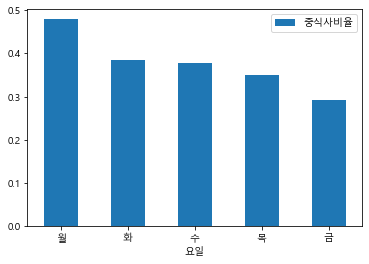

In [48]:
day_name_graph = lunch_total.groupby("요일").mean()[["중식사비율"]].reindex(["월","화","수","목","금"], axis="index")
day_name_graph.plot(kind="bar")
plt.xticks(rotation=0)

(0.25, 0.43)

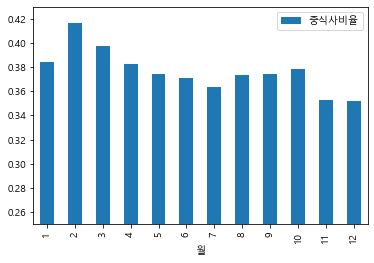

In [53]:
lunch_total.groupby("월").mean()[["중식사비율"]].plot(kind="bar")
plt.ylim(0.25,0.43)

In [78]:
dessert = []
for i in range(len(lunch_total)):
    if lunch_total["후식"][i] != "0":
        dessert.append("있음")
    else:
        dessert.append("없음")
dessert

['있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '있음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '있음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',
 '없음',

In [79]:
lunch_total["후식유무"] = dessert
lunch_total

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
0,2016-02-01,2016,2,월,0,2401.0,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치,0,1039.0,0.432736,있음
1,2016-02-02,2016,2,화,0,2378.0,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이,0,867.0,0.364592,있음
2,2016-02-03,2016,2,수,0,2365.0,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치,1,1017.0,0.430021,있음
3,2016-02-04,2016,2,목,0,2277.0,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치,0,978.0,0.429513,있음
4,2016-02-05,2016,2,금,0,2142.0,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치,0,925.0,0.431839,있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2021,1,수,2,2319.0,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치,0,1093.0,0.471324,없음
1201,2021-01-21,2021,1,목,2,2309.0,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채,0,832.0,0.360329,없음
1202,2021-01-22,2021,1,금,2,2177.0,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치,1,579.0,0.265962,없음
1203,2021-01-25,2021,1,월,2,2396.0,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이,0,1145.0,0.477880,있음


(0.35, 0.4)

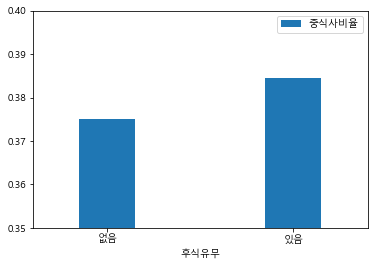

In [81]:
lunch_total.groupby("후식유무").mean()[["중식사비율"]].plot(kind="bar", width=0.3)
plt.xticks(rotation=0, fontsize=10)
plt.ylim(0.35,0.4)

In [69]:
lunch_total.groupby("후식유무").mean()[["중식사비율"]]

,중식사비율
후식유무,
n,0.375104
y,0.384594


In [136]:
special_lunch = pd.DataFrame(lunch_total["스페셜메뉴_점심"].value_counts()).reset_index()

special_lunch.columns = ["특식_유/무","일수"]
special_lunch["특식_유/무"][0]="특식제공안됨"
special_lunch["특식_유/무"][1]="특식제공"
special_lunch

,특식_유/무,일수
0,특식제공안됨,992
1,특식제공,213


Text(0.5, 1.0, '특식제공 유/무')

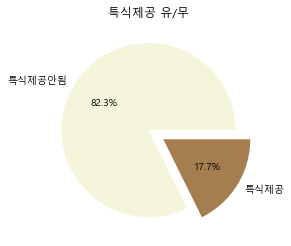

In [212]:
# labels = morning_menu["샌드위치"].value_counts().index
# colors = sns.color_palette('YlOrBr',len(labels))
# explode = [0.2,0.2,0.2,0.2,0.2,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.15,0.15,0.15]

# plt.figure(figsize=(10,10))
# plt.pie(morning_menu["샌드위치"].value_counts(), labels = labels, labeldistance=1.3, colors=colors,
        #explode=explode, shadow=True, autopct='%.1f%%')
    
plt.pie(special_lunch["일수"], labels = special_lunch["특식_유/무"],explode = [0, 0.2], colors=["Beige","#A57E4F"], autopct = "%.1f%%")
plt.title("특식제공 유/무")

Text(0.5, 1.0, '후식제공 유/무')

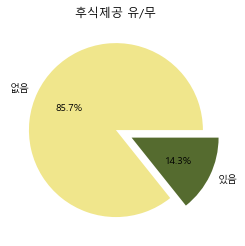

In [214]:
plt.pie(lunch_total["후식유무"].value_counts(), labels = lunch_total["후식유무"].value_counts().index,explode = [0, 0.2], colors=["khaki","darkolivegreen"], autopct = "%.1f%%")
plt.title("후식제공 유/무")

In [88]:
lunch_total[lunch_total["스페셜메뉴_점심"]==1]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
2,2016-02-03,2016,2,수,0,2365.0,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치,1,1017.0,0.430021,있음
10,2016-02-18,2016,2,목,0,2270.0,"['낙지비빔밥', '유부장국', '고구마치즈구이', '해초무침', '요구르트', '...",낙지비빔밥,유부장국,고구마치즈구이,해초무침,0,0,요구르트,포기김치,1,910.0,0.400881,있음
14,2016-02-24,2016,2,수,0,2315.0,"['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', ...",비빔밥,팽이장국,소세지피망볶음,맛탕,0,0,귤/요구르트,포기김치,1,1022.0,0.441469,있음
28,2016-03-16,2016,3,수,0,2361.0,"['곤드레밥', '콩나물김치국', '미니채소떡갈비', '두부계란부침', '무나물',...",곤드레밥,콩나물김치국,미니채소떡갈비,두부계란부침,무나물,0,0,포기김치,1,998.0,0.422702,없음
33,2016-03-23,2016,3,수,0,2346.0,"['콩나물밥*달래장', '맑은국', '치킨텐더*요거트D', '땅콩조림', '실곤약초...",콩나물밥*달래장,맑은국,치킨텐더*요거트D,땅콩조림,실곤약초무침,0,0,포기김치,1,963.0,0.410486,없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,2020-09-08,2020,9,화,2,2427.0,"['계란채소볶음밥', '짬뽕국', '짜장소스', '군만두*장', '취나물쌈장무침',...",계란채소볶음밥,짬뽕국,짜장소스,군만두*장,취나물쌈장무침,양상추샐러드*망고D,열대과일,포기김치,1,986.0,0.406263,있음
1131,2020-10-06,2020,10,화,2,2482.0,"['단호박카레라이스', '통계란꼬치어묵탕', '두부강정', '고추장누들떡볶이', '...",단호박카레라이스,통계란꼬치어묵탕,두부강정,고추장누들떡볶이,치커리무침,0,요거트파르페,열무김치,1,977.0,0.393634,있음
1151,2020-11-04,2020,11,수,2,2503.0,"['전주비빔밥', '바지락냉이국', '찰떡떡갈비조림', '모둠버섯볶음', '(New...",전주비빔밥,바지락냉이국,찰떡떡갈비조림,모둠버섯볶음,(New)수제참나물장아찌,양상추샐러드*딸기D,(New)수제사과계피차,겉절이김치,1,789.0,0.315222,있음
1187,2020-12-24,2020,12,목,2,1780.0,"['(New)뿌리채소영양밥&달래양념장', '호박된장국', '오리대패불고기', '고등...",(New)뿌리채소영양밥&달래양념장,호박된장국,오리대패불고기,고등어김치말이찜,파래김,양상추샐러드*자몽D,0,깍두기,1,591.0,0.332022,없음


In [90]:
lunch_total["국"].unique()
# 미니짬뽕
# 쇠고기샤브국
# 차돌박이찌개
# 소고기샤브국
# 대파육개장*칼국수
# 크림스프
# 옥수수스프
# 냉메밀소바
# 나주곰탕
# 통계란꼬치어묵탕
# 냉모밀국수
# 인도커리
# 오리들깨탕
# 누룽지장각백숙


array(['오징어찌개', '김치찌개', '팽이장국', '쇠고기무국', '떡국', '시래기국', '꽃게탕', '시금치국',
       '냉이된장국', '유부장국', '대구찌개', '쇠고기느타리국', '콩나물국', '북어계란국', '수제비국',
       '얼갈이된장국', '쇠고기미역국', '근대된장국', '부대찌개', '차돌박이찌개', '북어국', '고추장찌개',
       '배추된장국', '어묵국', '쑥국', '콩나물김치국', '사골우거지국', '쇠고기샤브국', '맑은국', '닭개장',
       '옹심이만두국', '쪽파국', '매운콩나물국', '버섯들깨탕', '순두부찌개', '올갱이아욱국', '냉이된장찌개',
       '육개장', '대구매운탕', '미소장국', '미역국', '돈육김치찌개', '무채국', '매운어묵국', '시래기된장국',
       '오징어국', '된장찌개', '감자고추장찌개', '들깨버섯탕', '열무된장국', '북어콩나물국', '한방갈비탕',
       '미역장국', '쇠고기해장국', '강된장찌개', '오이미역냉국', '참치김치찌개', '도토리묵냉국', '버섯들깨찌개',
       '가쯔오장국', '우무묵냉국', '호박잎찌개', '건새우아욱국', '오이냉국', '사골우거지탕', '우묵콩국',
       '청국장찌개', '부대찌개*라면사리', '복숭아미역냉국', '호박잎된장국', '사과오이냉국', '닭곰탕',
       '해물된장찌개', '버섯매운탕', '두부맑은국', '황태맑은국', '토란국', '아욱된장국', '느타리버섯국',
       '우거지해장국', '시금치된장국', '팽이버섯국', '건새우무국', '꽁치김치말이', '계란국', '동태찌개',
       '알탕', '김치콩나물국', '김치국', '조랭이떡미역국', '설렁탕', '콩비지찌개', '순두부탕', '근대국',
       '홍합탕', '아욱국', '차돌박이된장찌개', '얼갈이국', '사골떡국', '황태국', '짬뽕국', '냉이콩나물국',
      

In [107]:
change1 = list(lunch_total[lunch_total["국"].str.contains("국수")].index)
change2 = list(lunch_total[lunch_total["국"].str.contains("백숙")].index)
change3 = list(lunch_total[lunch_total["국"].str.contains("샤브샤브")].index)
change4 = list(lunch_total[lunch_total["국"].str.contains("커리")].index)
change5 = list(lunch_total[lunch_total["국"].str.contains("오리")].index)
change6 = list(lunch_total[lunch_total["국"].str.contains("스프")].index)
change = change1+change2+change3+change4+change5+change6
change

[1002, 1031, 1043, 1061, 1067, 1118, 1179, 1185, 1182, 1111, 1190, 914, 967]

In [108]:
for i in change:
    lunch_total["스페셜메뉴_점심"][i]=1
    
lunch_total["스페셜메뉴_점심"].value_counts()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\3609956564.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_total["스페셜메뉴_점심"][i]=1


0    992
1    213
Name: 스페셜메뉴_점심, dtype: int64

In [96]:
lunch_total[lunch_total["국"].str.contains("샤브샤브")]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
1185,2020-12-22,2020,12,화,2,2219.0,"['쌀밥/차조밥/찰현미밥', '매운쇠고기샤브샤브', '하와이언함박스테이크', '토마...",쌀밥/차조밥/찰현미밥,매운쇠고기샤브샤브,하와이언함박스테이크,토마토두부카프레제,냉이나물무침,양상추샐러드*시저D,마늘바게트,봄동겉절이,0,984.0,0.443443,있음


In [97]:
lunch_total[lunch_total["국"].str.contains("커리")]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
1182,2020-12-17,2020,12,목,2,2246.0,"['쌀밥/흑미밥/찰현미밥', '(New)인도커리&난', '(New)탄두리치킨', '...",쌀밥/흑미밥/찰현미밥,(New)인도커리&난,(New)탄두리치킨,문어꽈리고추조림,세발나물무침,그린샐러드*오리엔탈D,0,오이소박이,0,1096.0,0.487979,없음


In [99]:
lunch_total[lunch_total["국"].str.contains("오리")]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
1111,2020-09-02,2020,9,수,2,2377.0,"['쌀밥/흑미밥/찰현미밥', '(New)오리들깨탕', '냉족발야채무침', '(New...",쌀밥/흑미밥/찰현미밥,(New)오리들깨탕,냉족발야채무침,(New)수제오미산적,부추샐러드*오리엔탈,꽃맛살샐러드,바나나,포기김치,0,1006.0,0.423223,있음
1190,2021-01-06,2021,1,수,2,2309.0,"['쌀밥/흑미밥/찰현미밥', '오리들깨탕', '꽁치한마리레몬구이', '파프리카계란말...",쌀밥/흑미밥/찰현미밥,오리들깨탕,꽁치한마리레몬구이,파프리카계란말이,아삭이고추된장무침,양상추샐러드*오리엔탈D,미니핫도그,배추겉절이,0,1014.0,0.439151,있음


In [102]:
lunch_total[lunch_total["국"].str.contains("스프")]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
914,2019-11-01,2019,11,금,0,2529.0,"['쌀밥/옛날돈까스', '옥수수스프', '딸기드레싱샐러드', '감자범벅', '수제피...",쌀밥,옥수수스프,옛날돈까스,감자범벅,수제피클,딸기드레싱샐러드,음료,포기김치,0,586.0,0.231712,있음
967,2020-01-17,2020,1,금,0,2310.0,"['김치필라프', '크림스프', '토마토스파게티', '콥샐러드', '수제피클', '...",김치필라프,크림스프,토마토스파게티,수제피클,0,콥샐러드,0,열무김치,1,696.0,0.301299,없음


In [125]:
special_graph = lunch_total.groupby(["요일","스페셜메뉴_점심"]).mean()[["중식사비율"]].reset_index()

for i in range(len(special_graph)):
    if special_graph["스페셜메뉴_점심"][i]==0:
        special_graph["스페셜메뉴_점심"][i]="제공안됨"
    else:
        special_graph["스페셜메뉴_점심"][i]="제공"

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\4290145036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  special_graph["스페셜메뉴_점심"][i]="제공안됨"


In [130]:
special_graph = special_graph.iloc[[6,7,8,9,4,5,2,3,0,1]]

C:\Users\gyeoa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.2, 0.6)

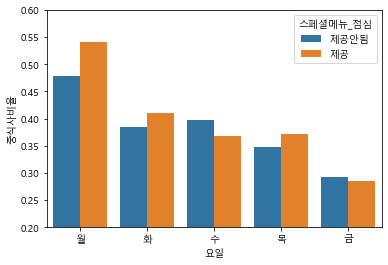

In [131]:
sns.barplot("요일","중식사비율",hue="스페셜메뉴_점심", data=special_graph, ci=False)
plt.ylim(0.2,0.6)

In [110]:
lunch_total[(lunch_total["스페셜메뉴_점심"]==1)&(lunch_total["요일"]=="수")]

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
2,2016-02-03,2016,2,수,0,2365.0,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치,1,1017.0,0.430021,있음
14,2016-02-24,2016,2,수,0,2315.0,"['비빔밥', '팽이장국', '소세지피망볶음', '맛탕', '귤', '요구르트', ...",비빔밥,팽이장국,소세지피망볶음,맛탕,0,0,귤/요구르트,포기김치,1,1022.0,0.441469,있음
28,2016-03-16,2016,3,수,0,2361.0,"['곤드레밥', '콩나물김치국', '미니채소떡갈비', '두부계란부침', '무나물',...",곤드레밥,콩나물김치국,미니채소떡갈비,두부계란부침,무나물,0,0,포기김치,1,998.0,0.422702,없음
33,2016-03-23,2016,3,수,0,2346.0,"['콩나물밥*달래장', '맑은국', '치킨텐더*요거트D', '땅콩조림', '실곤약초...",콩나물밥*달래장,맑은국,치킨텐더*요거트D,땅콩조림,실곤약초무침,0,0,포기김치,1,963.0,0.410486,없음
38,2016-03-30,2016,3,수,0,2346.0,"['봄새싹비빔밥', '쪽파국', '오징어튀김', '알감자버터구이', '오렌지', '...",봄새싹비빔밥,쪽파국,오징어튀김,알감자버터구이,0,0,오렌지,포기김치,1,1033.0,0.440324,있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1067,2020-07-01,2020,7,수,2,2521.0,"['쌀밥/잡곡밥', '냉모밀국수', '매운돈갈비찜', '메밀전병*간장', '고구마순...",쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,양상추샐러드*딸기요거트,0,포기김치,1,866.0,0.343514,없음
1077,2020-07-15,2020,7,수,2,2486.0,"['비빔밥*약고추장', '콩가루배춧국', '열기어구이', '도토리묵*양념간장', '...",비빔밥*약고추장,콩가루배춧국,열기어구이,도토리묵*양념간장,무말랭이무침,치커리만다린샐러드*오렌지D,0,포기김치,1,842.0,0.338697,없음
1111,2020-09-02,2020,9,수,2,2377.0,"['쌀밥/흑미밥/찰현미밥', '(New)오리들깨탕', '냉족발야채무침', '(New...",쌀밥/흑미밥/찰현미밥,(New)오리들깨탕,냉족발야채무침,(New)수제오미산적,부추샐러드*오리엔탈,꽃맛살샐러드,바나나,포기김치,1,1006.0,0.423223,있음
1151,2020-11-04,2020,11,수,2,2503.0,"['전주비빔밥', '바지락냉이국', '찰떡떡갈비조림', '모둠버섯볶음', '(New...",전주비빔밥,바지락냉이국,찰떡떡갈비조림,모둠버섯볶음,(New)수제참나물장아찌,양상추샐러드*딸기D,(New)수제사과계피차,겉절이김치,1,789.0,0.315222,있음


In [152]:
lunch_total.columns = ['일자', '년도', '월', '요일', '코로나', '근무자수', '중식메뉴_list', '밥', '국', '반찬1',
       '반찬2', '반찬3', '반찬4', '후식', '김치', '스페셜메뉴_점심', '중식계', '중식사비율', '후식유무']
lunch_total

,일자,년도,월,요일,코로나,근무자수,중식메뉴_list,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치,스페셜메뉴_점심,중식계,중식사비율,후식유무
0,2016-02-01,2016,2,월,0,2401.0,"['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요...",쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치,0,1039.0,0.432736,있음
1,2016-02-02,2016,2,화,0,2378.0,"['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침'...",쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이,0,867.0,0.364592,있음
2,2016-02-03,2016,2,수,0,2365.0,"['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요...",카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치,1,1017.0,0.430021,있음
3,2016-02-04,2016,2,목,0,2277.0,"['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '...",쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치,0,978.0,0.429513,있음
4,2016-02-05,2016,2,금,0,2142.0,"['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요...",쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치,0,925.0,0.431839,있음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2021,1,수,2,2319.0,"['쌀밥/흑미밥/찰현미밥', '아욱국', '수제함박스테이크', '견과류마카로니범벅'...",쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치,0,1093.0,0.471324,없음
1201,2021-01-21,2021,1,목,2,2309.0,"['쌀밥/수수밥/찰현미밥', '냉이된장국', '동파육', '봄동전', '청경채/버섯...",쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채,0,832.0,0.360329,없음
1202,2021-01-22,2021,1,금,2,2177.0,"['전주비빔밥*약고추장', '계란파국', '요거닭', '올방개묵무침', '파프리카해...",전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치,1,579.0,0.265962,없음
1203,2021-01-25,2021,1,월,2,2396.0,"['쌀밥/흑미밥/찰현미밥', '전주식콩나물해장국', '돈육간장불고기', '깐풍연근'...",쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이,0,1145.0,0.477880,있음


In [158]:
lunch_total[['일자', '근무자수','중식계', '밥', '국', '반찬1',
       '반찬2', '반찬3', '반찬4', '후식', '김치']]

,일자,근무자수,중식계,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,2401.0,1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치
1,2016-02-02,2378.0,867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이
2,2016-02-03,2365.0,1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치
3,2016-02-04,2277.0,978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치
4,2016-02-05,2142.0,925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치
...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2319.0,1093.0,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치
1201,2021-01-21,2309.0,832.0,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채
1202,2021-01-22,2177.0,579.0,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치
1203,2021-01-25,2396.0,1145.0,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이


In [163]:
lunch_image = pd.merge(menu[["일자","중식메뉴"]],lunch_total[['일자', '근무자수','중식계', '밥', '국', '반찬1','반찬2', '반찬3', '반찬4', '후식', '김치']],
         left_on = "일자", right_on="일자")
lunch_image

,일자,중식메뉴,근무자수,중식계,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",2401.0,1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치
1,2016-02-02,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",2378.0,867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이
2,2016-02-03,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",2365.0,1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치
3,2016-02-04,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",2277.0,978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치
4,2016-02-05,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",2142.0,925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,2319.0,1093.0,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치
1201,2021-01-21,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,2309.0,832.0,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채
1202,2021-01-22,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,2177.0,579.0,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치
1203,2021-01-25,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,2396.0,1145.0,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이


In [164]:
lunch_image[["일자","근무자수","중식메뉴","중식계","밥","국","반찬1","반찬2","반찬3","반찬4","후식",'김치']]

,일자,근무자수,중식메뉴,중식계,밥,국,반찬1,반찬2,반찬3,반찬4,후식,김치
0,2016-02-01,2401.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...",1039.0,쌀밥/잡곡밥,오징어찌개,쇠불고기,계란찜,청포묵무침,0,요구르트,포기김치
1,2016-02-02,2378.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...",867.0,쌀밥/잡곡밥,김치찌개,가자미튀김,모둠소세지구이,마늘쫑무침,0,요구르트,배추겉절이
2,2016-02-03,2365.0,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...",1017.0,카레덮밥,팽이장국,치킨핑거,쫄면야채무침,견과류조림,0,요구르트,포기김치
3,2016-02-04,2277.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...",978.0,쌀밥/잡곡밥,쇠고기무국,주꾸미볶음,부추전,시금치나물,0,요구르트,포기김치
4,2016-02-05,2142.0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...",925.0,쌀밥/잡곡밥,떡국,돈육씨앗강정,우엉잡채,청경채무침,0,요구르트,포기김치
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,2319.0,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,1093.0,쌀밥/흑미밥/찰현미밥,아욱국,수제함박스테이크,견과류마카로니범벅,생깻잎지,양상추샐러드*오리엔탈D,0,단호박물김치
1201,2021-01-21,2309.0,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,832.0,쌀밥/수수밥/찰현미밥,냉이된장국,동파육,봄동전,청경채/버섯숙회*초장,양상추샐러드*파인D,0,무생채
1202,2021-01-22,2177.0,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,579.0,전주비빔밥*약고추장,계란파국,요거닭,올방개묵무침,파프리카해초무침,양상추샐러드*자몽D,0,포기김치
1203,2021-01-25,2396.0,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,1145.0,쌀밥/흑미밥/찰현미밥,전주식콩나물해장국,돈육간장불고기,깐풍연근,연두부*달래양념장,양상추샐러드*오렌지D,양념김,봄동겉절이


### 아침메뉴에서 계란 종류별로 구분

In [165]:
morning_final = pd.read_csv("data/morning_final.csv")
morning_final

,일자,조식메뉴,모닝롤,빵,빵종류,음료,계란,죽/밥,죽,밥,국/찌개,반찬,샐러드,김치,본사정원수,본사휴가자수,본사출장자수,현본사소속재택근무자수,근무자수
0,2016-02-01,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,1,찐빵,찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,호두죽,쌀밥,된장찌개,쥐어채무침,0,포기김치,2601,50,150,0.0,2401.0
1,2016-02-02,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,1,단호박샌드,샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,팥죽,쌀밥,호박젓국찌개,시래기조림,0,포기김치,2601,50,173,0.0,2378.0
2,2016-02-03,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,1,베이글,베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,표고버섯죽,쌀밥,콩나물국,느타리호박볶음,0,포기김치,2601,56,180,0.0,2365.0
3,2016-02-04,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",1,토마토샌드,샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,닭죽,쌀밥,근대국,멸치볶음,0,포기김치,2601,104,220,0.0,2277.0
4,2016-02-05,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,1,와플,와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,쇠고기죽,쌀밥,재첩국,방풍나물,0,포기김치,2601,278,181,0.0,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,1,페퍼로니피자,피자류,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,크루통크림스프,흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,2983,75,198,391.0,2319.0
1201,2021-01-21,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,1,생크림단팥빵,단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,누룽지탕,흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,2983,92,231,351.0,2309.0
1202,2021-01-22,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,1,BLT샌드위치,샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,흑임자죽,흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,2983,255,248,303.0,2177.0
1203,2021-01-25,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,1,호박고구마오븐구이,기타,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,누룽지탕,흑미밥,감자양파국,분홍소세지구이*케찹,양상추샐러드,포기김치,2983,107,153,327.0,2396.0


In [168]:
morning_image = morning_final[["일자","조식메뉴","모닝롤","빵","빵종류","음료","계란","죽/밥","죽","밥","국/찌개","반찬","샐러드","김치","근무자수"]]
morning_image

,일자,조식메뉴,모닝롤,빵,빵종류,음료,계란,죽/밥,죽,밥,국/찌개,반찬,샐러드,김치,근무자수
0,2016-02-01,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,1,찐빵,찐빵,우유/두유/주스,계란후라이,호두죽/쌀밥,호두죽,쌀밥,된장찌개,쥐어채무침,0,포기김치,2401.0
1,2016-02-02,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,1,단호박샌드,샌드,우유/두유/주스,계란후라이,팥죽/쌀밥,팥죽,쌀밥,호박젓국찌개,시래기조림,0,포기김치,2378.0
2,2016-02-03,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,1,베이글,베이글,우유/두유/주스,계란후라이,표고버섯죽/쌀밥,표고버섯죽,쌀밥,콩나물국,느타리호박볶음,0,포기김치,2365.0
3,2016-02-04,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...",1,토마토샌드,샌드,우유/두유/주스,계란후라이,닭죽/쌀밥,닭죽,쌀밥,근대국,멸치볶음,0,포기김치,2277.0
4,2016-02-05,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,1,와플,와플,우유/두유/주스,계란후라이,쇠고기죽/쌀밥,쇠고기죽,쌀밥,재첩국,방풍나물,0,포기김치,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,1,페퍼로니피자,피자류,우유/주스,계란후라이/찐계란,크루통크림스프/흑미밥,크루통크림스프,흑미밥,아귀지리,마늘종숙회,양상추샐러드,포기김치,2319.0
1201,2021-01-21,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,1,생크림단팥빵,단팥빵,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,누룽지탕,흑미밥,떡국,해물땡굴소스볶음,양상추샐러드,깍두기,2309.0
1202,2021-01-22,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,1,BLT샌드위치,샌드위치,우유/주스,계란후라이/찐계란,흑임자죽/흑미밥,흑임자죽,흑미밥,바지락살국,두부조림,양상추샐러드,포기김치,2177.0
1203,2021-01-25,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,1,호박고구마오븐구이,기타,우유/주스,계란후라이/찐계란,누룽지탕/흑미밥,누룽지탕,흑미밥,감자양파국,분홍소세지구이*케찹,양상추샐러드,포기김치,2396.0


In [172]:
egg_graph = pd.DataFrame(morning_image["계란"].value_counts()).reset_index()
egg_graph.columns = ["계란메뉴","일수"]
egg_graph

,계란메뉴,일수
0,계란후라이,910
1,스크램블에그,241
2,구운계란,18
3,계란후라이/찐계란,17
4,삶은계란,13
5,시금치프리타타,2
6,계란후라이/구운계란,2
7,스크램블,1
8,계란후라이/삶은계란,1


In [173]:
egg_graph["계란메뉴"][3]="계란후라이/삶은계란"
egg_graph["계란메뉴"][6]="계란후라이/삶은계란"
egg_graph["계란메뉴"][8]="계란후라이/삶은계란"
egg_graph

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\431104424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_graph["계란메뉴"][3]="계란후라이/삶은계란"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\431104424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_graph["계란메뉴"][6]="계란후라이/삶은계란"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\431104424.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_graph["계란메뉴"][8]="계란후라이/삶은계란"


,계란메뉴,일수
0,계란후라이,910
1,스크램블에그,241
2,구운계란,18
3,계란후라이/삶은계란,17
4,삶은계란,13
5,시금치프리타타,2
6,계란후라이/삶은계란,2
7,스크램블,1
8,계란후라이/삶은계란,1


In [180]:
egg_graph["계란메뉴"][2]="삶은계란"
egg_graph["계란메뉴"][7]="스크램블에그"
egg_graph = egg_graph.groupby("계란메뉴").sum().reset_index()

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\794332742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_graph["계란메뉴"][2]="삶은계란"
C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\794332742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_graph["계란메뉴"][7]="스크램블에그"


In [182]:
egg_graph["계란메뉴"][1]="계란후라이+삶은계란"
egg_graph

C:\Users\gyeoa\AppData\Local\Temp\ipykernel_38676\375812933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  egg_graph["계란메뉴"][1]="계란후라이+삶은계란"


,계란메뉴,일수
0,계란후라이,910
1,계란후라이+삶은계란,20
2,삶은계란,31
3,스크램블에그,242
4,시금치프리타타,2


([<matplotlib.patches.Wedge at 0x1af71b65ee0>,
 [Text(-0.9340947610823106, 0.9041388042322822, '계란후라이'),
  Text(0.8006567411440335, -1.0241820067061402, '스크램블에그'),
  Text(1.2752270987130008, -0.2525783971522939, '삶은계란'),
  Text(1.3972603008068247, -0.08754228572079742, '계란후라이+삶은계란'),
  Text(1.399980968935083, -0.007299768461101464, '시금치프리타타')],
 [Text(-0.5029741021212442, 0.4868439715096904, '75.5%'),
  Text(0.431122860616018, -0.5514826189956139, '20.1%'),
  Text(0.6866607454608467, -0.13600375231277365, '2.6%'),
  Text(0.7984344576038999, -0.0500241632690271, '1.7%'),
  Text(0.7999891251057618, -0.004171296263486552, '0.2%')])

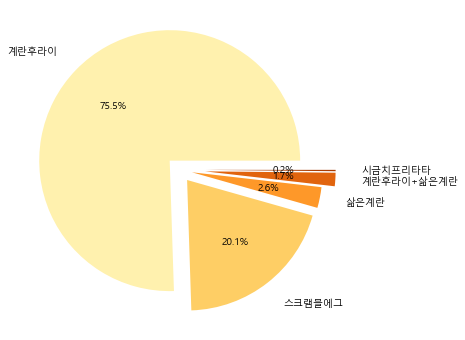

In [196]:
egg_graph = egg_graph.sort_values(by="일수", ascending=False)
labels = egg_graph["계란메뉴"]
colors = sns.color_palette('YlOrBr',len(labels))
plt.figure(figsize=(6,6))
plt.pie(egg_graph["일수"], labels = egg_graph["계란메뉴"], colors=colors, autopct = "%.1f%%", labeldistance=1.2, explode = [0.1,0.1,0.1,0.2,0.2])